<a href="https://colab.research.google.com/github/Dieljr/pythonDev/blob/master/HousePriceIowa_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nesta série vou investigar o dataset House Price of Aime, Iwoa.  Ao contrário do PIMA INDIANS DIABETES este conjunto é mais complexo, principalmente do ponto de vista da engenharia de dados e de ajustes nos modelos de Machine Learning.

Fonte: http://jse.amstat.org/v19n3/decock.pdf da pesquisa.
Fonte: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data do dataset

In [ ]:
# Carregar pacotes iniciais

# explorar dados
import pandas as pd

# estatísticas
import numpy as np

# Visualizações
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 400

import seaborn as sb

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(type(train))
print(type(test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


São incríveis 80 colunas de variáveis independentes e 1 dependente (SalePrice)!
Então o objetivo de negócio é prever o preço o imóvel baseados nas melhores variáveis.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
del train['Id']

In [ ]:
del test['Id']

In [ ]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

(array([74.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  3.]),
 array([   0. ,  145.3,  290.6,  435.9,  581.2,  726.5,  871.8, 1017.1,
        1162.4, 1307.7, 1453. ]),
 <a list of 10 Patch objects>)

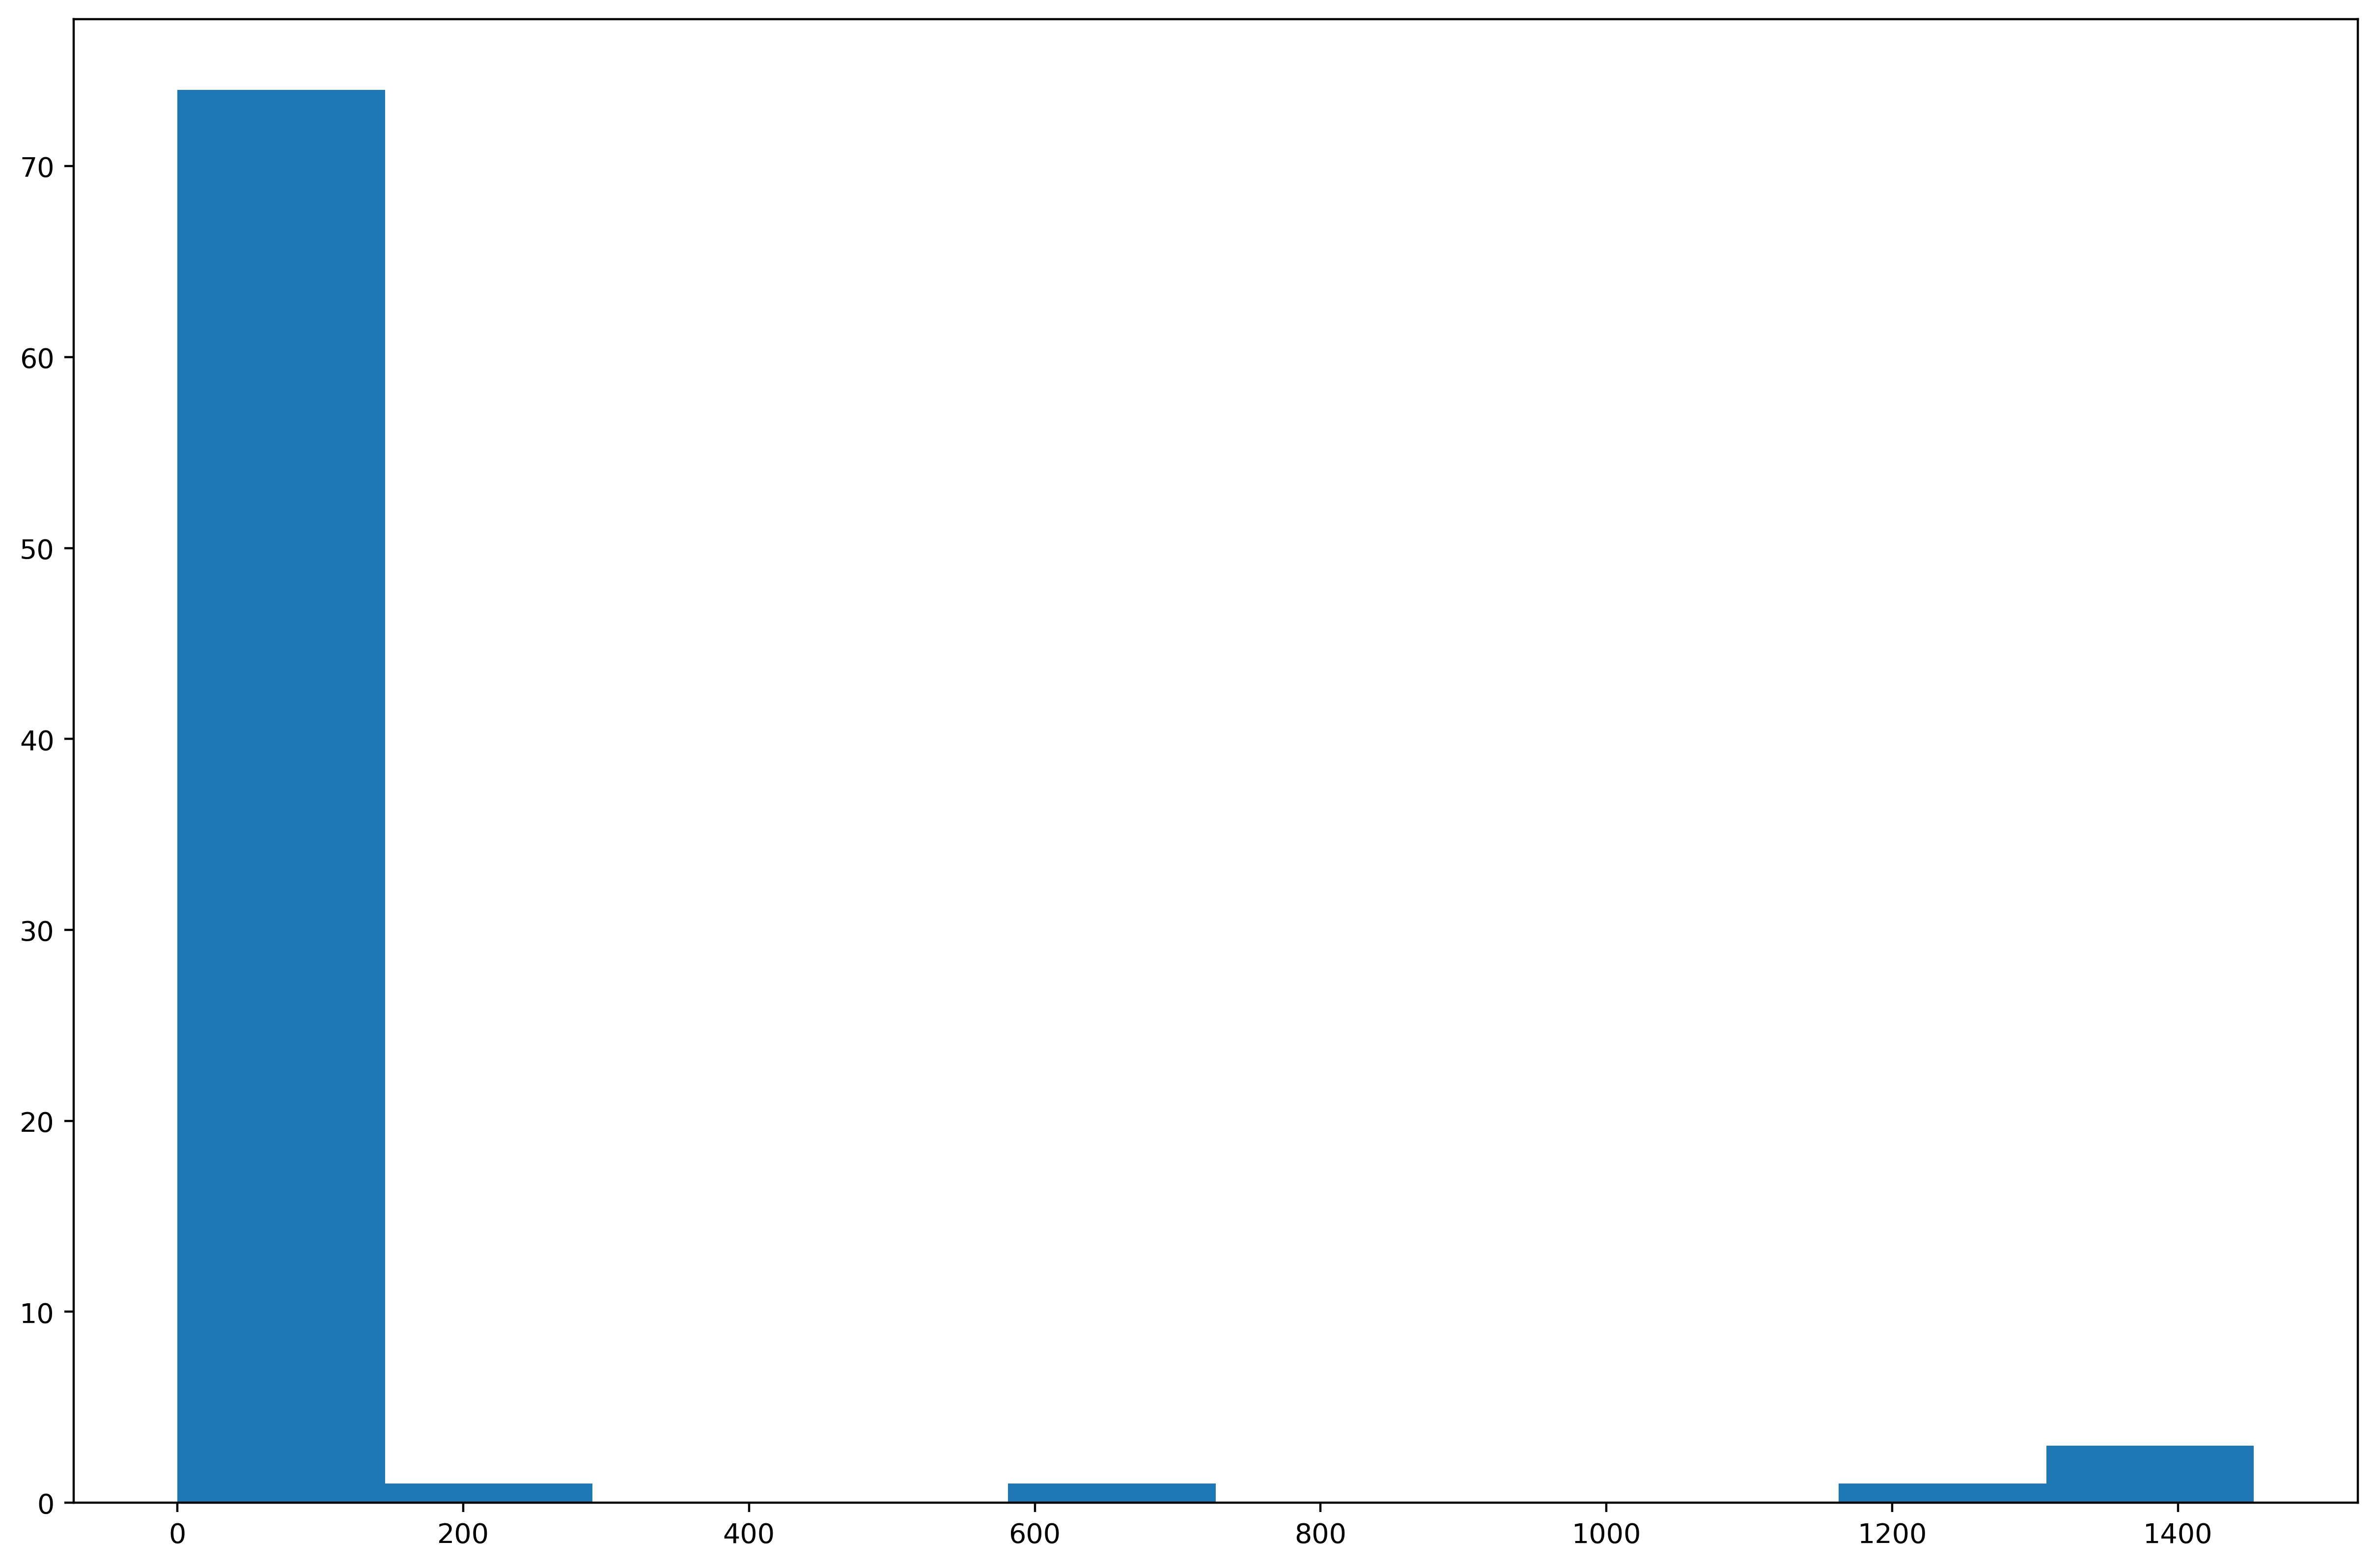

In [ ]:
# valores NAN plotados
mpl.rcParams['figure.figsize'] = (15,10)
plt.hist(train.isna().sum())

In [ ]:
# Função que verifica como estão divididas as variáveis qualitativas por subcategorias?
def unicos_obj(df):
    for i in df.select_dtypes(include = 'object'):
        print(i, '', df[i].unique())
unicos_obj(train)
unicos_obj(test)

MSZoning  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  ['Pave' 'Grvl']
Alley  [nan 'Grvl' 'Pave']
LotShape  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  ['AllPub' 'NoSeWa']
LotConfig  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  ['Gtl' 'Mod' 'Sev']
Neighborhood  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st  ['Vi

In [ ]:
# Função que converte 'other' e suas VARIAÇÕES em 'Other'
def na_other_obj(df):
    for i in df:
        df[i].replace('Oth', 'Other', inplace = True)
        df[i].replace('OthW', 'Other', inplace = True)
        df[i].replace('Othr', 'Other', inplace = True)
        df[i].replace('other', 'Other', inplace = True)
        
na_other_obj(train)
na_other_obj(test)

In [ ]:
# Função que identifica variáveis com alto coeficiente de variação (> 25%)
med_x = []
std_x = []
cv_x = []
var_i = []
def analise_cv(df):
    cont_std = 0
    for i in df.select_dtypes(include = 'number'):
        
        med, std = df[i].mean(), df[i].std() # média e desvio pádrão
        cv = (std / med)*100 # coeficiente de variação
        
        var_i.append(i)
        med_x.append(med)
        std_x.append(std)
        cv_x.append(cv)
        
        if cv > 25: # valor de corte
            cont_std += 1
            
            #print(i)
            #print('média de ',round(med))
            #print('desvio padrão de ', round(std))
            #print('Coeficiente de variação = ',  round(cv))
            #print('')   
            
    
    print('O conjunto de dados tem ', cont_std, ' variáveis com desvio padrão acima de 25%')
    #print('')
    
    
analise_cv(train)

O conjunto de dados tem  29  variáveis com desvio padrão acima de 25%


In [ ]:
# Tabela com média, desvio padrão e coeficiente de variação de cada variável numérica
print(pd.DataFrame({'variavel':var_i,
                       'media':med_x,
                       'desvio_padrao': std_x,
                       'coeficiente_variacao': cv_x}))

         variavel          media  desvio_padrao  coeficiente_variacao
0      MSSubClass      56.897260      42.300571             74.345532
1     LotFrontage      70.049958      24.284752             34.667760
2         LotArea   10516.828082    9981.264932             94.907560
3     OverallQual       6.099315       1.382997             22.674621
4     OverallCond       5.575342       1.112799             19.959300
5       YearBuilt    1971.267808      30.202904              1.532156
6    YearRemodAdd    1984.865753      20.645407              1.040141
7      MasVnrArea     103.685262     181.066207            174.630612
8      BsmtFinSF1     443.639726     456.098091            102.808217
9      BsmtFinSF2      46.549315     161.319273            346.555632
10      BsmtUnfSF     567.240411     441.866955             77.897651
11    TotalBsmtSF    1057.429452     438.705324             41.487905
12       1stFlrSF    1162.626712     386.587738             33.251235
13       2ndFlrSF   

In [ ]:
# Função que verifica valores missing das variáveis numéricas
def missing_num(df):
    for i in df:
        print(i, '', df[i].isna().sum())

missing_num(train.select_dtypes(include = 'number'))
missing_num(test.select_dtypes(include = 'number'))

MSSubClass  0
LotFrontage  259
LotArea  0
OverallQual  0
OverallCond  0
YearBuilt  0
YearRemodAdd  0
MasVnrArea  8
BsmtFinSF1  0
BsmtFinSF2  0
BsmtUnfSF  0
TotalBsmtSF  0
1stFlrSF  0
2ndFlrSF  0
LowQualFinSF  0
GrLivArea  0
BsmtFullBath  0
BsmtHalfBath  0
FullBath  0
HalfBath  0
BedroomAbvGr  0
KitchenAbvGr  0
TotRmsAbvGrd  0
Fireplaces  0
GarageYrBlt  81
GarageCars  0
GarageArea  0
WoodDeckSF  0
OpenPorchSF  0
EnclosedPorch  0
3SsnPorch  0
ScreenPorch  0
PoolArea  0
MiscVal  0
MoSold  0
YrSold  0
SalePrice  0
MSSubClass  0
LotFrontage  227
LotArea  0
OverallQual  0
OverallCond  0
YearBuilt  0
YearRemodAdd  0
MasVnrArea  15
BsmtFinSF1  1
BsmtFinSF2  1
BsmtUnfSF  1
TotalBsmtSF  1
1stFlrSF  0
2ndFlrSF  0
LowQualFinSF  0
GrLivArea  0
BsmtFullBath  2
BsmtHalfBath  2
FullBath  0
HalfBath  0
BedroomAbvGr  0
KitchenAbvGr  0
TotRmsAbvGrd  0
Fireplaces  0
GarageYrBlt  78
GarageCars  1
GarageArea  1
WoodDeckSF  0
OpenPorchSF  0
EnclosedPorch  0
3SsnPorch  0
ScreenPorch  0
PoolArea  0
MiscVal  0


In [ ]:
# Função que substitui os valores MISSING pela média de cada coluna numérica
def na_media(df):
    for i in df:
        df[i].fillna(df[i].mean(), inplace = True)
        

na_media(train.select_dtypes(include = 'number'))
na_media(test.select_dtypes(include = 'number'))

C:\Users\User\anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


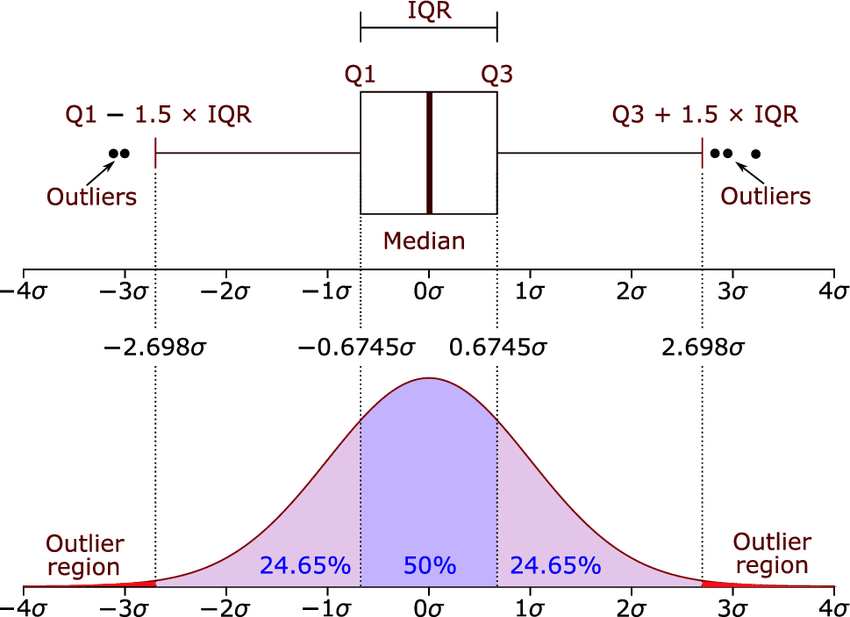

In [ ]:
# identificação de OUTLIERS em uma distribuição normal

from IPython.display import Image
Image ('outlier normal distribution.png')

In [ ]:
# Função para plotagem de valores outliers
def box_plot(df):
    plt.figure(figsize = (10,8))
    df.boxplot()
    plt.grid(True)
    plt.show()

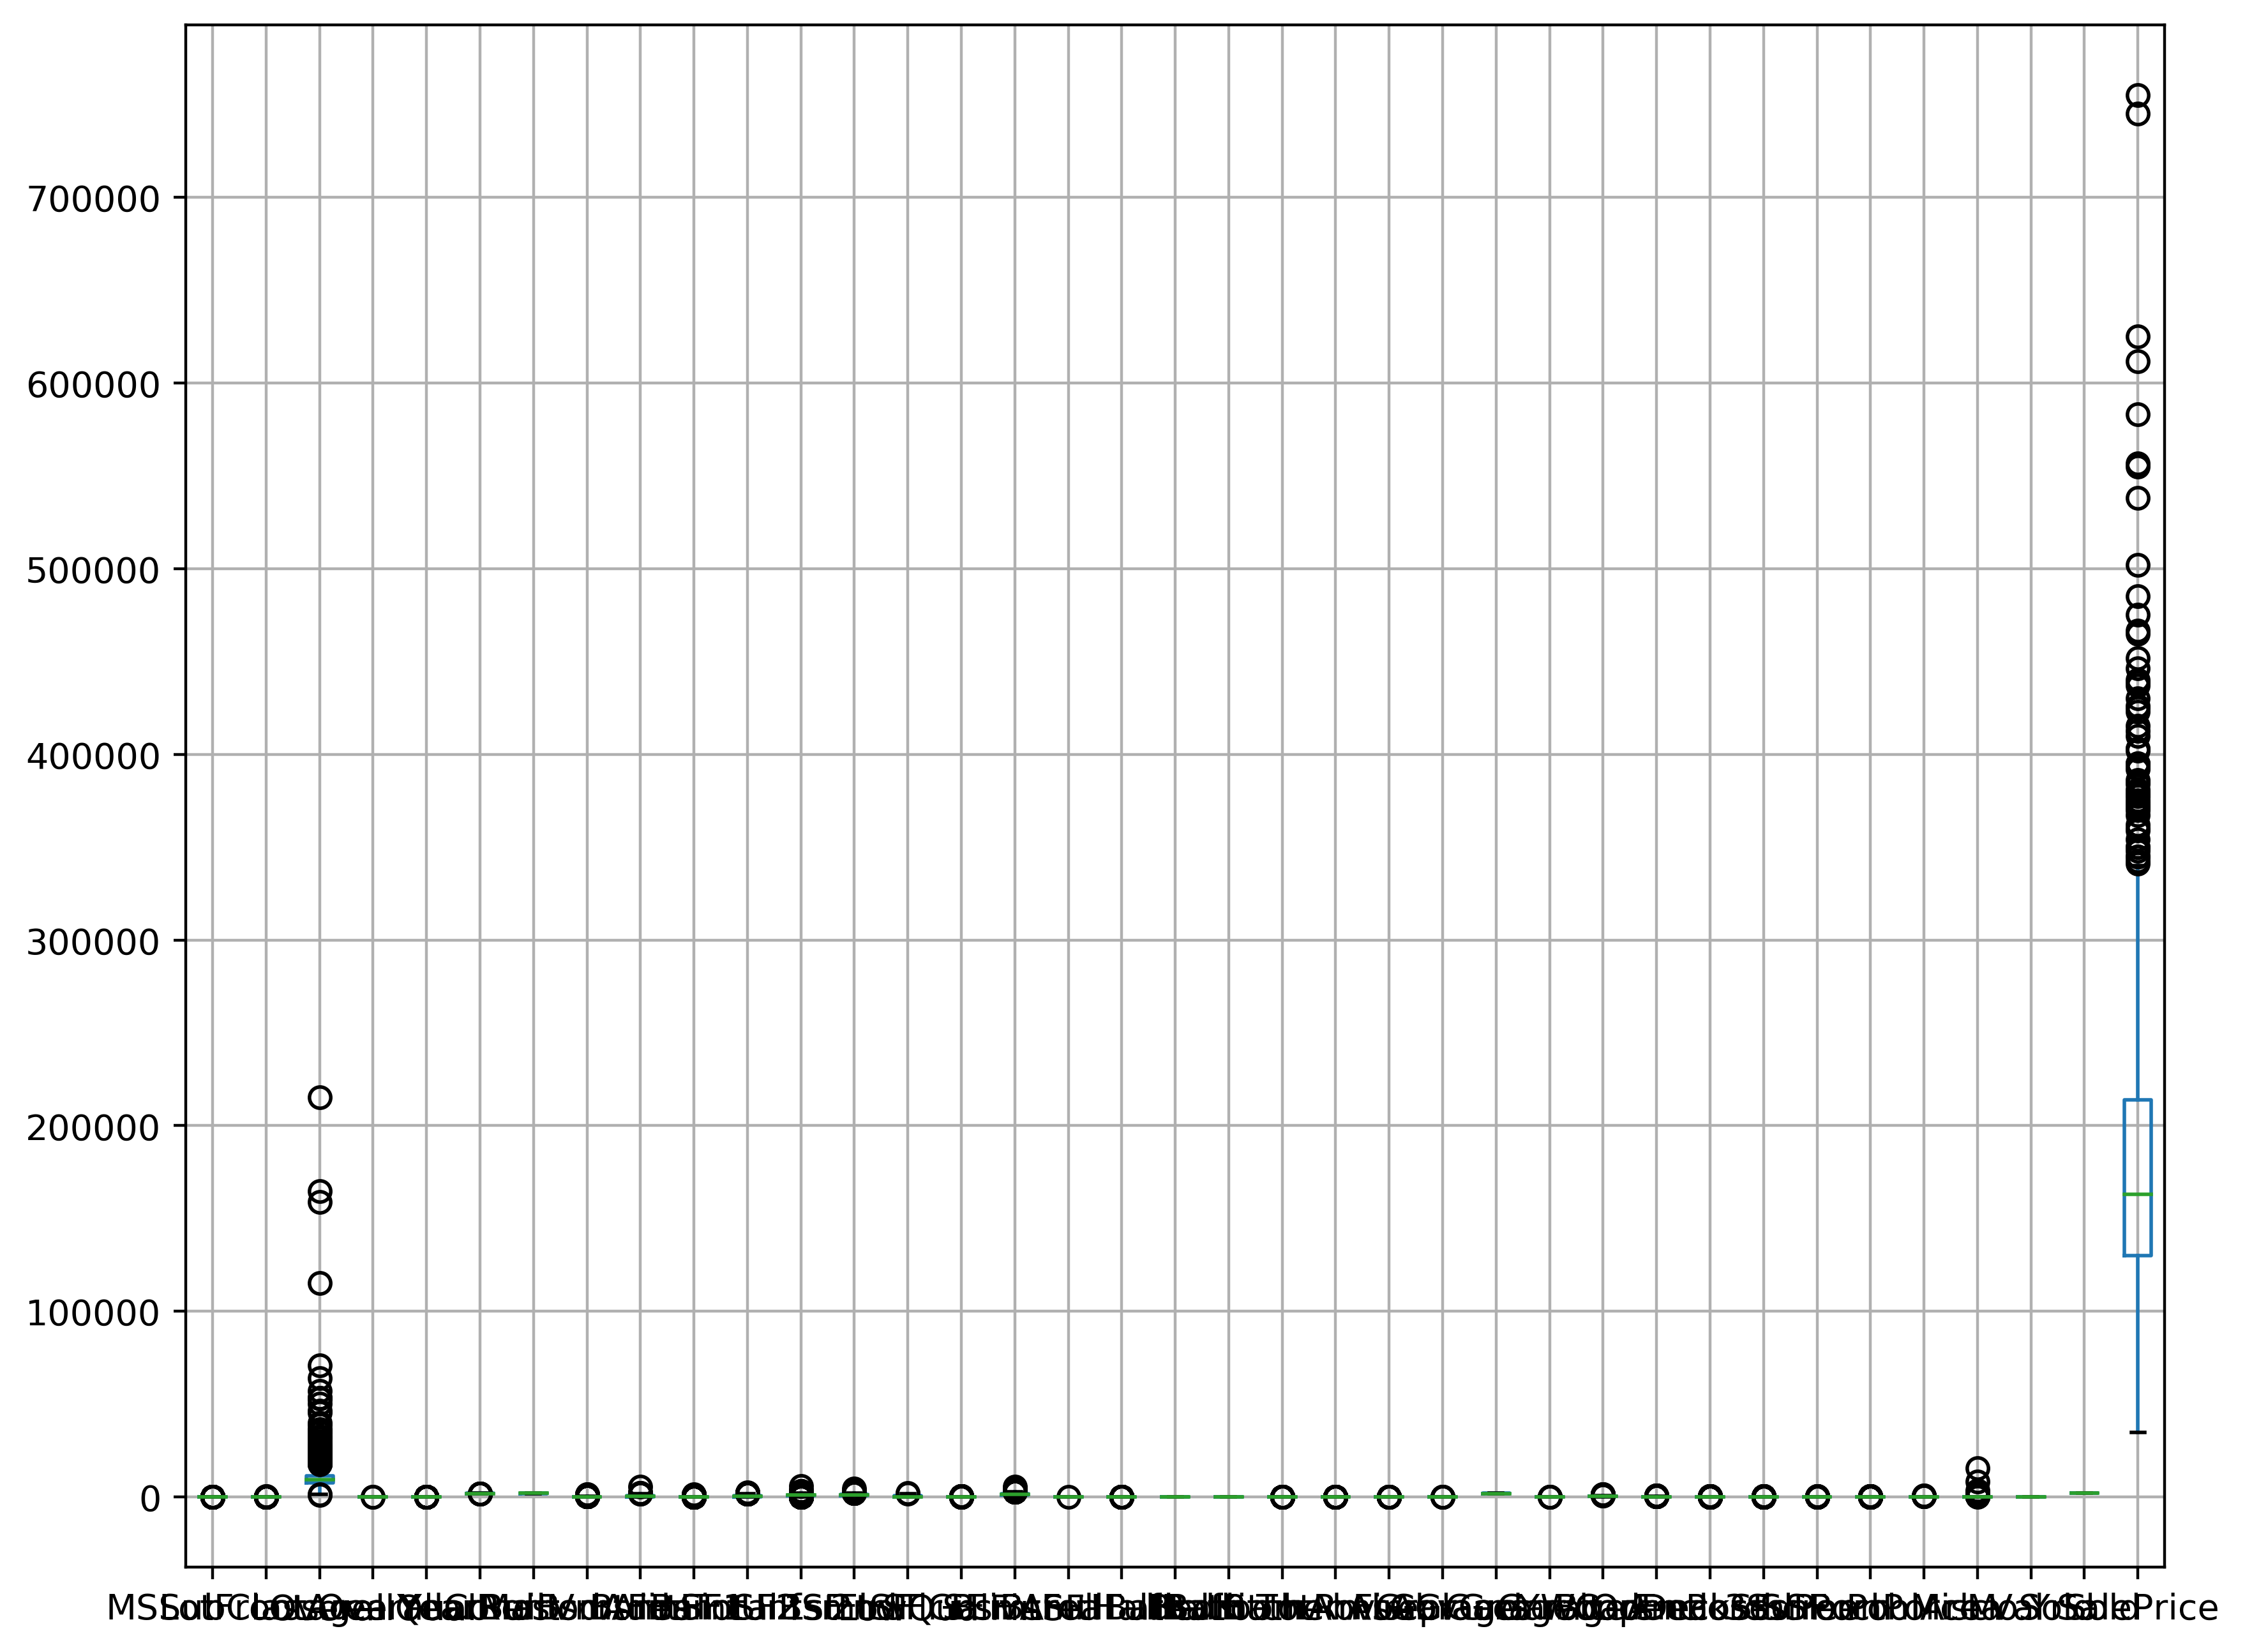

In [ ]:
# plot valores numéricos outliers no data set treino
box_plot(train.select_dtypes(include = 'number'))

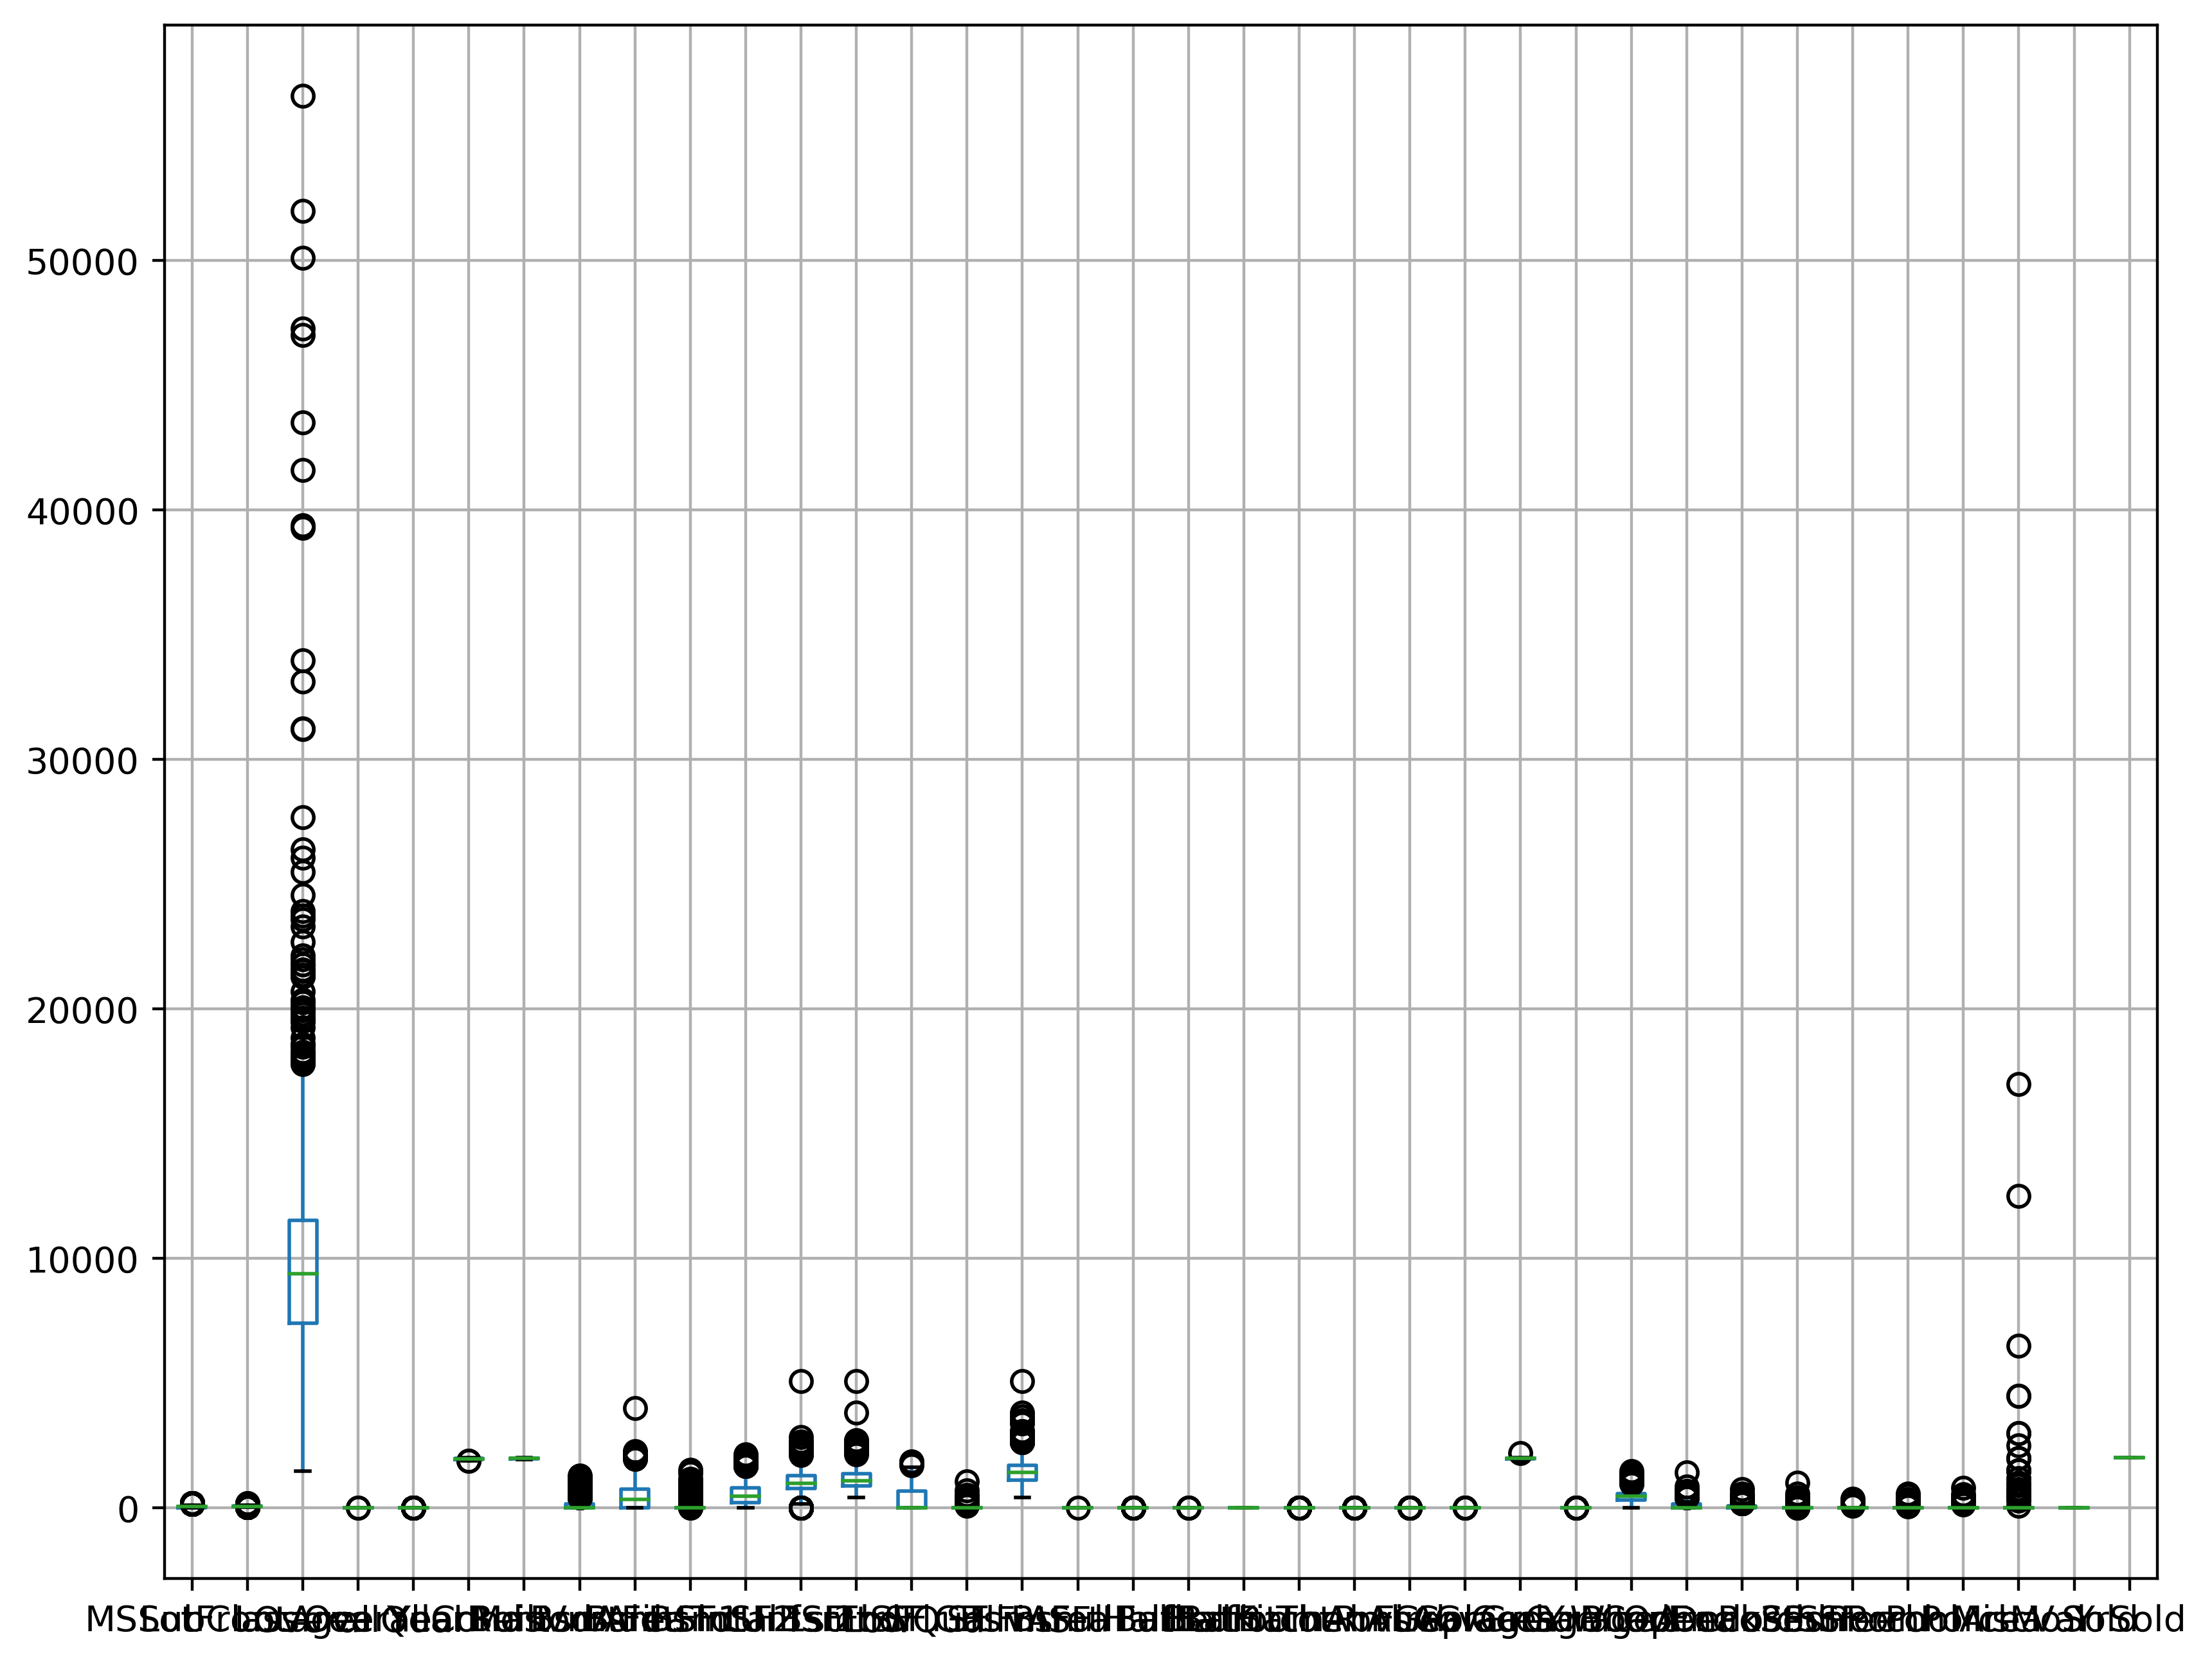

In [ ]:
# plot valores numéricos outliers no data set test
box_plot(test.select_dtypes(include = 'number'))

In [ ]:
preco_antigo = train['SalePrice'] # para usar na comparação ante e depois dos autliers e da normalização (log10)
sale_original = train['SalePrice'] # cria objeto com valores originais para fase de teste após treinamento

In [ ]:
# pacote para remoção de outliers
from scipy.stats import zscore, iqr

In [ ]:
# Função que elimina valores extremos (0,25 < x > 0.75).
def remove_outlier(df):
    
    iqr(df, axis = 0)

In [ ]:
# chamada à função de remoção de outliers
# inclui um filtro para variáveis númericas
        
remove_outlier(train.select_dtypes(include = 'number'))
remove_outlier(test.select_dtypes(include = 'number'))

In [ ]:
# função que normaliza o dataset

def normal(df):
    for i in df.select_dtypes(include = 'number'):
        df[i] = np.log10(df[i])

normal(train)
normal(test)

C:\Users\User\anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B1E71A4C8>,
      dtype=object)

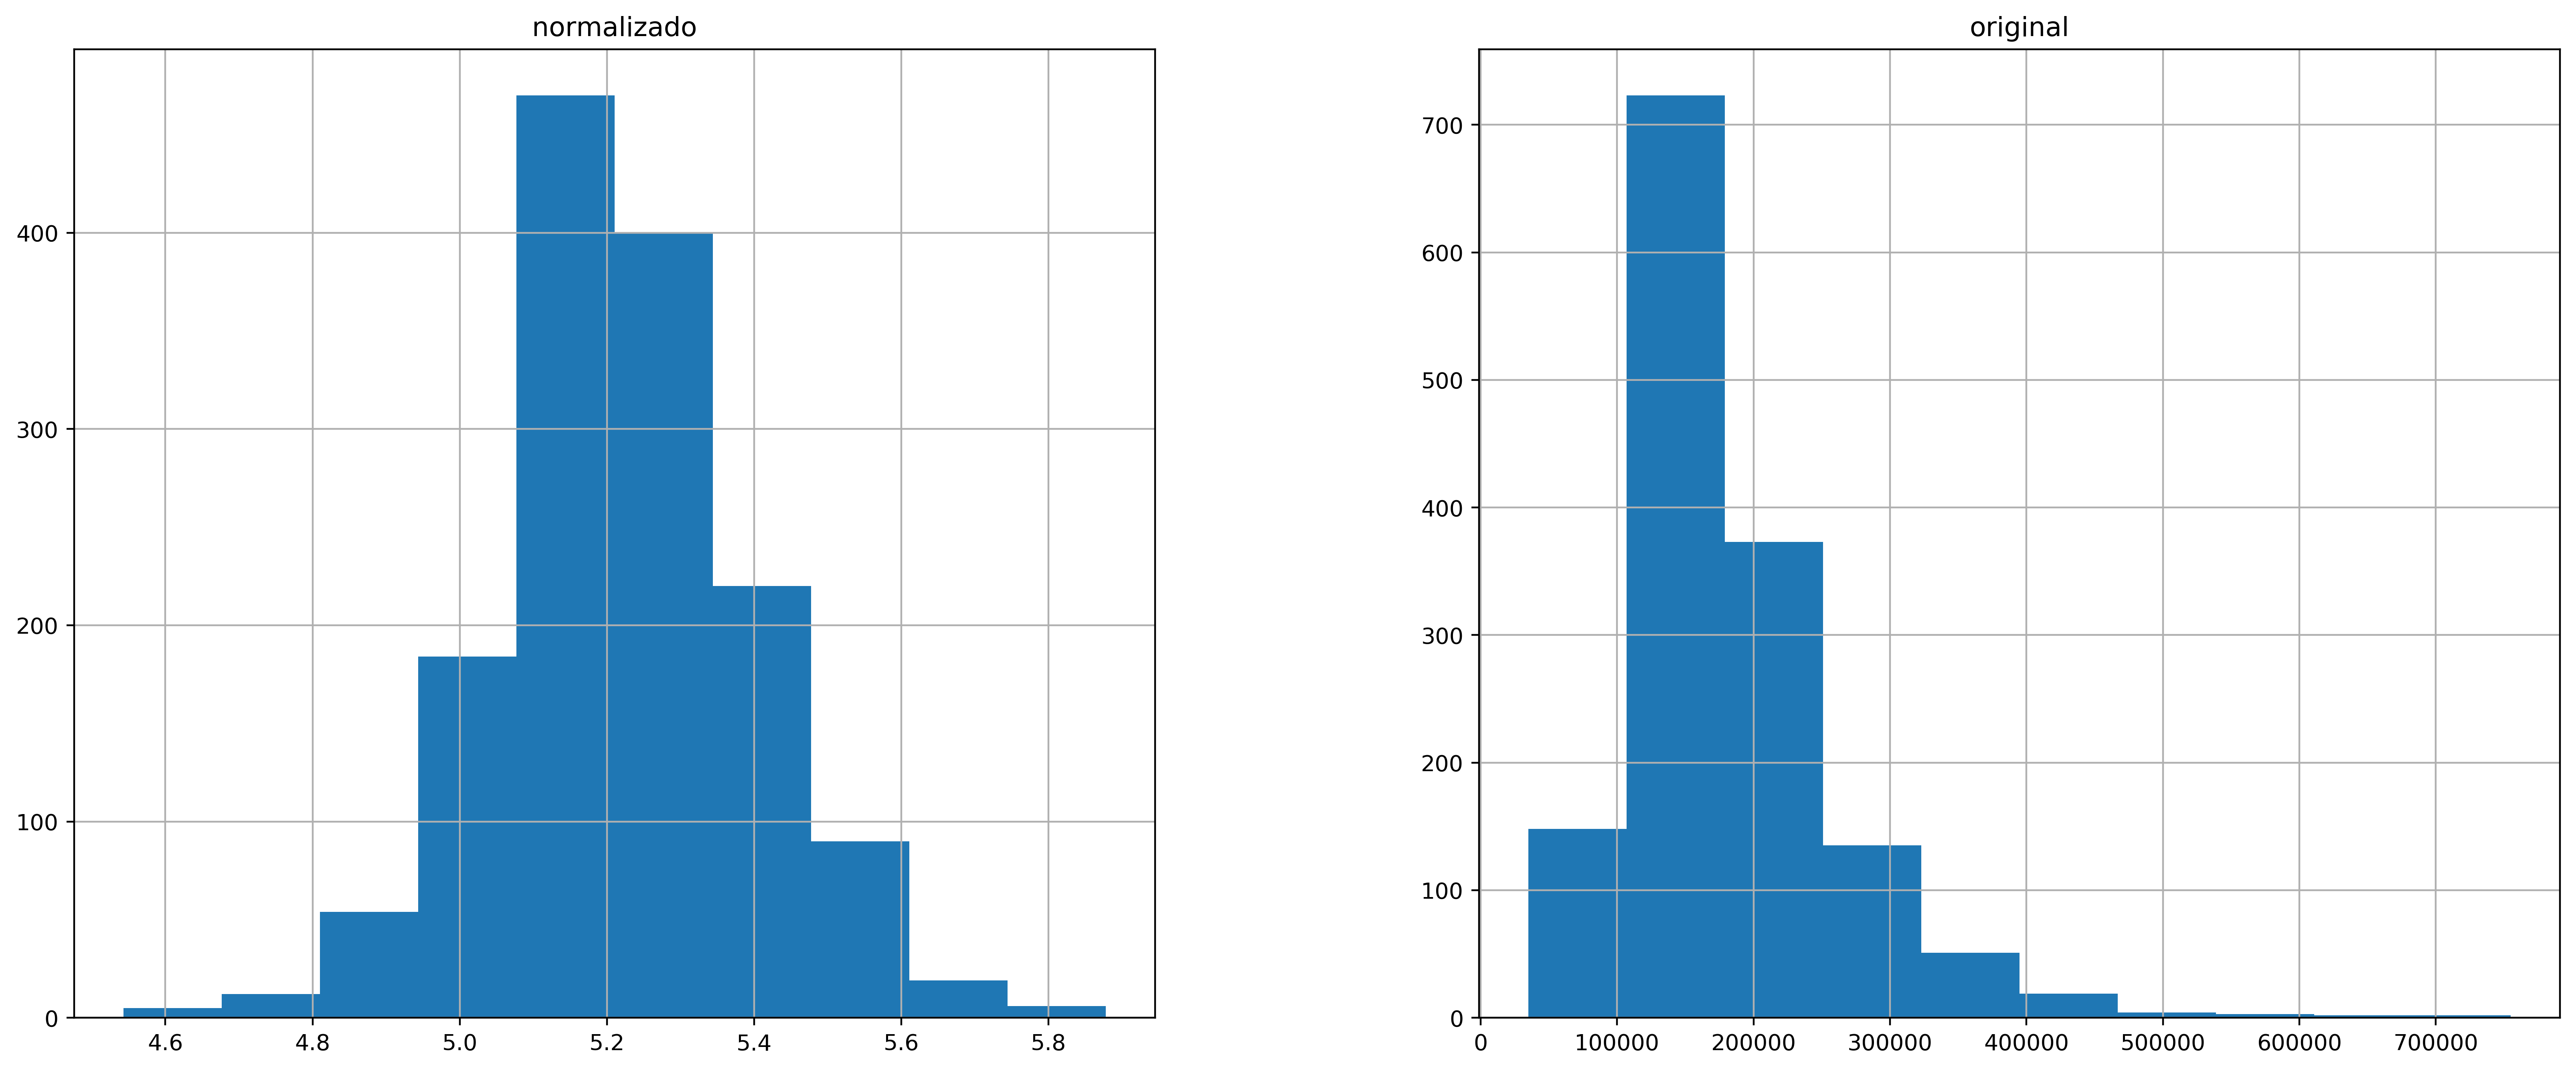

In [ ]:
# compara o antes e o depois da normalização

comp_precos = {'original':preco_antigo, 'normalizado':train['SalePrice']}
df_plot = pd.DataFrame(comp_precos)
mpl.rcParams['figure.figsize'] = (20,8)
df_plot.hist()

In [ ]:
# Mostra as colunas categóricas para serem usadas na trasnformação (np.get_dummies)
print(train.select_dtypes(include = 'object').columns)
print('')
print(test.select_dtypes(include = 'object').columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond',

In [ ]:
#Aplicar transformação das variáveis categóricas para numéricas

train = pd.get_dummies(train, columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

test = pd.get_dummies(test, columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])

#                                    ANÁLISE APÓS TRATAMENTOS

In [ ]:
train.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000  1460.000000  1460.000000  1460.000000   
mean      1.646437     1.820149     3.956787     0.773385     0.737644   
std       0.306050     0.153227     0.224725     0.104821     0.087824   
min       1.301030     1.322219     3.113943     0.000000     0.000000   
25%       1.301030     1.770852     3.878148     0.698970     0.698970   
50%       1.698970     1.838849     3.976740     0.778151     0.698970   
75%       1.845098     1.903090     4.064514     0.845098     0.778151   
max       2.278754     2.495544     5.332933     1.000000     0.954243   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean      3.294694      3.297708         -inf         -inf         -inf  ...   
std       0.006687      0.004529          NaN          NaN          NaN  ...   
min       3.272306      3.290035         -inf         -inf         -inf  ...   
25%       3.290925      3.293804         -inf         -inf         -inf  ...   
50%       3.295127      3.299725         -inf     2.583765         -inf  ...   
75%       3.301030      3.301898     2.220108     2.852632         -inf  ...   
max       3.303196      3.303196     3.204120     3.751587     3.168497  ...   

       SaleType_ConLw  SaleType_New  SaleType_Other  SaleType_WD  \
count     1460.000000   1460.000000     1460.000000  1460.000000   
mean         0.003425      0.083562        0.002055     0.867808   
std          0.058440      0.276824        0.045299     0.338815   
min          0.000000      0.000000        0.000000     0.000000   
25%          0.000000      0.000000        0.000000     1.000000   
50%          0.000000      0.000000        0.000000     1.000000   
75%          0.000000      0.000000        0.000000     1.000000   
max          1.000000      1.000000        1.000000     1.000000   

       SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
count            1460.000000            1460.000000           1460.000000   
mean                0.069178               0.002740              0.008219   
std                 0.253844               0.052289              0.090317   
min                 0.000000               0.000000              0.000000   
25%                 0.000000               0.000000              0.000000   
50%                 0.000000               0.000000              0.000000   
75%                 0.000000               0.000000              0.000000   
max                 1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1460.000000           1460.000000            1460.000000  
mean               0.013699              0.820548               0.085616  
std                0.116277              0.383862               0.279893  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 289 columns]

In [ ]:
# Remover os valores infinitos (inf, -inf)
train = train.replace([np.inf, -np.inf], np.nan)
test = test.replace([np.inf, -np.inf], np.nan)

In [ ]:
train.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000  1460.000000  1460.000000  1460.000000   
mean      1.646437     1.820149     3.956787     0.773385     0.737644   
std       0.306050     0.153227     0.224725     0.104821     0.087824   
min       1.301030     1.322219     3.113943     0.000000     0.000000   
25%       1.301030     1.770852     3.878148     0.698970     0.698970   
50%       1.698970     1.838849     3.976740     0.778151     0.698970   
75%       1.845098     1.903090     4.064514     0.845098     0.778151   
max       2.278754     2.495544     5.332933     1.000000     0.954243   

         YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
count  1460.000000   1460.000000  591.000000  993.000000  167.000000  ...   
mean      3.294694      3.297708    2.270405    2.699018    2.486359  ...   
std       0.006687      0.004529    0.380318    0.388455    0.357312  ...   
min       3.272306      3.290035    0.000000    0.301030    1.447158  ...   
25%       3.290925      3.293804    2.053078    2.569374    2.251623  ...   
50%       3.295127      3.299725    2.307496    2.781037    2.549003  ...   
75%       3.301030      3.301898    2.519159    2.938019    2.741152  ...   
max       3.303196      3.303196    3.204120    3.751587    3.168497  ...   

       SaleType_ConLw  SaleType_New  SaleType_Other  SaleType_WD  \
count     1460.000000   1460.000000     1460.000000  1460.000000   
mean         0.003425      0.083562        0.002055     0.867808   
std          0.058440      0.276824        0.045299     0.338815   
min          0.000000      0.000000        0.000000     0.000000   
25%          0.000000      0.000000        0.000000     1.000000   
50%          0.000000      0.000000        0.000000     1.000000   
75%          0.000000      0.000000        0.000000     1.000000   
max          1.000000      1.000000        1.000000     1.000000   

       SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
count            1460.000000            1460.000000           1460.000000   
mean                0.069178               0.002740              0.008219   
std                 0.253844               0.052289              0.090317   
min                 0.000000               0.000000              0.000000   
25%                 0.000000               0.000000              0.000000   
50%                 0.000000               0.000000              0.000000   
75%                 0.000000               0.000000              0.000000   
max                 1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1460.000000           1460.000000            1460.000000  
mean               0.013699              0.820548               0.085616  
std                0.116277              0.383862               0.279893  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 289 columns]

In [ ]:
train.fillna(train.mean(), inplace = True)

In [ ]:
test.fillna(test.mean(), inplace = True)

In [ ]:
test

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       1.301030     1.903090  4.065281     0.698970     0.778151   3.292478   
1       1.301030     1.908485  4.154333     0.778151     0.778151   3.291813   
2       1.778151     1.869232  4.140822     0.698970     0.698970   3.300378   
3       1.778151     1.892095  3.999043     0.778151     0.778151   3.300595   
4       2.079181     1.633468  3.699404     0.903090     0.698970   3.299289   
...          ...          ...       ...          ...          ...        ...   
1454    2.204120     1.322219  3.286905     0.602060     0.845098   3.294466   
1455    2.204120     1.322219  3.277380     0.602060     0.698970   3.294466   
1456    1.301030     2.204120  4.301030     0.698970     0.845098   3.292256   
1457    1.929419     1.792392  4.018742     0.698970     0.698970   3.299289   
1458    1.778151     1.869232  3.983491     0.845098     0.698970   3.299507   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0         3.292478    2.273557    2.670246    2.158362  ...               0   
1         3.291813    2.033424    2.965202    2.484675  ...               0   
2         3.300595    2.273557    2.898176    2.484675  ...               0   
3         3.300595    1.301030    2.779596    2.484675  ...               0   
4         3.299289    2.273557    2.419956    2.484675  ...               0   
...            ...         ...         ...         ...  ...             ...   
1454      3.294466    2.273557    2.683118    2.484675  ...               0   
1455      3.294466    2.273557    2.401401    2.484675  ...               0   
1456      3.300161    2.273557    3.087781    2.484675  ...               0   
1457      3.299289    2.273557    2.527630    2.484675  ...               0   
1458      3.299725    1.973128    2.879669    2.484675  ...               0   

      SaleType_New  SaleType_Other  SaleType_WD  SaleCondition_Abnorml  \
0                0               0            1                      0   
1                0               0            1                      0   
2                0               0            1                      0   
3                0               0            1                      0   
4                0               0            1                      0   
...            ...             ...          ...                    ...   
1454             0               0            1                      0   
1455             0               0            1                      1   
1456             0               0            1                      1   
1457             0               0            1                      0   
1458             0               0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        1                      0  
4                        1                    

# ENTRAREMOS NO PREPROCESSAMENTO

In [ ]:
# subconjunto com variáveis independentes
X = train.drop(['SalePrice'], axis = 1)

# subconjunto com a variável dependente
y = train['SalePrice']

In [ ]:
train

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       1.778151     1.812913  3.926857     0.845098     0.698970   3.301681   
1       1.301030     1.903090  3.982271     0.778151     0.903090   3.295787   
2       1.778151     1.832509  4.051153     0.845098     0.698970   3.301247   
3       1.845098     1.778151  3.980003     0.845098     0.698970   3.282169   
4       1.778151     1.924279  4.154120     0.903090     0.698970   3.301030   
...          ...          ...       ...          ...          ...        ...   
1455    1.778151     1.792392  3.898561     0.778151     0.698970   3.300813   
1456    1.301030     1.929419  4.119751     0.778151     0.778151   3.296226   
1457    1.845098     1.819544  3.956265     0.845098     0.954243   3.288026   
1458    1.301030     1.832509  3.987532     0.698970     0.778151   3.290035   
1459    1.301030     1.875061  3.997255     0.698970     0.778151   3.293363   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0         3.301681    2.292256    2.848805    2.486359  ...               0   
1         3.295787    2.270405    2.990339    2.486359  ...               0   
2         3.301464    2.209515    2.686636    2.486359  ...               0   
3         3.294466    2.270405    2.334454    2.486359  ...               0   
4         3.301030    2.544068    2.816241    2.486359  ...               0   
...            ...         ...         ...         ...  ...             ...   
1455      3.301030    2.270405    2.699018    2.486359  ...               0   
1456      3.298416    2.075547    2.897627    2.212188  ...               0   
1457      3.302331    2.270405    2.439333    2.486359  ...               0   
1458      3.300161    2.270405    1.690196    3.012415  ...               0   
1459      3.293363    2.270405    2.919078    2.462398  ...               0   

      SaleType_New  SaleType_Other  SaleType_WD  SaleCondition_Abnorml  \
0                0               0            1                      0   
1                0               0            1                      0   
2                0               0            1                      0   
3                0               0            1                      1   
4                0               0            1                      0   
...            ...             ...          ...                    ...   
1455             0               0            1                      0   
1456             0               0            1                      0   
1457             0               0            1                      0   
1458             0               0            1                      0   
1459             0               0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                    

In [ ]:
# Veficar as dimensões dos subconjuntos

print(X.shape, y.shape)

(1460, 288) (1460,)


In [ ]:
# Carregar pacotes para preprocessamento e machine learning

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LassoCV, Ridge

from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR

# explained_variance_score: essa metrica é a função da pontuação da regressão da variancia explicada: varia de 0 a 1, 
# sendo 1 = ótimo.
# na minha opinião, o mais importante para esse dataset é manter o padrão (uniform_average), mas você pode tentar outros

# A outra métrica é r2_score: todos nós já sabemos como é importante o valor de R2, que varia de 0 a 1.
from sklearn.metrics import explained_variance_score, r2_score, SCORERS

from scipy.stats.stats import pearsonr

import warnings
warnings.filterwarnings("ignore")


# MACHINE LEARNING: Linear Regression

In [ ]:
# Função para testar tamanho da amostra e n_component do PCA no algoritmo de Regressão Linear

rs = []
nc = []
r2s = []
scoreev = []

for i in range(10, 30):
    for j in range(100, 500, 10):
    # separar treinos e testes
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = j)
        soma_j = 100 + j

        lr = LinearRegression()
        evs = explained_variance_score

        # Aplicar automação para n_component
        pca = PCA(n_components=i)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        taxas = pca.explained_variance_ratio_

        # Treinar o modelo
        model_lr = lr.fit(X_train, y_train)

        # Criar o modelo de predição
        pred_lr = lr.predict(X_test)
        pred_lr.shape

        # Avaliar o modelo com r2_score
        r2 = r2_score(y_true = y_test, y_pred = pred_lr)

        # Avaliar o modelo com explained_variance_score
        score_ev = evs(y_true = y_test, y_pred = pred_lr)
        
        rs.append(soma_j)
        nc.append(i)
        r2s.append(r2)
        scoreev.append(score_ev)

In [ ]:
scores_lr = pd.DataFrame(columns = ['n_component','random_state', 'r2_score', 'evs'], data = (list(zip(nc, rs, r2s, scoreev))))

In [ ]:
# n-component e ramdom_state pulam de 10 em 10
scores_lr.head()

n_component  random_state  r2_score       evs
0           10           200  0.640661  0.640696
1           10           210  0.666096  0.666249
2           10           220  0.684266  0.684392
3           10           230  0.703328  0.707380
4           10           240  0.693150  0.693178

In [ ]:
# Resumo dos escores
# Essas são as combinações que deverão rodas na versão final
scores_lr.max()

n_component      29.000000
random_state    590.000000
r2_score          0.809014
evs               0.809430
dtype: float64

In [ ]:
# Converte valores normalizados (log10) para valores originais e depois os converte em Series do Pandas
novos_valores = [10**i for i in y_test]
n_values = pd.Series(novos_valores)

valores_previstos = [10**i for i in pred_lr]
val_pred = pd.Series(valores_previstos)

In [ ]:
# Avaliação do modelo em relação aos dados novos
dif = n_values - val_pred
avalia = pd.DataFrame(columns = ['Dados_Novos', 'Dados_Previstos', 'Erro'], data = (list(zip(n_values, val_pred, dif))))
print(avalia.head())

   Dados_Novos  Dados_Previstos          Erro
0     120500.0    125830.979876  -5330.979876
1     196500.0    197844.685661  -1344.685661
2     176000.0    171067.760331   4932.239669
3     213500.0    210203.716223   3296.283777
4     171000.0    140338.596651  30661.403349


In [ ]:
# O Modelo apresenta um erro médio não tão alto, mas o desvio padrão é extremamente alto, o que invalida nosso modelo.
avalia.describe()

Dados_Novos  Dados_Previstos           Erro
count     365.000000       365.000000     365.000000
mean   181778.523288    175427.957356    6350.565932
std     81870.291299     62719.978505   33546.112244
min     37900.000000     71226.770518 -137388.938771
25%    132500.000000    130393.615858   -8755.481295
50%    165000.000000    159809.908689    1960.339861
75%    210000.000000    204076.035659   12297.714478
max    611657.000000    403705.920106  217990.971963

In [ ]:
# Valores extremamente divergentes
val_extr = avalia.sort_values(ascending = False, by = 'Erro').head(60)

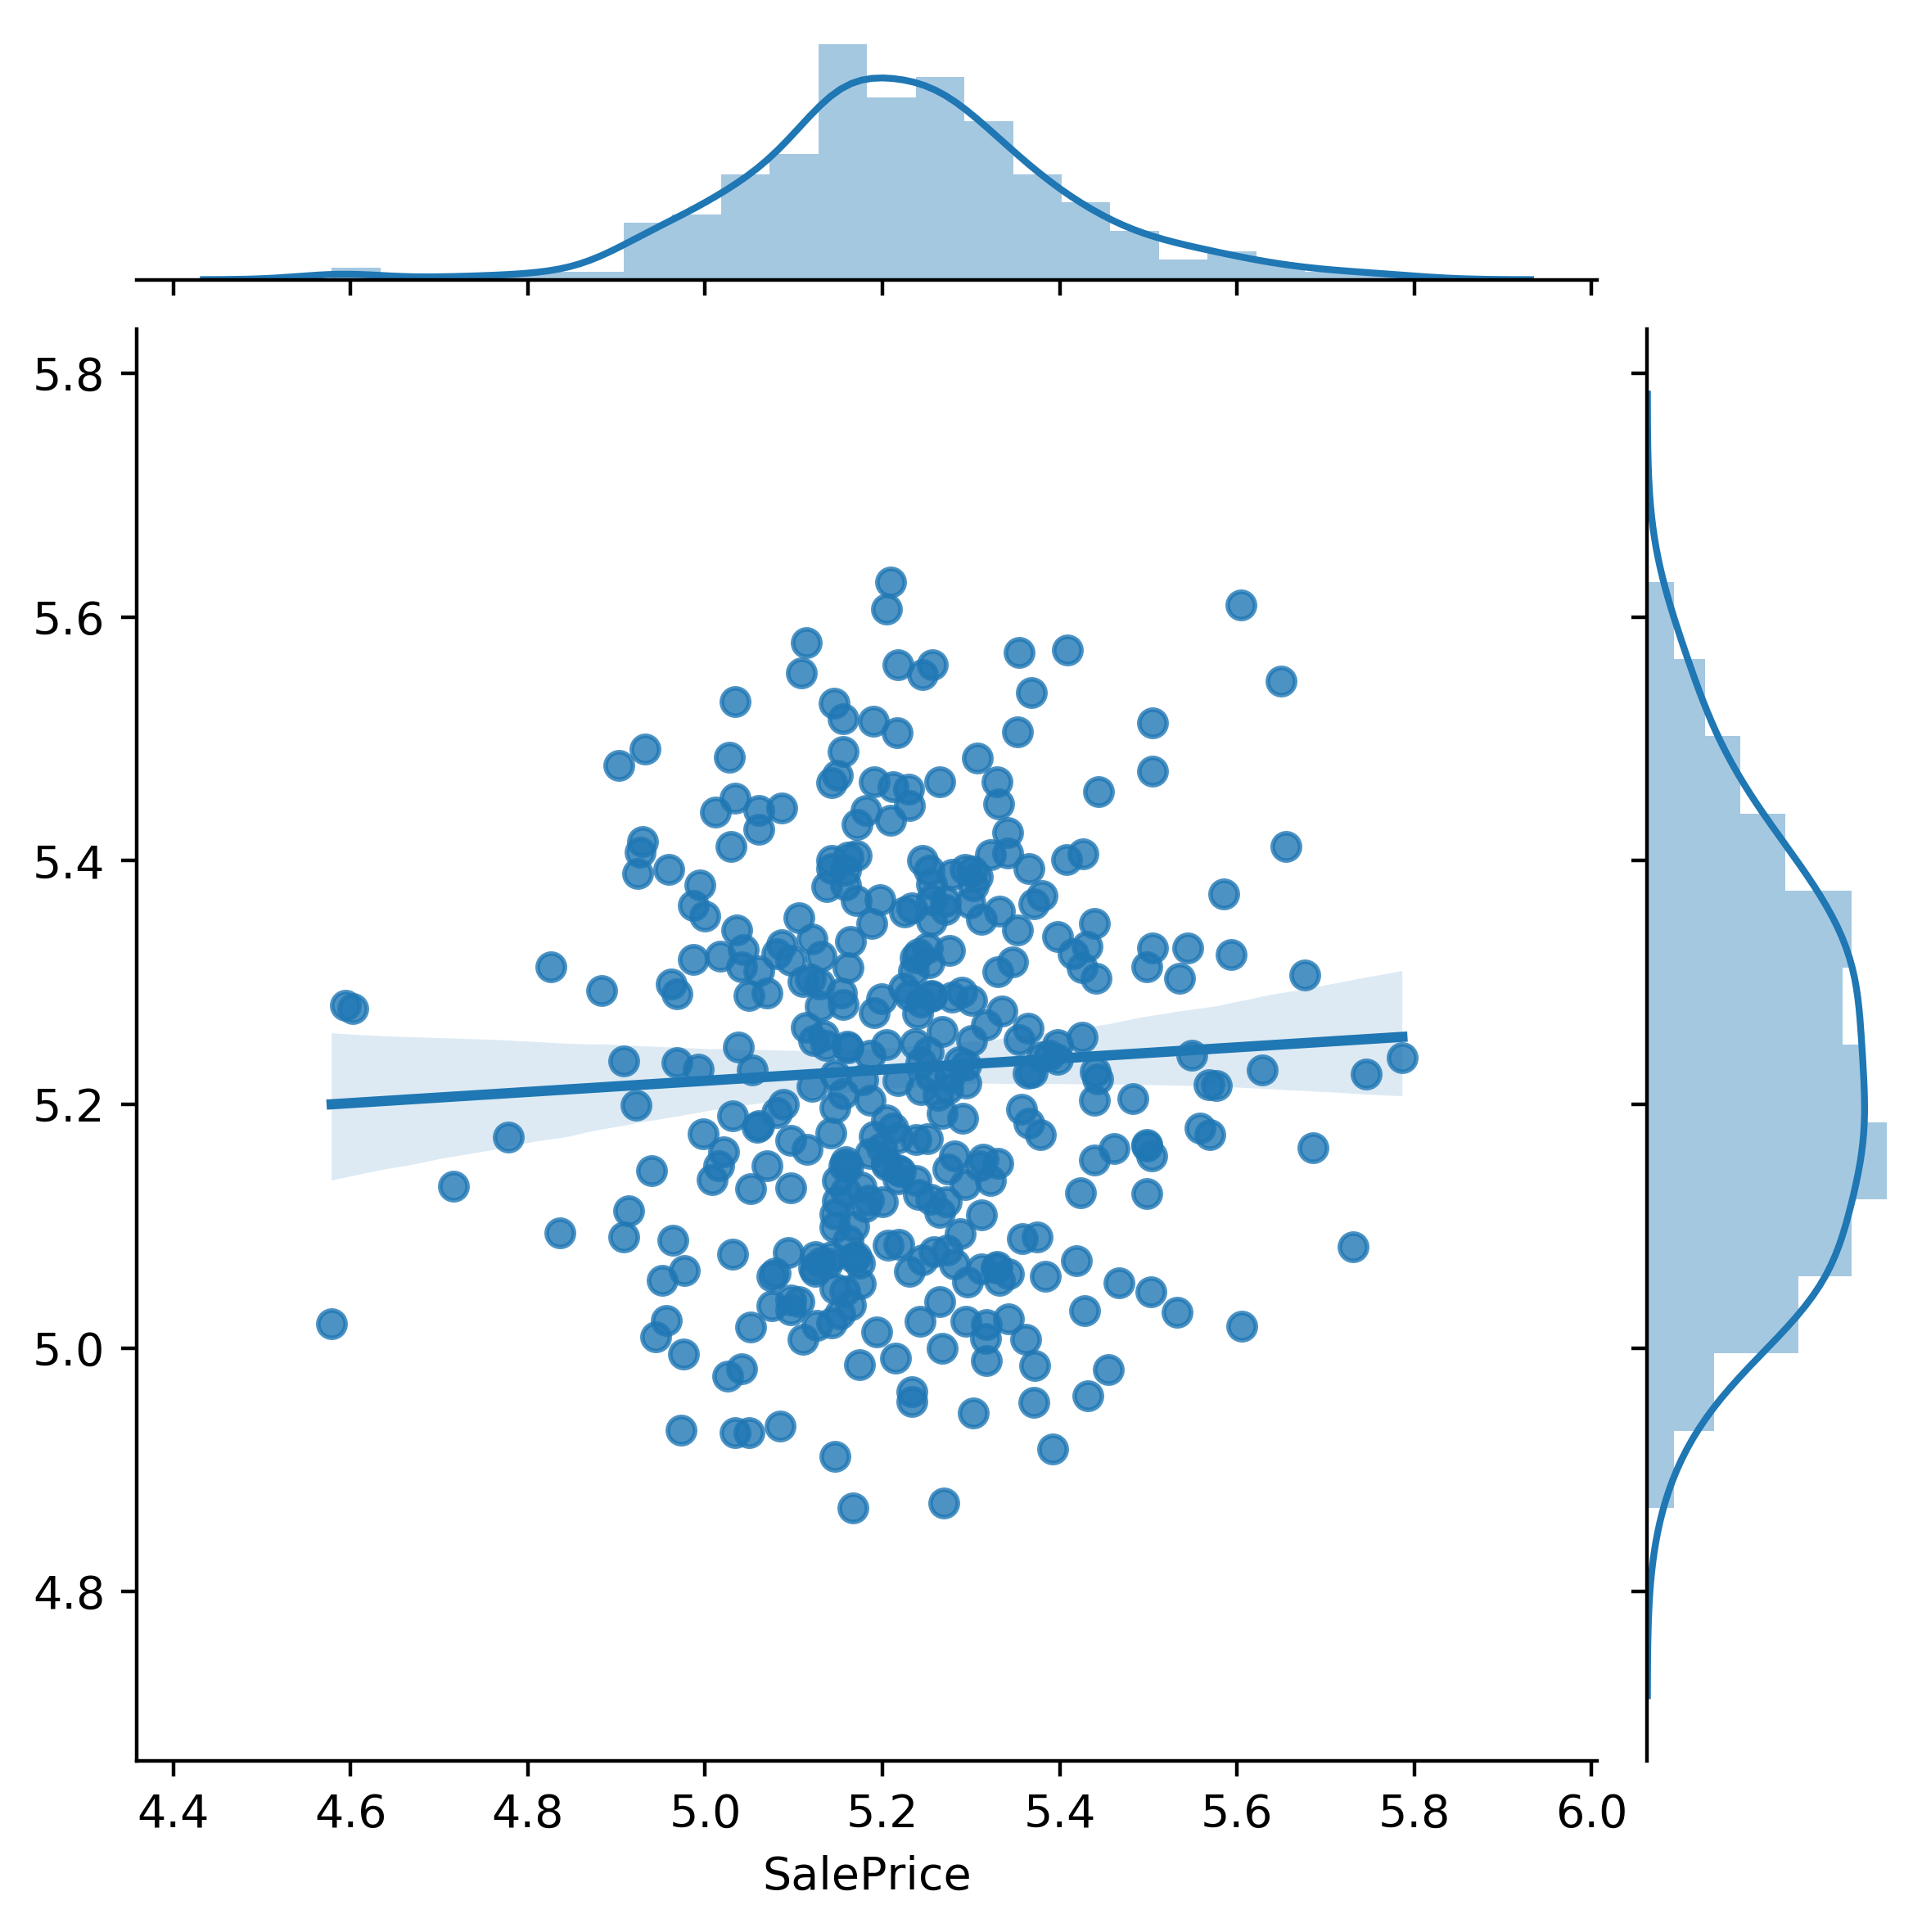

In [ ]:
# Ao plotar os 60 valores com maiores erros é possivel ver umalinha de regessão quase nula.
sb.jointplot(data = val_extr, x = y_test, y = pred_lr, kind = 'reg')

In [ ]:
# Função que avalia o rmse (root mean squared error) com Cross Validation
def rmse(modelo):
    rmse = np.sqrt(-cross_val_score(modelo,
                               X_train,
                               y_train,
                               scoring = 'neg_mean_squared_error',
                               cv = 5))
    return(rmse)

In [ ]:
# Resultado das cinco rodadas do erro quadrado médio
rmse(model_lr)

array([0.09008099, 0.08910689, 0.08255379, 0.08111514, 0.0779531 ])

In [ ]:
# Resultado da média do RMSE
rmse(model_lr).mean()

0.08416198248821247

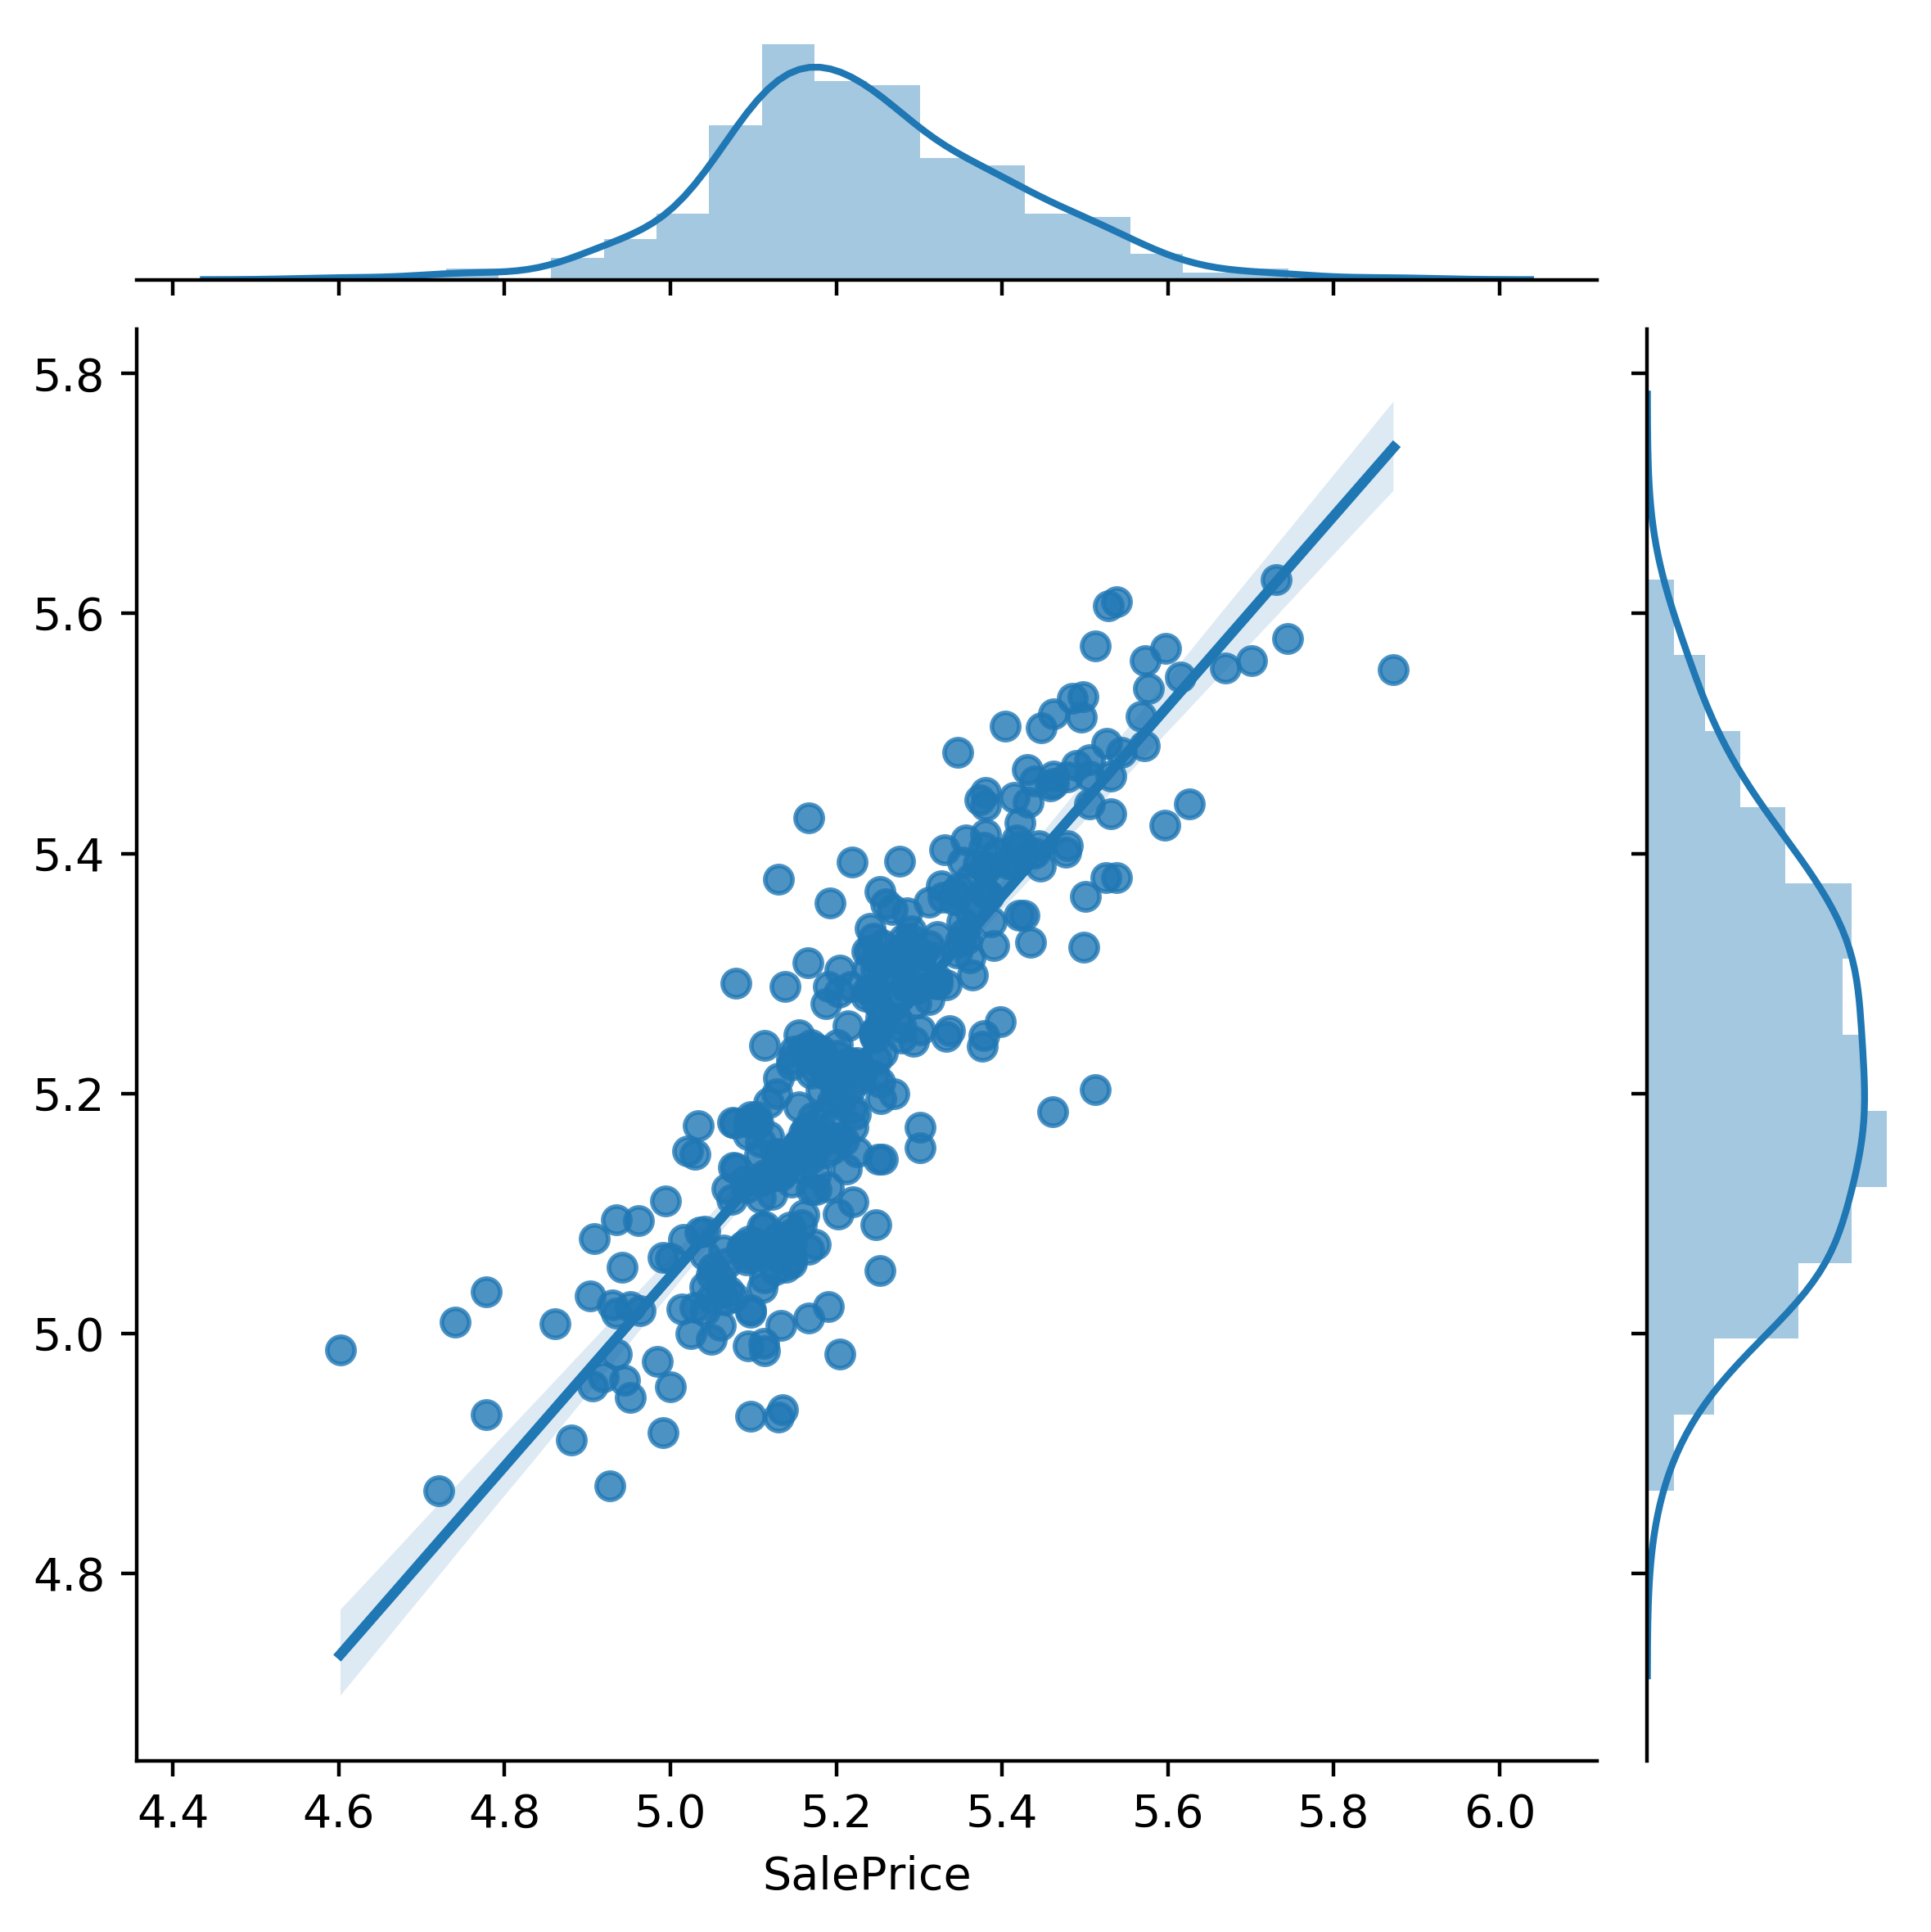

In [ ]:
# Visualização da reta de regressão treinada
sb.jointplot(x = y_test, y = pred_lr, kind = 'reg')

In [ ]:
# Visualização do resumo estatísitco
import statsmodels.api as sm
import statsmodels.formula as smf
from statsmodels.regression.linear_model import OLSResults

reg = sm.OLS(y, X).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     82.88
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:35:58   Log-Likelihood:                 2618.4
No. Observations:                1460   AIC:                            -4725.
Df Residuals:                    1204   BIC:                            -3372.
Df Model:                         255                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -0.01

In [ ]:
# Cria uma série de dados
reg_coef = pd.Series(reg.pvalues, index = X.columns)

In [ ]:
# Concatena duas lista de dados para selecionar os menores valores de P-Values
coef_imp = pd.concat([reg_coef.sort_values(ascending = False).head(0), reg_coef.sort_values(ascending = True).head(34)])

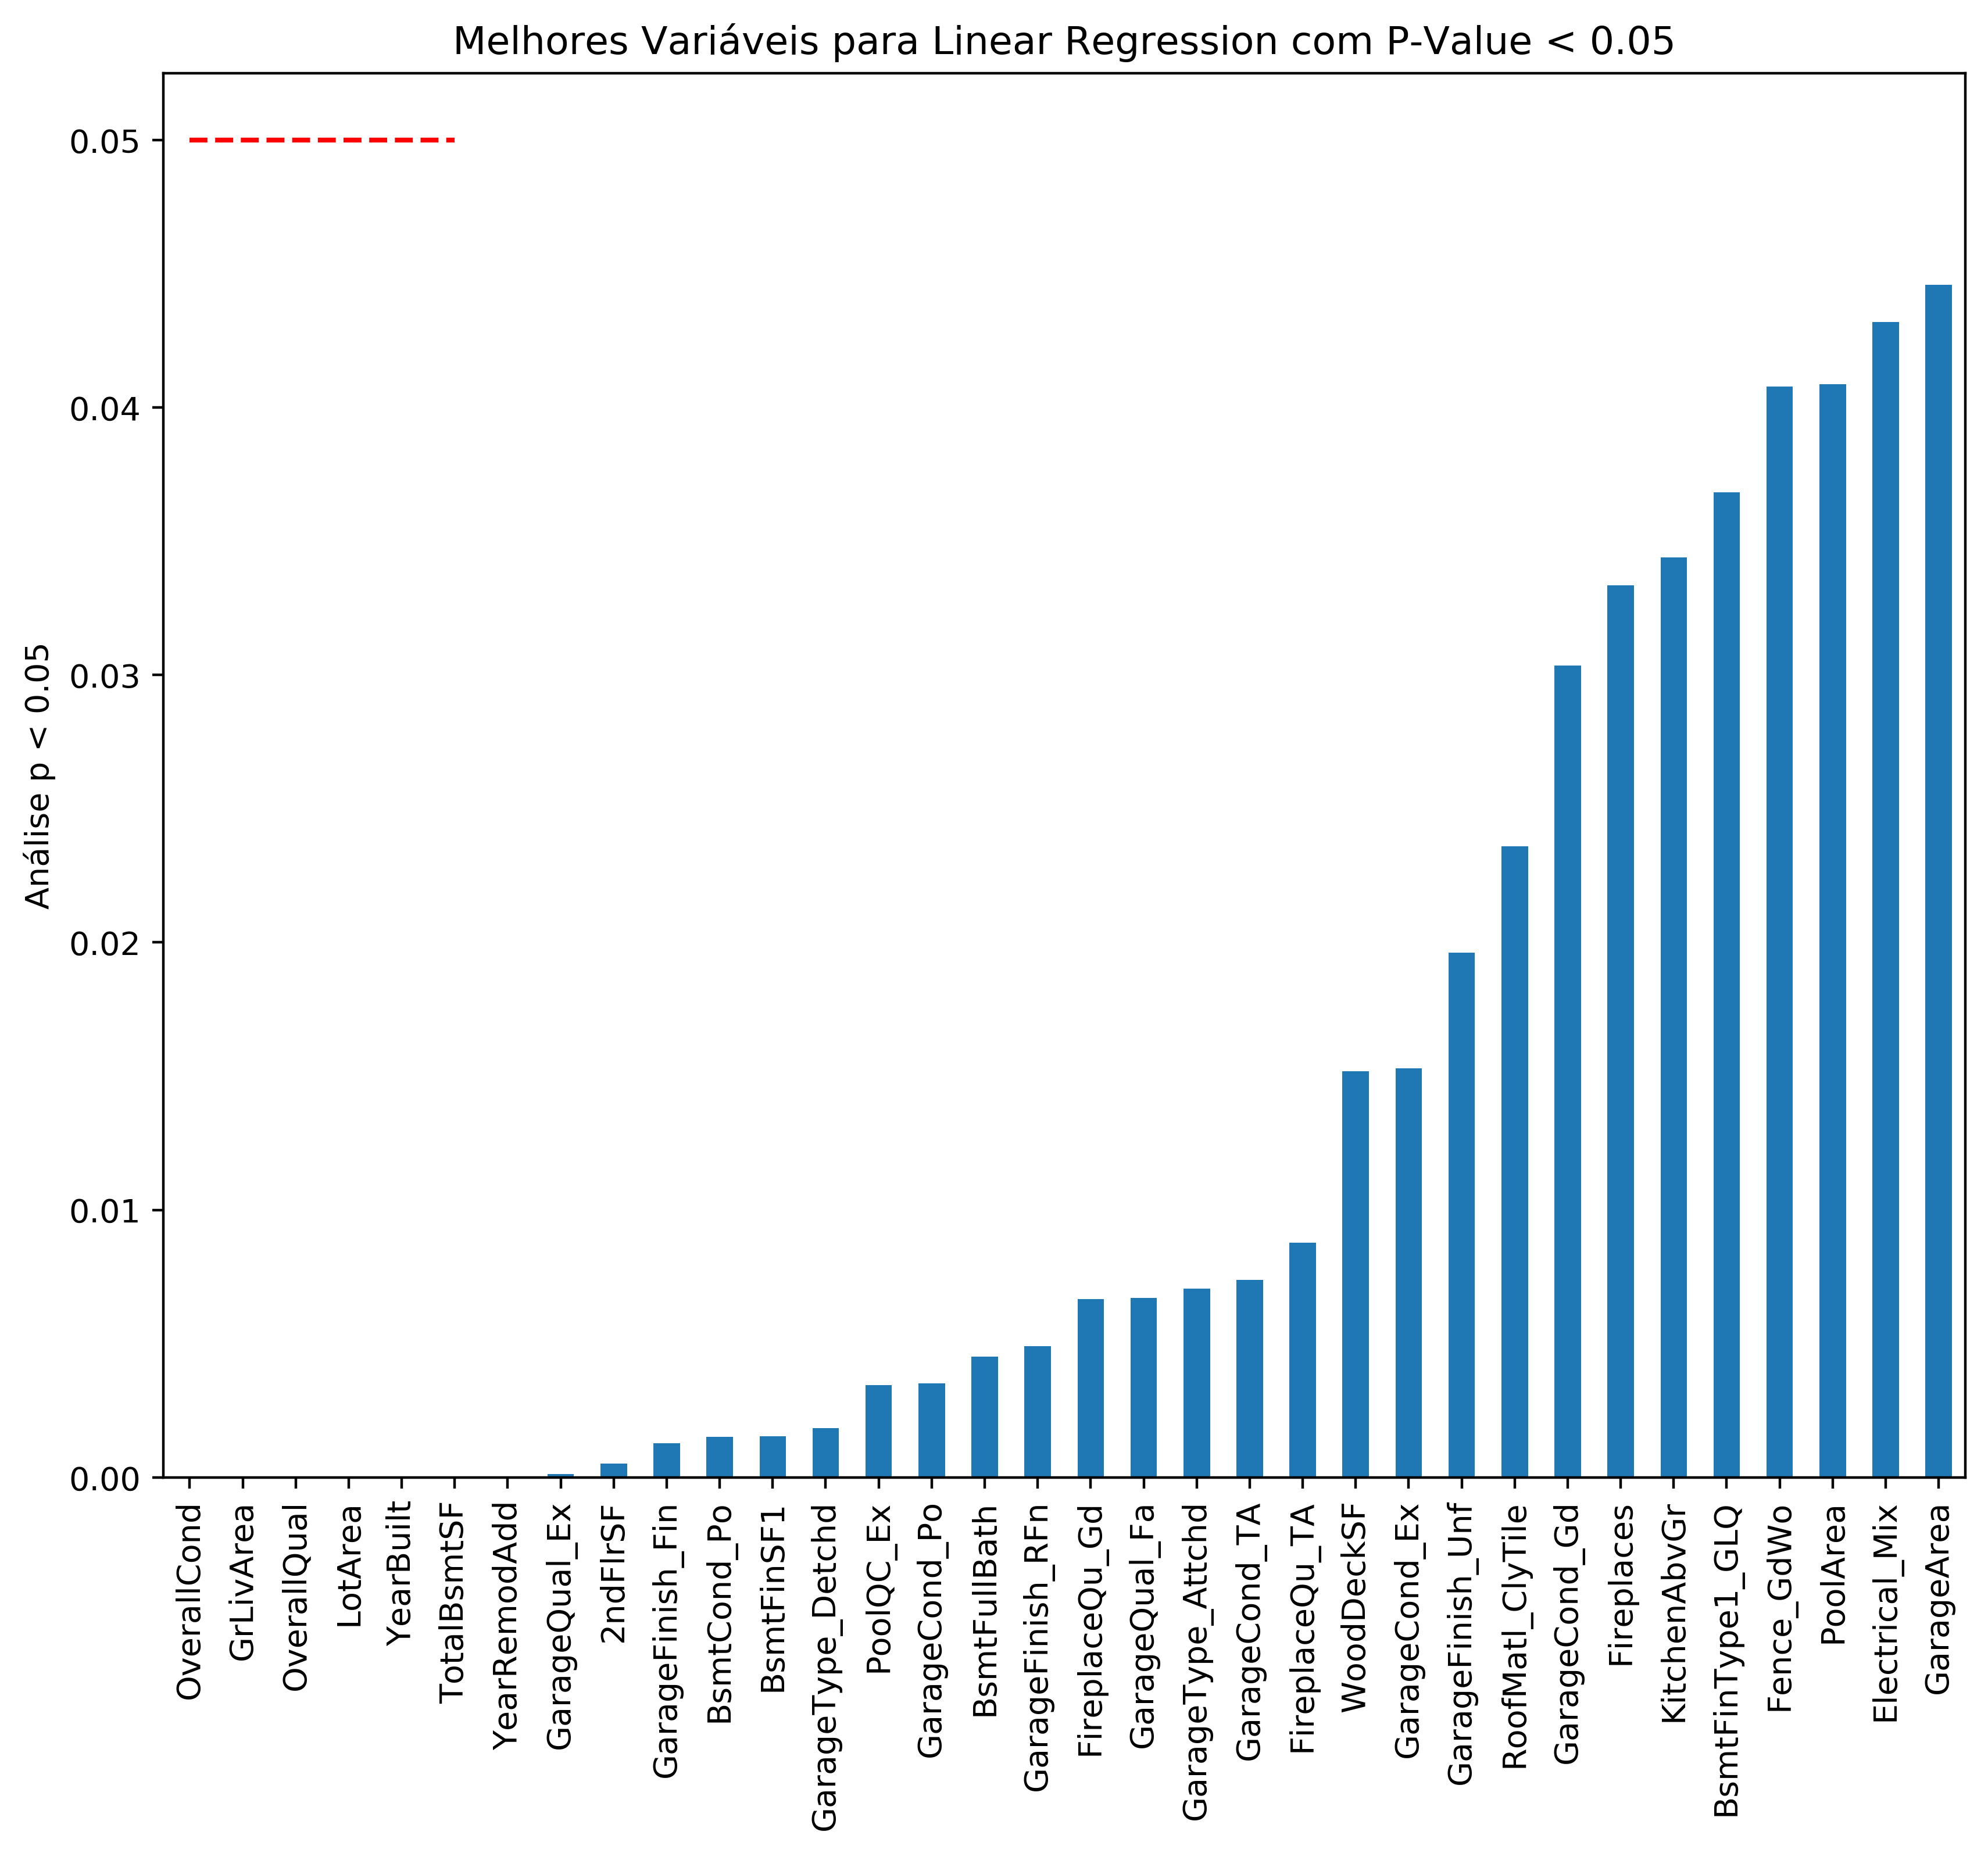

In [ ]:
# Cria um plot das variáveis com valor de p (< 0.05)
# são 34 variáveis com p_value desejável
plt.figure(figsize=(10,8))
coef_imp.sort_values().plot(kind = 'bar')

plt.ylabel('Análise p < 0.05')
plt.title('Melhores Variáveis para Linear Regression com P-Value < 0.05')
plt.plot([0.05,0.05,0.05,0.05,0.05,0.05], 'r--')
plt.show()


In [ ]:
# Concatena duas lista de dados para selecionar os maiores valores de P-Values
coef_imp = pd.concat([reg_coef.sort_values(ascending = False).head(254), reg_coef.sort_values(ascending = True).head(0)])

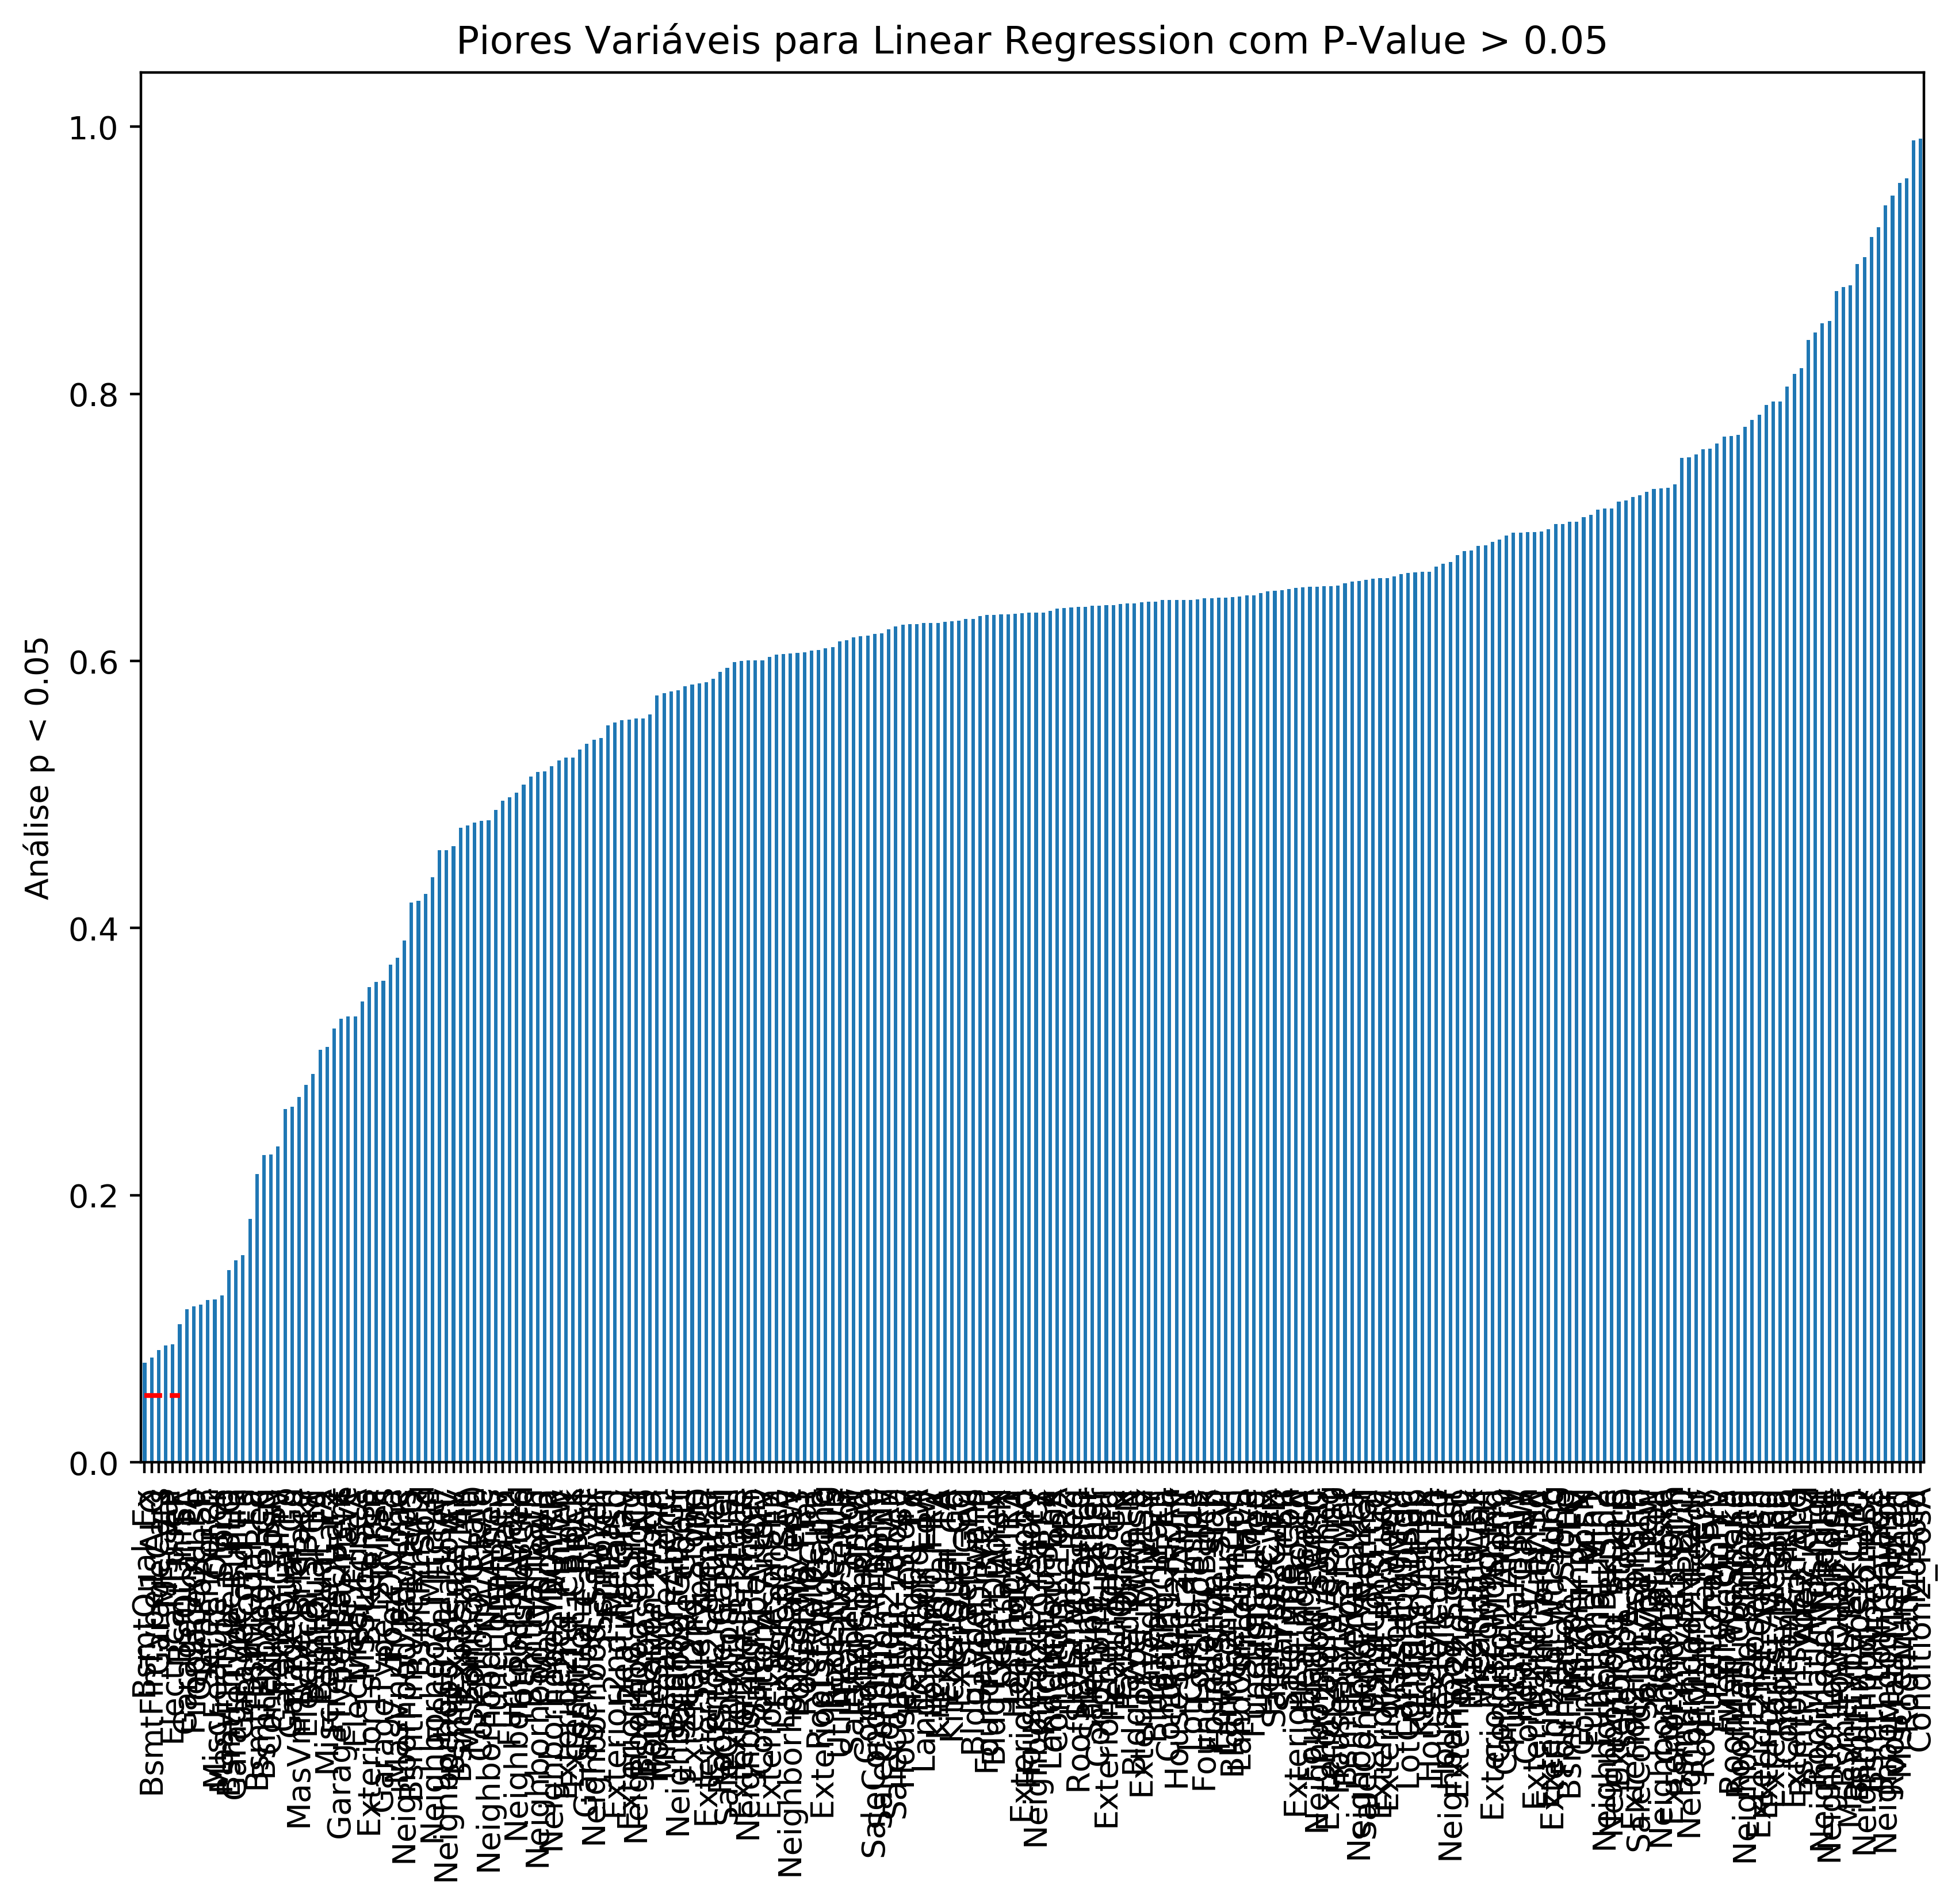

In [ ]:
# Cria um plot das variáveis com valor de p (< 0.05)
# são 34 variáveis com p_value desejável
plt.figure(figsize=(10,8))
coef_imp.sort_values().plot(kind = 'bar')

plt.ylabel('Análise p < 0.05')
plt.title('Piores Variáveis para Linear Regression com P-Value > 0.05')
plt.plot([0.05,0.05,0.05,0.05,0.05,0.05], 'r--')
plt.show()


# MACHINE LEARNING: Lasso

Lasso significa "Least Absolute Shrinkage and Selection Operator" ou operação(regularização e regressão) e seleção mínimo absoluto.
Isso siginifica que LASSO faz a regularização das variáveis, bem como a seleção destas em ordem de acurácia.

In [ ]:
# subconjunto com variáveis independentes
X = train.drop(['SalePrice'], axis = 1)

# subconjunto com a variável dependente
y = train['SalePrice']

In [ ]:
# Função para testar melhor amostragem para LASSO

rs_ls = []
r2s_ls = []
scoreev_ls = []


for j in range(100, 500, 10):
    # separar treinos e testes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = j)
    soma_j = 100 + j
    
    # Manter os parametros padrão
    ls = LassoCV(cv = 5, random_state = 100, alphas = [1, 0.01, 0.001, 0.0005])
    
    # Treinar o modelo
    model_ls = ls.fit(X_train, y_train)
    model_ls.score(X, y)

    # Criar o modelo de predição
    pred_ls = model_ls.predict(X_test)

    # Avaliar o modelo com r2_score
    r2_ls = r2_score(y_true = y_test, y_pred = pred_ls)

    # Avaliar o modelo com explained_variance_score
    score_ls = evs(y_true = y_test, y_pred = pred_ls)
    
    rs_ls.append(soma_j)
    r2s_ls.append(r2_ls)
    scoreev_ls.append(score_ls)

In [ ]:
# Cria um dataframe para apresentação dos scores
scores_ls = pd.DataFrame(columns = ['random_state', 'r2_score', 'evs'], data = (list(zip(rs_ls, r2s_ls, scoreev_ls))))

In [ ]:
scores_ls.head()

random_state  r2_score       evs
0           200  0.892312  0.892420
1           210  0.865916  0.866176
2           220  0.895121  0.895122
3           230  0.886400  0.889381
4           240  0.870370  0.870515

In [ ]:
# Resumo dos escores
scores_ls.max()

random_state    590.000000
r2_score          0.913637
evs               0.914011
dtype: float64

In [ ]:
# Converte valores normalizados (log10) para valores originais e depois os converte em Series do Pandas
novos_valores = [10**i for i in y_test]
n_values_ls = pd.Series(novos_valores)

valores_previstos = [10**i for i in pred_ls]
val_pred_ls = pd.Series(valores_previstos)

In [ ]:
# Avaliação do modelo em relação aos dados novos
dif = n_values_ls - val_pred_ls
avalia_ls = pd.DataFrame(columns = ['Dados_Novos', 'Dados_Previstos', 'Erro'], data = (list(zip(n_values_ls, val_pred_ls, dif))))
print(avalia.head())
print('')
print('O erro médio entre os dados novos e os dados previsto é de $', avalia_ls['Erro'].mean())

   Dados_Novos  Dados_Previstos          Erro
0     120500.0    125830.979876  -5330.979876
1     196500.0    197844.685661  -1344.685661
2     176000.0    171067.760331   4932.239669
3     213500.0    210203.716223   3296.283777
4     171000.0    140338.596651  30661.403349

O erro médio entre os dados novos e os dados previsto é de $ 3424.373623947116


In [ ]:
# O erro médio  e o desvio padrão foram reduzidos para, talvez, valores aceitáveis, 
# mas precisamos continuar aplicando outros modelos para fazer comparações.
avalia_ls.describe()

Dados_Novos  Dados_Previstos           Erro
count     365.000000       365.000000     365.000000
mean   184551.978082    181127.604458    3424.373624
std     83293.093240     71683.722242   27444.998782
min     40000.000000     53330.083105 -145969.648959
25%    130000.000000    128339.119718   -8534.403313
50%    162000.000000    165449.436473    -125.553341
75%    220000.000000    216912.029319   10803.447033
max    745000.000000    466471.692325  278528.307675

In [ ]:
# Valores extremamente divergentes
val_extr_ls = avalia_ls.sort_values(ascending = False, by = 'Erro').head(60)

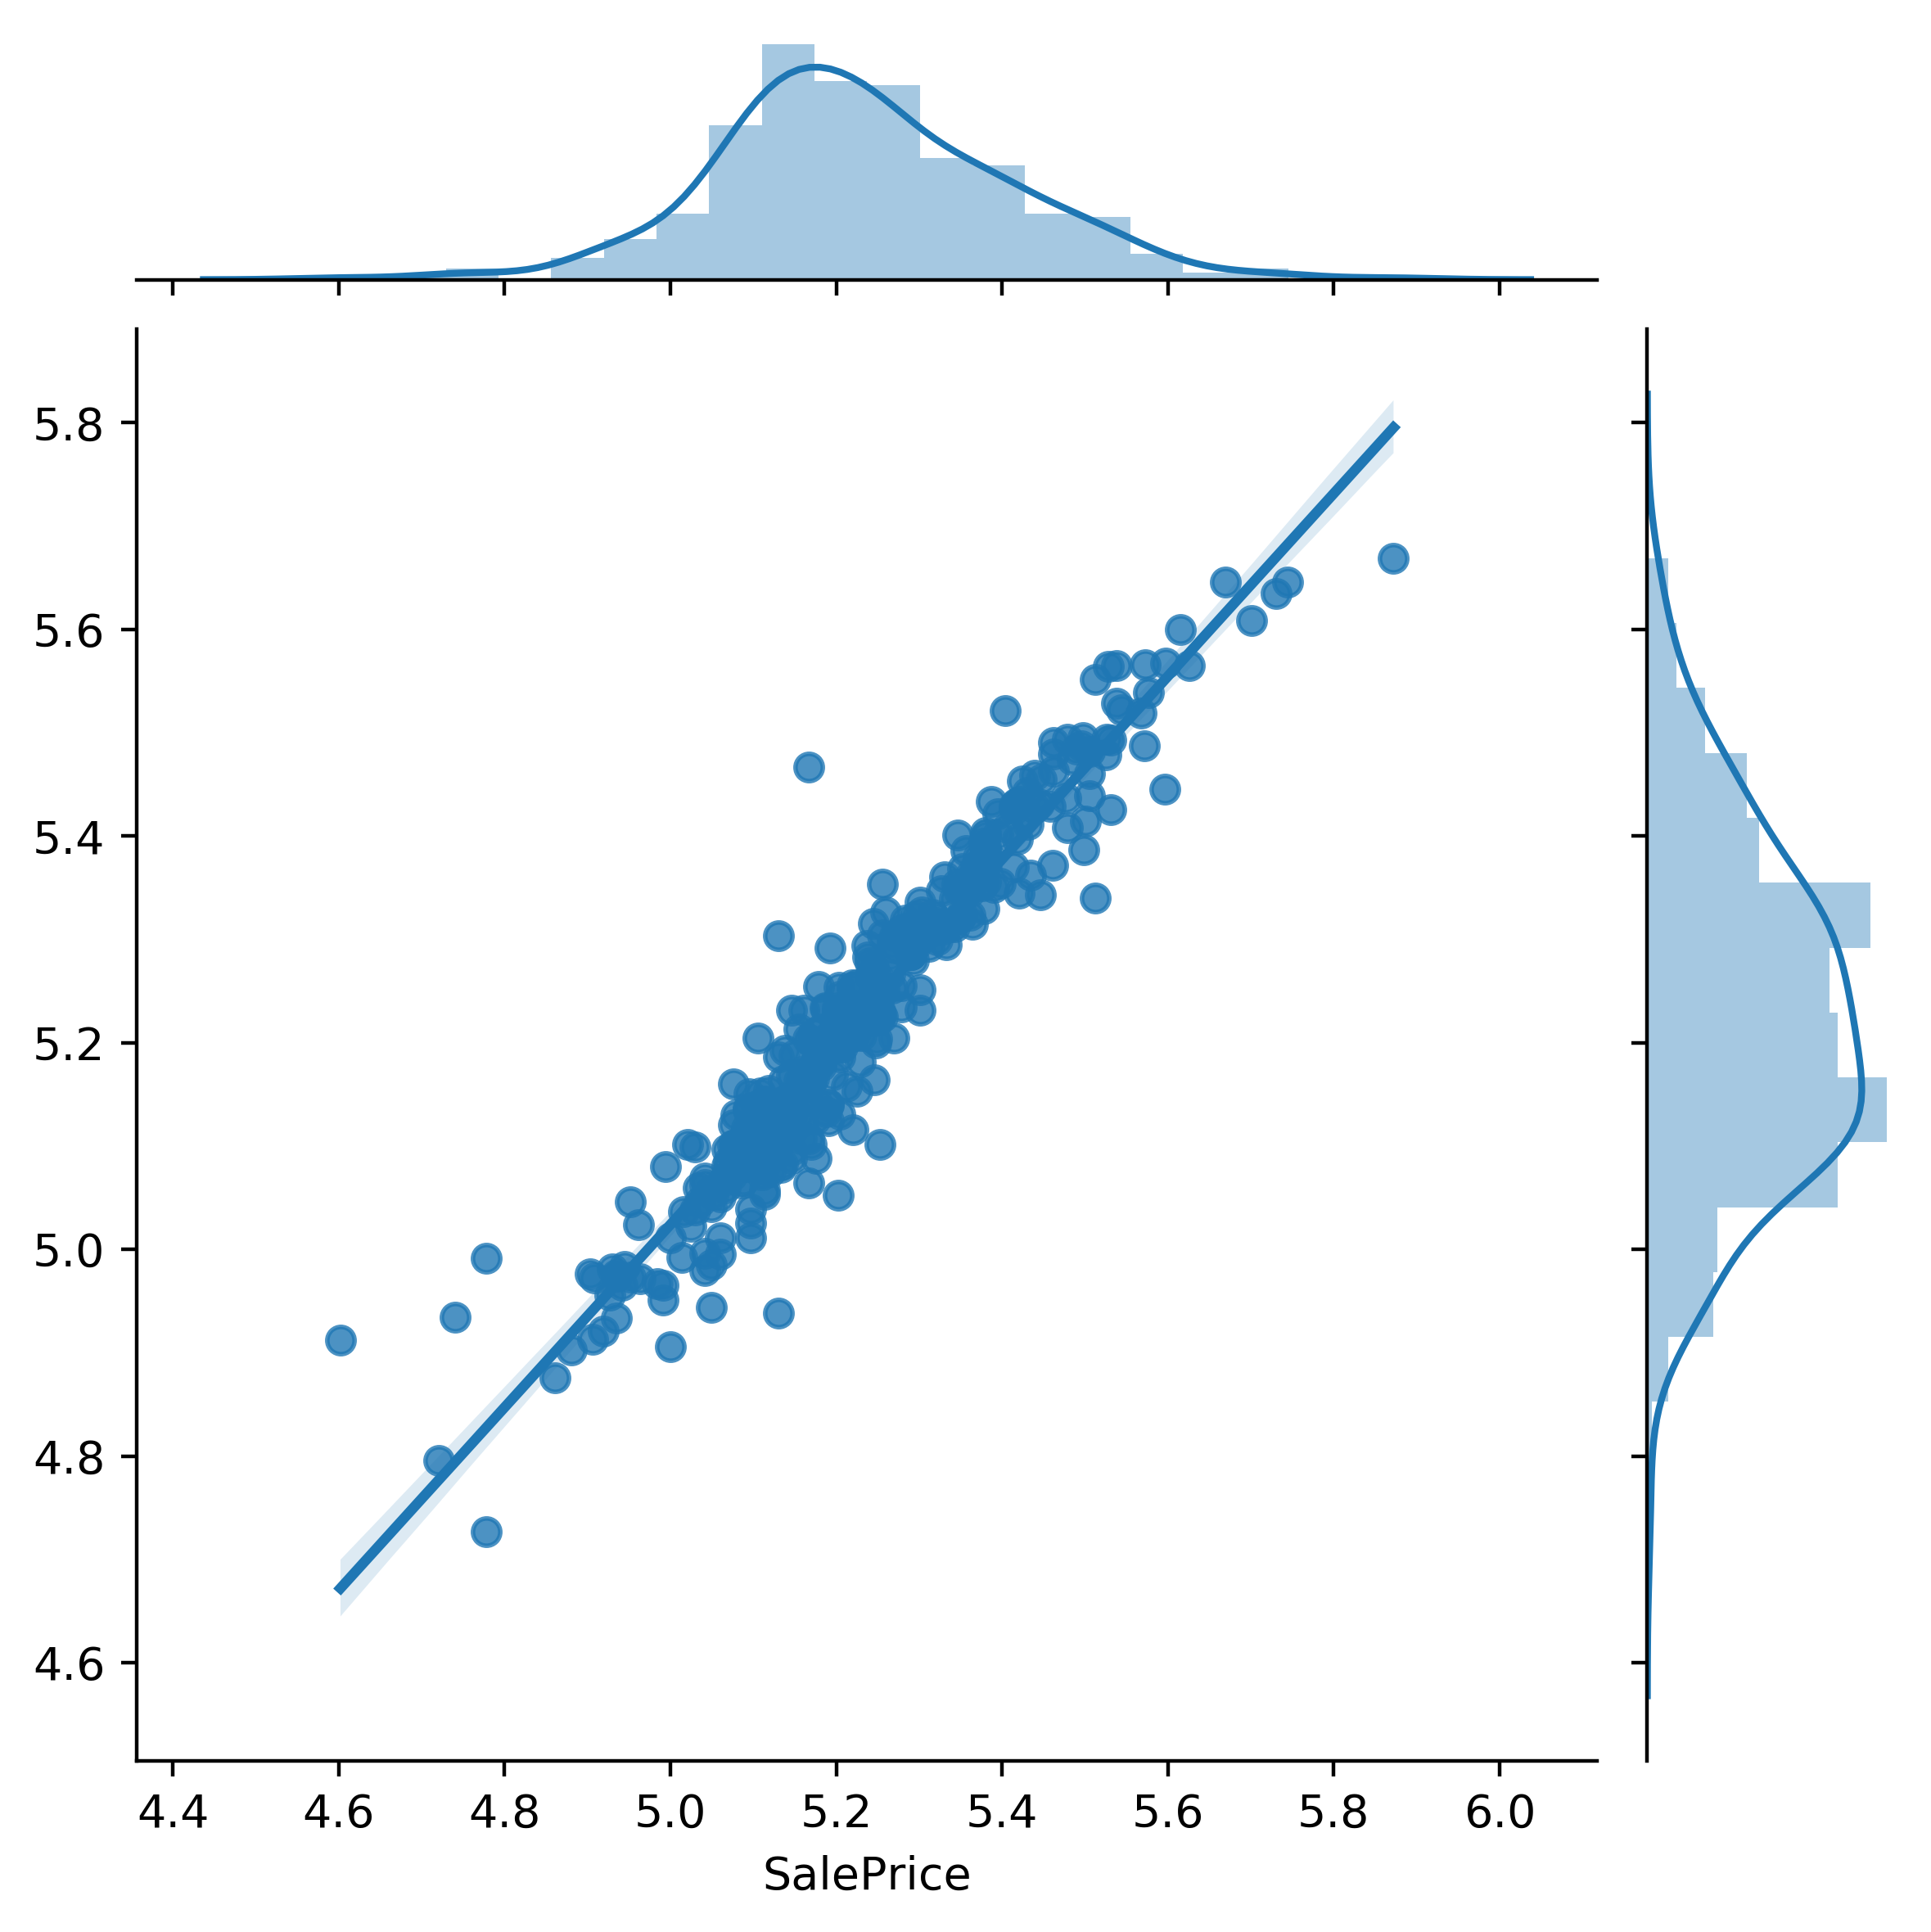

In [ ]:
# Ao plotar os 60 valores com maiores erros é possivel ver que ainda há forte correlação positiva com poucos outliers.
# Já temos um modelo aceitável e que pode ser turbinado com ajustes dos parametros

sb.jointplot(data = val_extr_ls, x = y_test, y = pred_ls, kind = 'reg')

In [ ]:
# Erro médio qudrado para o modelo LASSO
rmse(model_ls)

array([0.06334532, 0.06901267, 0.04954609, 0.06305903, 0.04843965])

In [ ]:
# Erro médio do modelo LASSO
print(rmse(model_ls).mean())

0.05868055160509082


In [ ]:
lasso_coef = pd.Series(model_ls.coef_, index = X_train.columns)

In [ ]:
ls_melhor_coef = pd.concat([lasso_coef.sort_values(ascending = True).head(5), lasso_coef.sort_values(ascending = False).head(20)])

Text(0.5, 1.0, 'Representatitvidade das Melhores Variáveis')

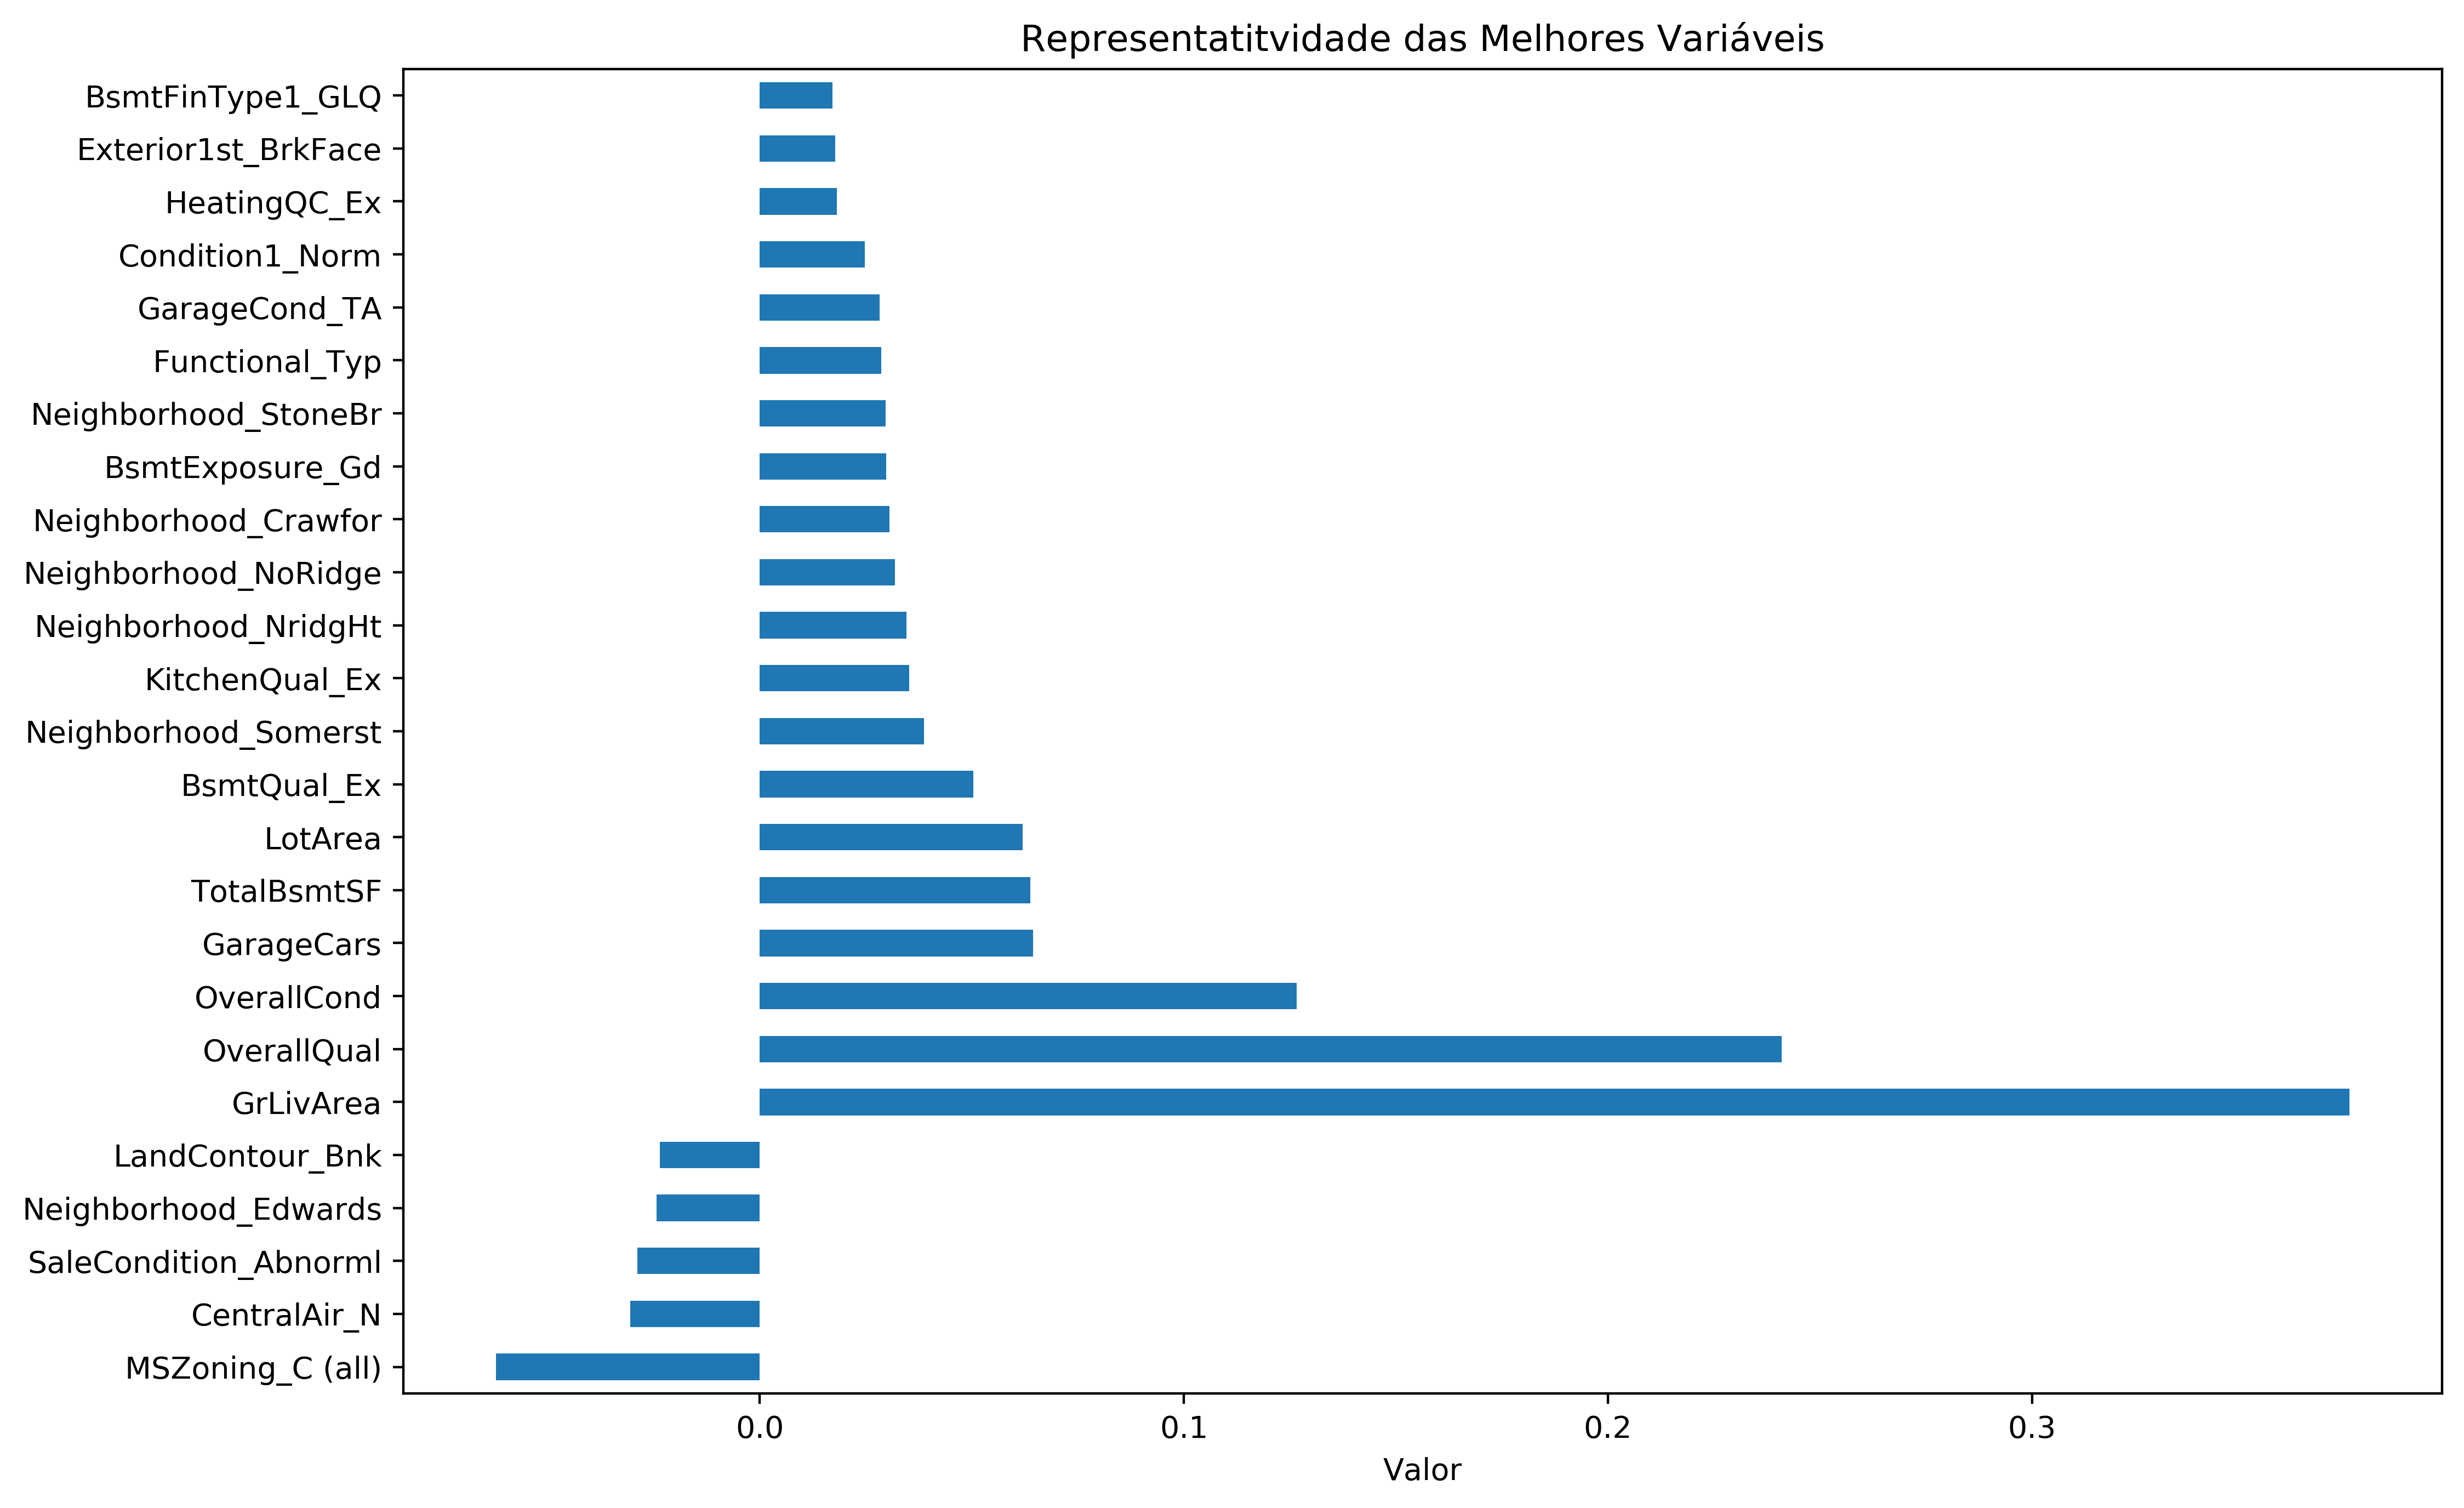

In [ ]:
plt.figure(figsize=(12,8))
ls_melhor_coef.plot(kind = 'barh')
plt.xlabel('Valor')
plt.title('Representatitvidade das Melhores Variáveis')

# MACHINE LEARNING: SVM

SVM ou Support Vector Machine: Esse algoritmo, após análise, reconhe os padrões. É um algoritmo não probabilístico. 
Ele faz o tratamento de outliers.Não é aconselhado para dataset muito grandes. Os suportes são os separadores dos grupos.    

In [ ]:
# subconjunto com variáveis independentes
X = train.drop(['SalePrice'], axis = 1)

# subconjunto com a variável dependente
y = train['SalePrice']

In [ ]:
# Função para testar tamanho da amostra e n_component do PCA no algoritmo de Regressão Linear

rs_svm = []
r2s_svm = []
scoreev_svm = []


for j in range(100, 500, 10):
    # separar treinos e testes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = j)

    # Normalizar datasets
    # Só normalizamos a variável dependente
    #sc = StandardScaler()
    #X_train = sc.fit_transform(X_train)
    #X_test = sc.transform(X_test)

    svm = LinearSVR()

    # Treinar o modelo
    model_svm = svm.fit(X_train, y_train)

    # Criar o modelo de predição
    pred_svm = svm.predict(X_test)

    # Avaliar o modelo com r2_score
    r2_svm = r2_score(y_true = y_test, y_pred = pred_svm)

    # Avaliar o modelo com explained_variance_score
    score_svm = evs(y_true = y_test, y_pred = pred_svm)

    rs_svm.append(soma_j)
    r2s_svm.append(r2_svm)
    scoreev_svm.append(score_svm)

In [ ]:
scores_svm = pd.DataFrame(columns = ['random_state', 'r2_score', 'evs'], data = (list(zip(rs_svm, r2s_svm, scoreev_svm))))

In [ ]:
scores_svm.head()

random_state  r2_score       evs
0           590  0.842831  0.851241
1           590  0.832211  0.857372
2           590  0.849542  0.875652
3           590  0.872104  0.875628
4           590  0.798553  0.838705

In [ ]:
# Resumo dos escores
scores_svm.max()

random_state    590.000000
r2_score          0.909431
evs               0.912831
dtype: float64

In [ ]:
# Converte valores normalizados (log10) para valores originais e depois os converte em Series do Pandas
novos_valores = [10**i for i in y_test]
n_values_svm = pd.Series(novos_valores)

valores_previstos = [10**i for i in pred_svm]
val_pred_svm = pd.Series(valores_previstos)

In [ ]:
# Avaliação do modelo em relação aos dados novos
dif = n_values_svm - val_pred_svm
avalia_svm = pd.DataFrame(columns = ['Dados_Novos', 'Dados_Previstos', 'Erro'], data = (list(zip(n_values_svm, val_pred_svm, dif))))
print(avalia_svm.head())
print('')
print('O erro médio entre os dados novos e os dados previsto é de $', avalia_svm['Erro'].mean())

   Dados_Novos  Dados_Previstos          Erro
0     157000.0    182595.036232 -25595.036232
1     165500.0    177412.044018 -11912.044018
2     122500.0    127429.781093  -4929.781093
3     290000.0    328855.200336 -38855.200336
4      83000.0     82451.313830    548.686170

O erro médio entre os dados novos e os dados previsto é de $ -8578.413349707509


In [ ]:
# O erro médio  e o desvio padrão foram reduzidos para, talvez, valores aceitáveis, 
# mas precisamos continuar aplicando outros modelos para fazer comparações.
avalia_svm.describe()

Dados_Novos  Dados_Previstos           Erro
count     365.000000       365.000000     365.000000
mean   184551.978082    193130.391432   -8578.413350
std     83293.093240     85751.113582   25755.074431
min     40000.000000     52196.531521 -163858.502996
25%    130000.000000    136491.318976  -18810.619740
50%    162000.000000    171314.291986   -6645.630234
75%    220000.000000    225805.009995    2670.948875
max    745000.000000    586954.581209  158045.418791

In [ ]:
# Valores extremamente divergentes
val_extr_svm = avalia_svm.sort_values(ascending = False, by = 'Erro').head(60)

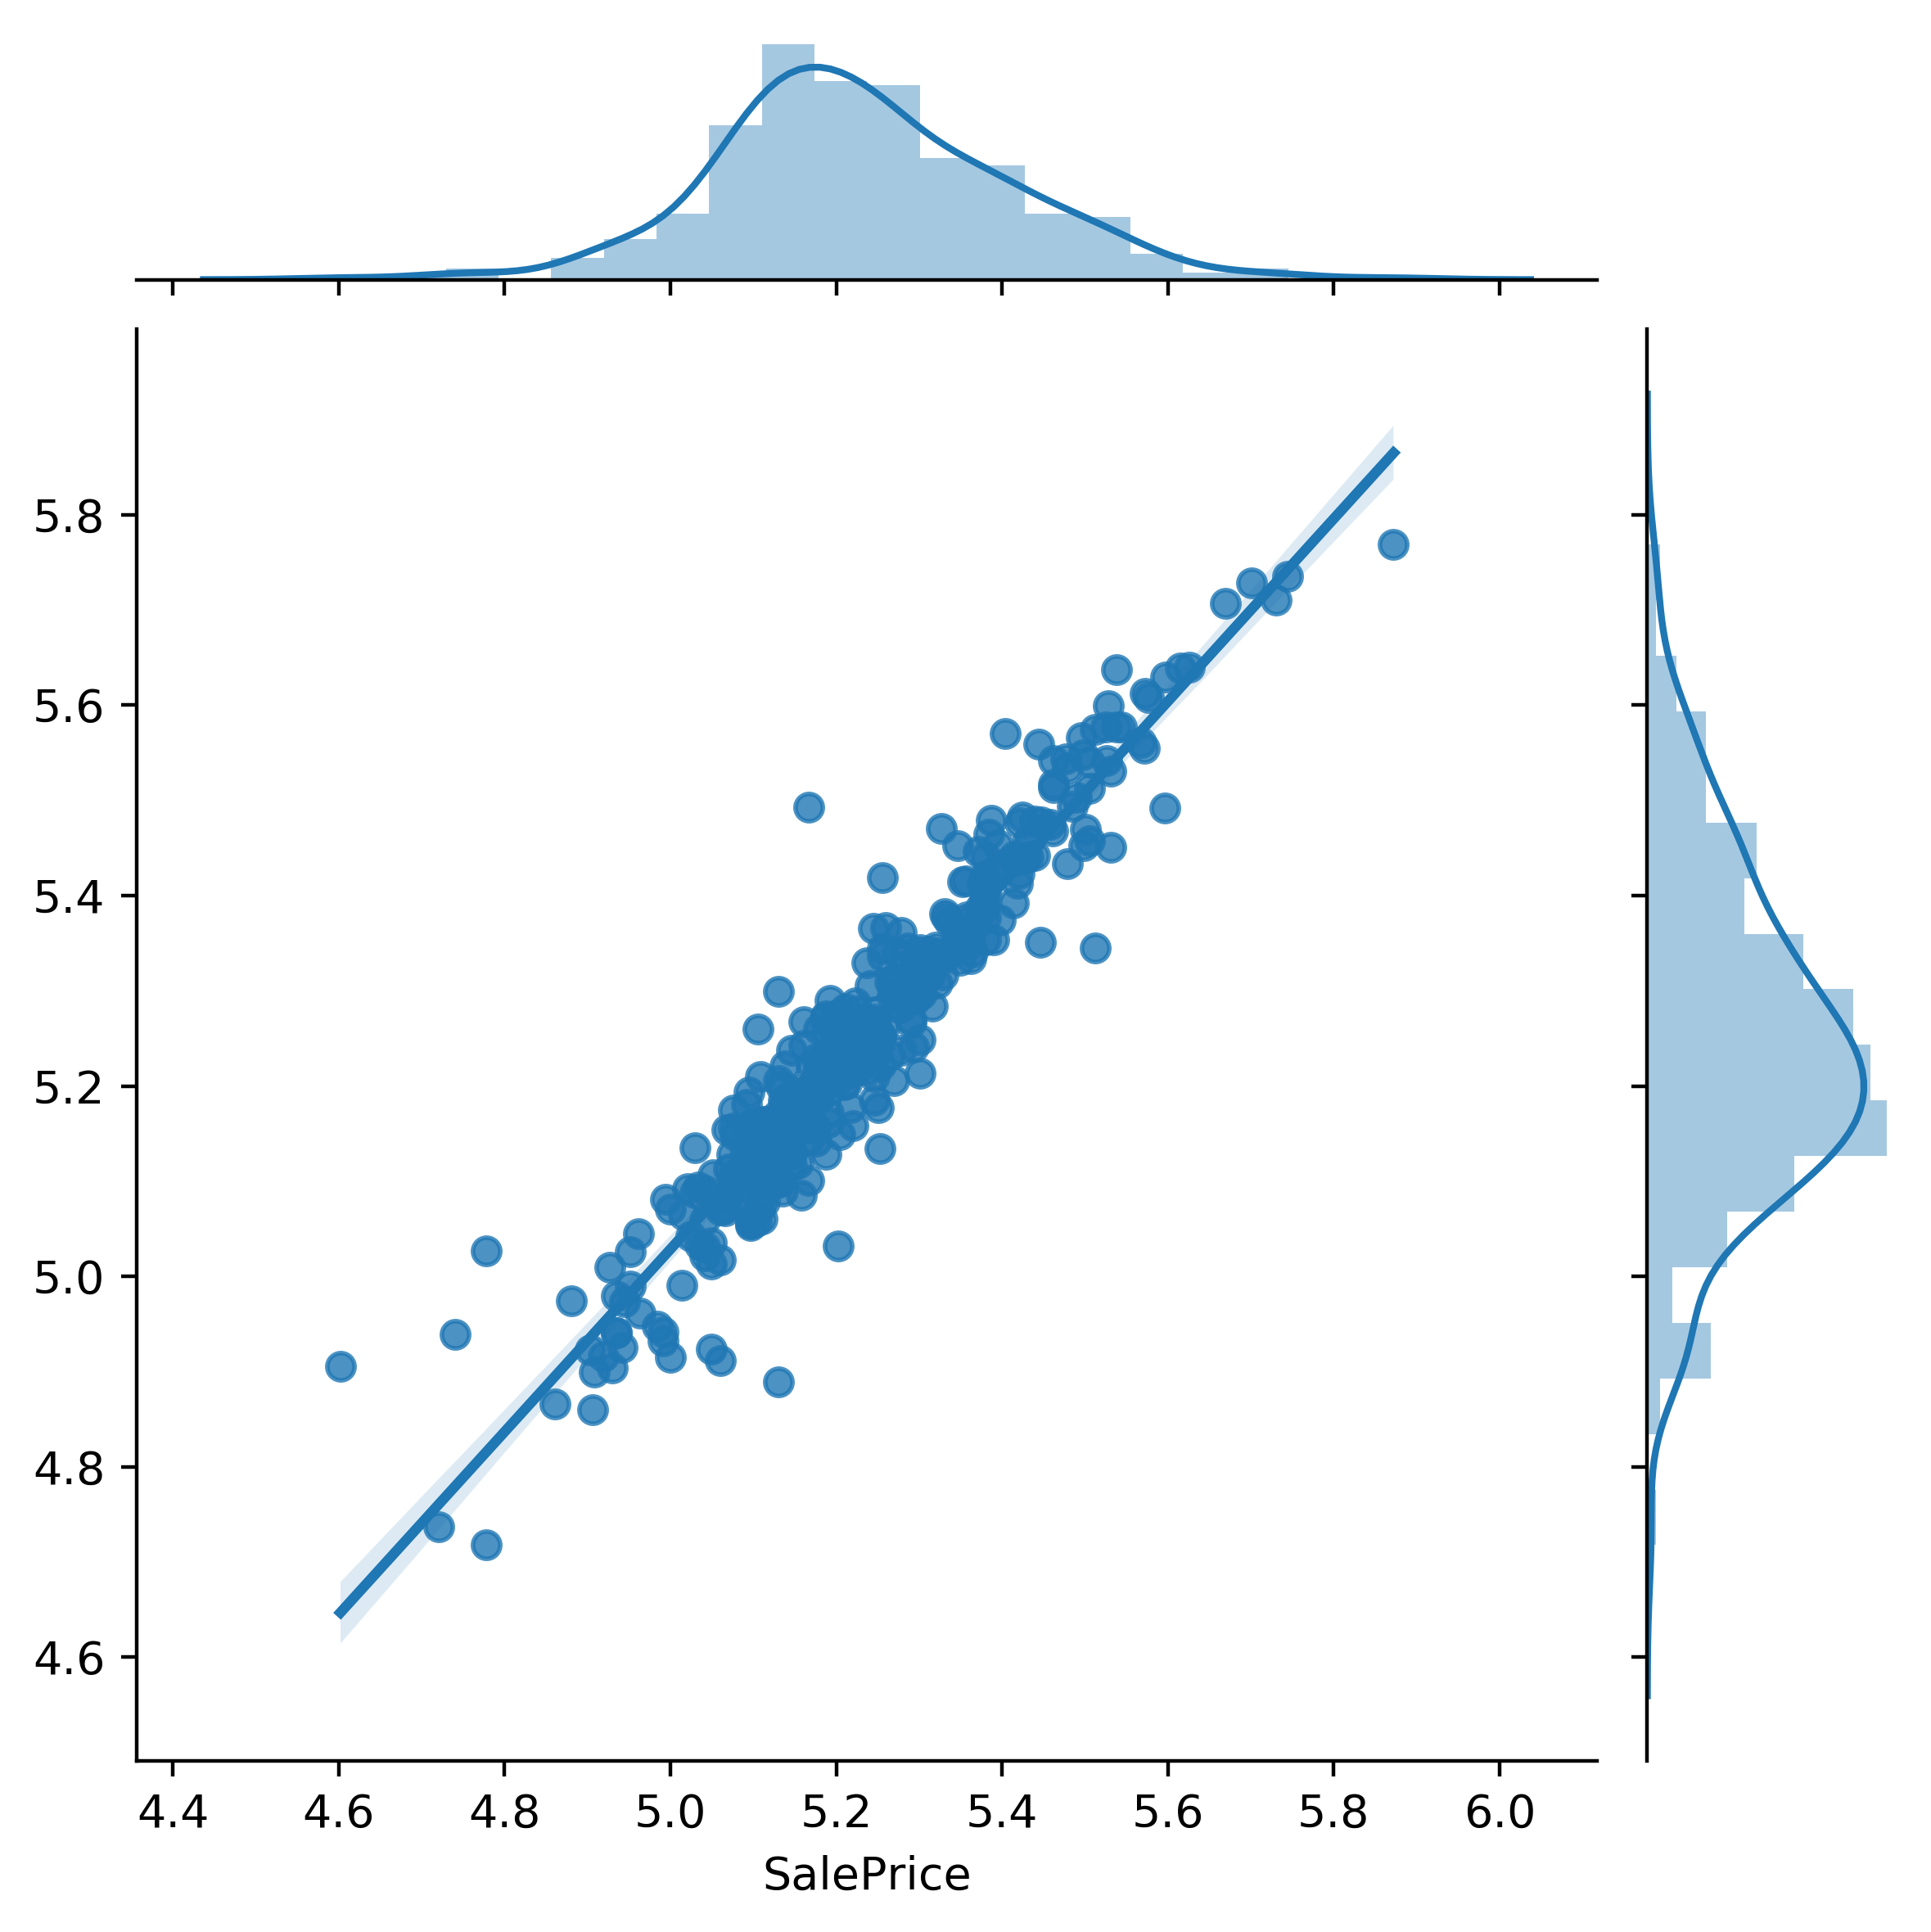

In [ ]:
# Ao plotar os 60 valores com maiores erros é possivel ver que ainda há forte correlação positiva com poucos outliers.
# Já temos um modelo aceitável e que pode ser turbinado com ajustes dos parametros

sb.jointplot(data = val_extr_svm, x = y_test, y = pred_svm, kind = 'reg')

In [ ]:
svm_coef = pd.Series(model_svm.coef_, index = X.columns)

In [ ]:
svm_melhor_coef = pd.concat([svm_coef.sort_values(ascending = True).head(10), svm_coef.sort_values(ascending = False).head(10)])

Text(0.5, 1.0, 'Melhores Variáveis')

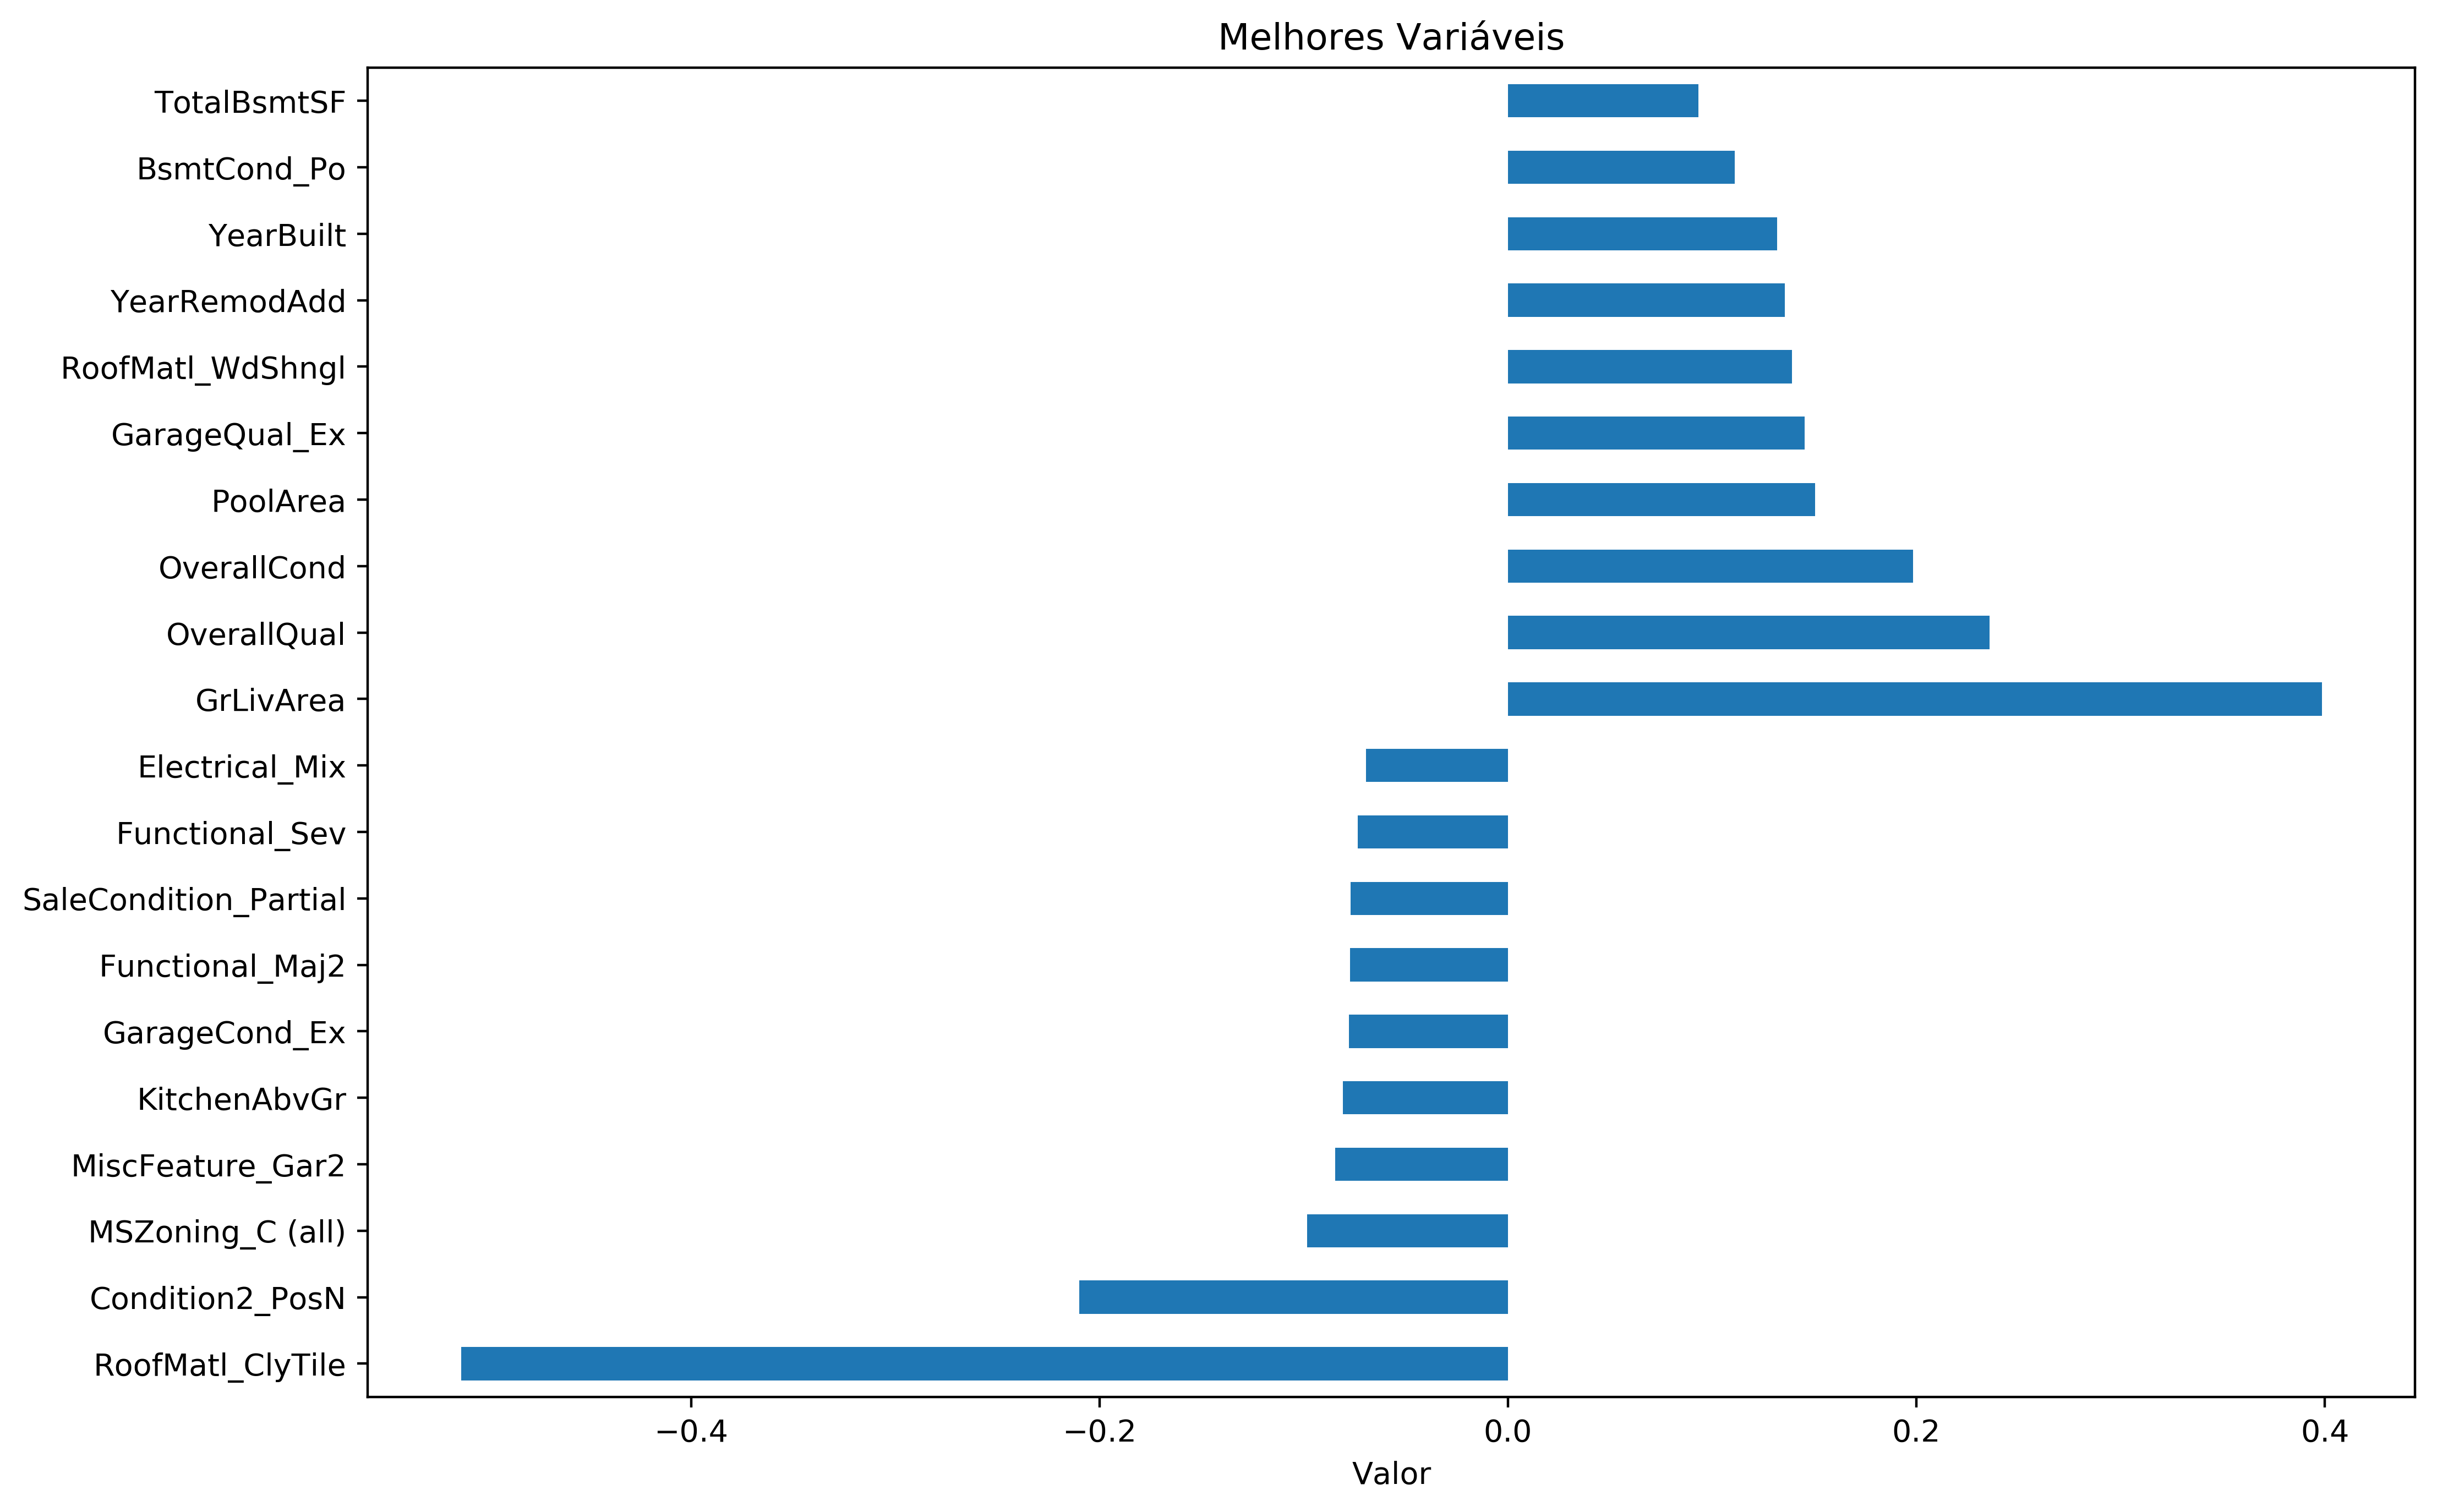

In [ ]:
plt.figure(figsize=(12,8))
svm_melhor_coef.plot(kind = 'barh')
plt.xlabel('Valor')
plt.title('Melhores Variáveis')

# EXTRA

In [ ]:
# Seleção das melhores variáveis para Linear Regression com GridSearchCV e RandomForestRegression

# O grande trunfo do GridSearchCV é a sua capacidade de fazer um algoritmo rodar várias combinações hiperparametros
# Aí, depende da capacidade da sua máquina para poder roda um grande quantitativo de combinações para dataset muito grandes
from sklearn.model_selection import GridSearchCV, cross_val_score

# Os algoritmos do tipo Random Forest são extremamente eficientes e podem ser usados para encontrar as melhores features.
from sklearn.ensemble import RandomForestRegressor


# MACHINE LEARNING: RANDOM FOREST REGRESSION

In [ ]:
# Função para testar tamanho da amostra e n_component do PCA no algoritmo de Regressão Linear

rs_rfr = []
r2s_rfr = []
scoreev_rfr = []


for j in range(400, 500, 10):
    # separar treinos e testes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = j)

    # Uso com hiperparrametros padrões
    rfr = RandomForestRegressor()

    # Treinar o modelo
    model_rfr = rfr.fit(X_train, y_train)

    # Criar o modelo de predição
    pred_rfr = rfr.predict(X_test)

    # Avaliar o modelo com r2_score
    r2_rfr = r2_score(y_true = y_test, y_pred = pred_rfr)

    # Avaliar o modelo com explained_variance_score
    score_rfr = evs(y_true = y_test, y_pred = pred_rfr)    

    rs_rfr.append(soma_j)
    r2s_rfr.append(r2_rfr)
    scoreev_rfr.append(score_rfr)

In [ ]:
# Calcular a validação cruzada
cv_rfr = -cross_val_score(model_rfr, 
                          X_train, 
                          y_train, 
                          scoring = 'neg_mean_squared_error', 
                          cv = 5)
rmse_rfr = np.sqrt(cv_rfr)

In [ ]:
# Erros encontrados pelo estimador
print('Erros encontrados na Validação Cruzada', rmse_rfr)
print('Média dos erros encontrados no Validação Cruzada', rmse_rfr.mean())

Erros encontrados na Validação Cruzada [0.07451094 0.06372135 0.06590605 0.06493862 0.06073571]
Média dos erros encontrados no Validação Cruzada 0.06596253574957145


In [ ]:
scores_rfr = pd.DataFrame(columns = ['random_state', 'r2_score', 'evs'], data = (list(zip(rs_rfr, r2s_rfr, scoreev_rfr))))

In [ ]:
scores_rfr.head()

random_state  r2_score       evs
0           590  0.872627  0.873156
1           590  0.853818  0.853846
2           590  0.870427  0.871004
3           590  0.872907  0.872943
4           590  0.859974  0.859978

In [ ]:
# Resumo dos escores
scores_rfr.max()

random_state    590.000000
r2_score          0.880465
evs               0.880680
dtype: float64

In [ ]:
# Converte valores normalizados (log10) para valores originais e depois os converte em Series do Pandas
novos_valores = [10**i for i in y_test]
n_values_rfr = pd.Series(novos_valores)

valores_previstos = [10**i for i in pred_rfr]
val_pred_rfr = pd.Series(valores_previstos)

In [ ]:
# Avaliação do modelo em relação aos dados novos
dif = n_values_rfr - val_pred_rfr
avalia_rfr = pd.DataFrame(columns = ['Dados_Novos', 'Dados_Previstos', 'Erro'], data = (list(zip(n_values_rfr, val_pred_rfr, dif))))
print(avalia.head())
print('')
print('O erro médio entre os dados novos e os dados previsto é de $', avalia_rfr['Erro'].mean())

   Dados_Novos  Dados_Previstos          Erro
0     120500.0    125830.979876  -5330.979876
1     196500.0    197844.685661  -1344.685661
2     176000.0    171067.760331   4932.239669
3     213500.0    210203.716223   3296.283777
4     171000.0    140338.596651  30661.403349

O erro médio entre os dados novos e os dados previsto é de $ 4337.170742662971


In [ ]:
# O erro médio  e o desvio padrão foram reduzidos para, talvez, valores aceitáveis, 
# mas precisamos continuar aplicando outros modelos para fazer comparações.
avalia_rfr.describe()

Dados_Novos  Dados_Previstos           Erro
count     365.000000       365.000000     365.000000
mean   184551.978082    180214.807340    4337.170743
std     83293.093240     68732.906533   31517.056211
min     40000.000000     63604.127838 -145371.075587
25%    130000.000000    133219.477876   -8558.488323
50%    162000.000000    161537.801509     589.398515
75%    220000.000000    216755.580509   13291.434450
max    745000.000000    418856.334215  344409.103012

In [ ]:
# Valores extremamente divergentes
val_extr_rfr = avalia_rfr.sort_values(ascending = False, by = 'Erro').head(60)

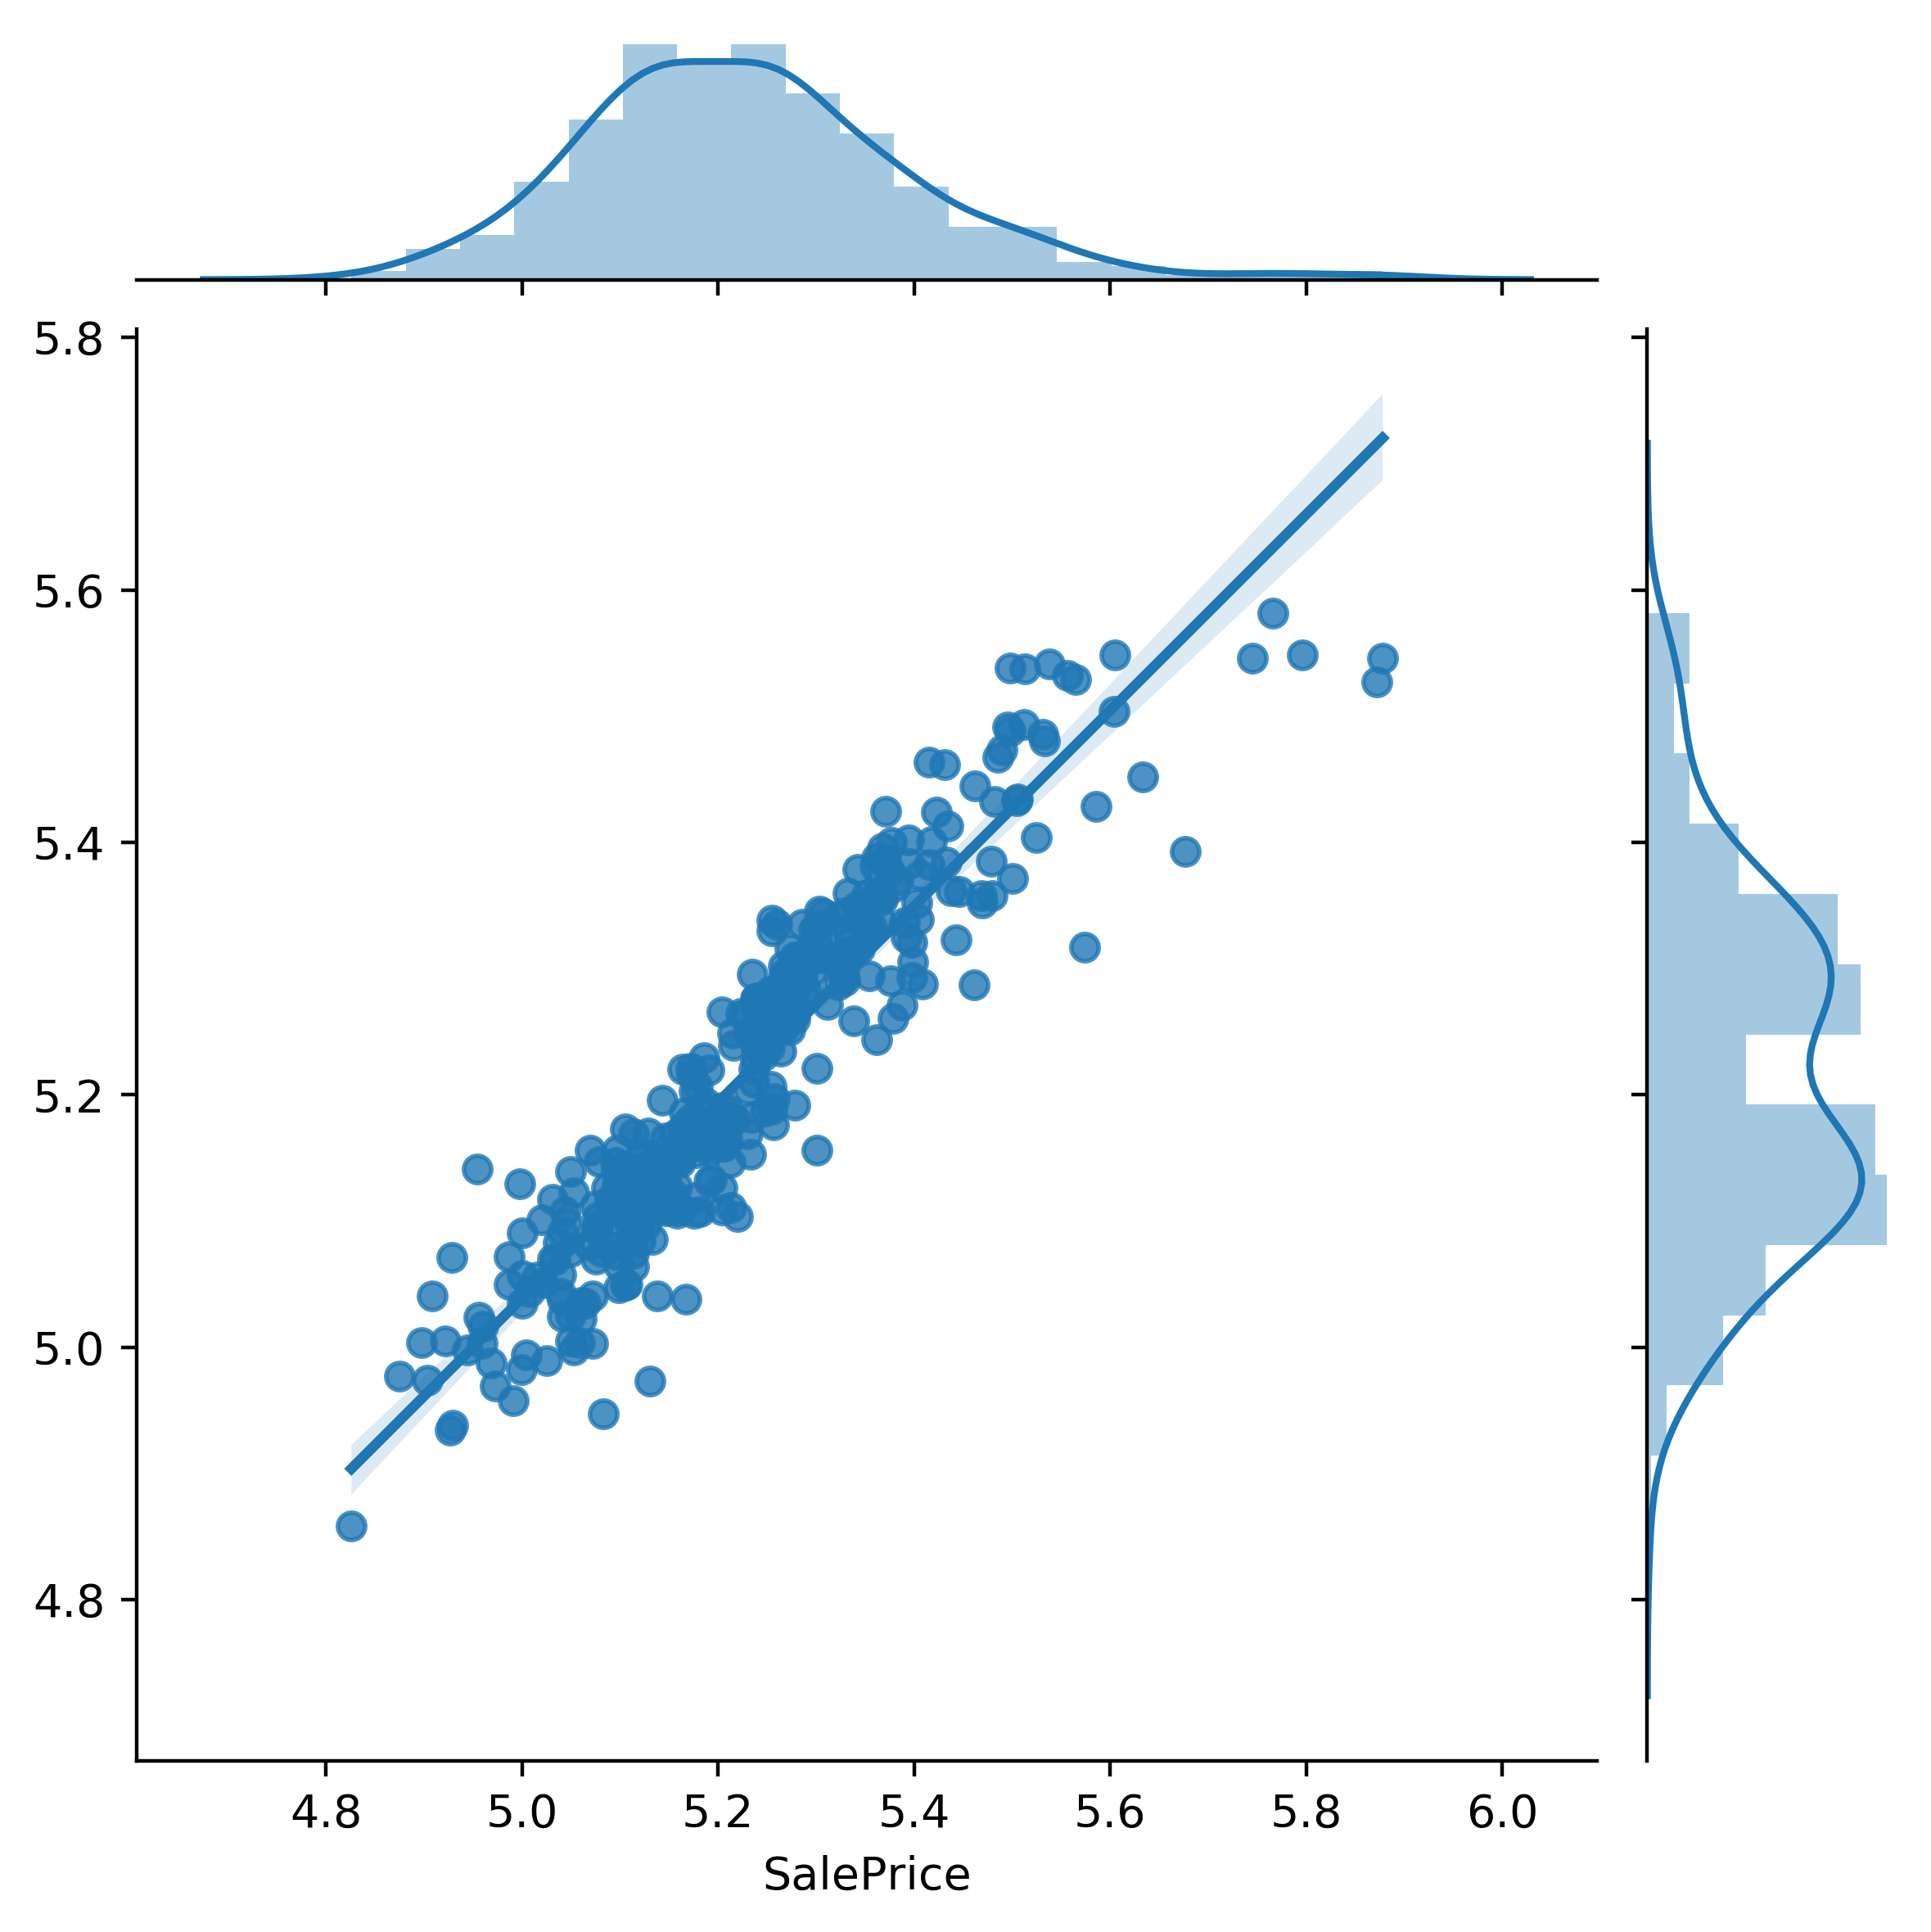

In [ ]:
# Ao plotar os 60 valores com maiores erros é possivel ver que ainda há forte correlação positiva com poucos outliers.
# Já temos um modelo aceitável e que pode ser turbinado com ajustes dos parametros

sb.jointplot(data = val_extr_rfr, x = y_test, y = pred_rfr, kind = 'reg')

In [ ]:
rfr_coef = pd.Series(model_rfr.feature_importances_, index = X.columns)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [ ]:
rfr_melhor_coef = pd.concat([rfr_coef.sort_values(ascending = True).head(0), rfr_coef.sort_values(ascending = False).head(30)])

Text(0.5, 1.0, 'As 30 variáveis mais importantes - Feature Importance')

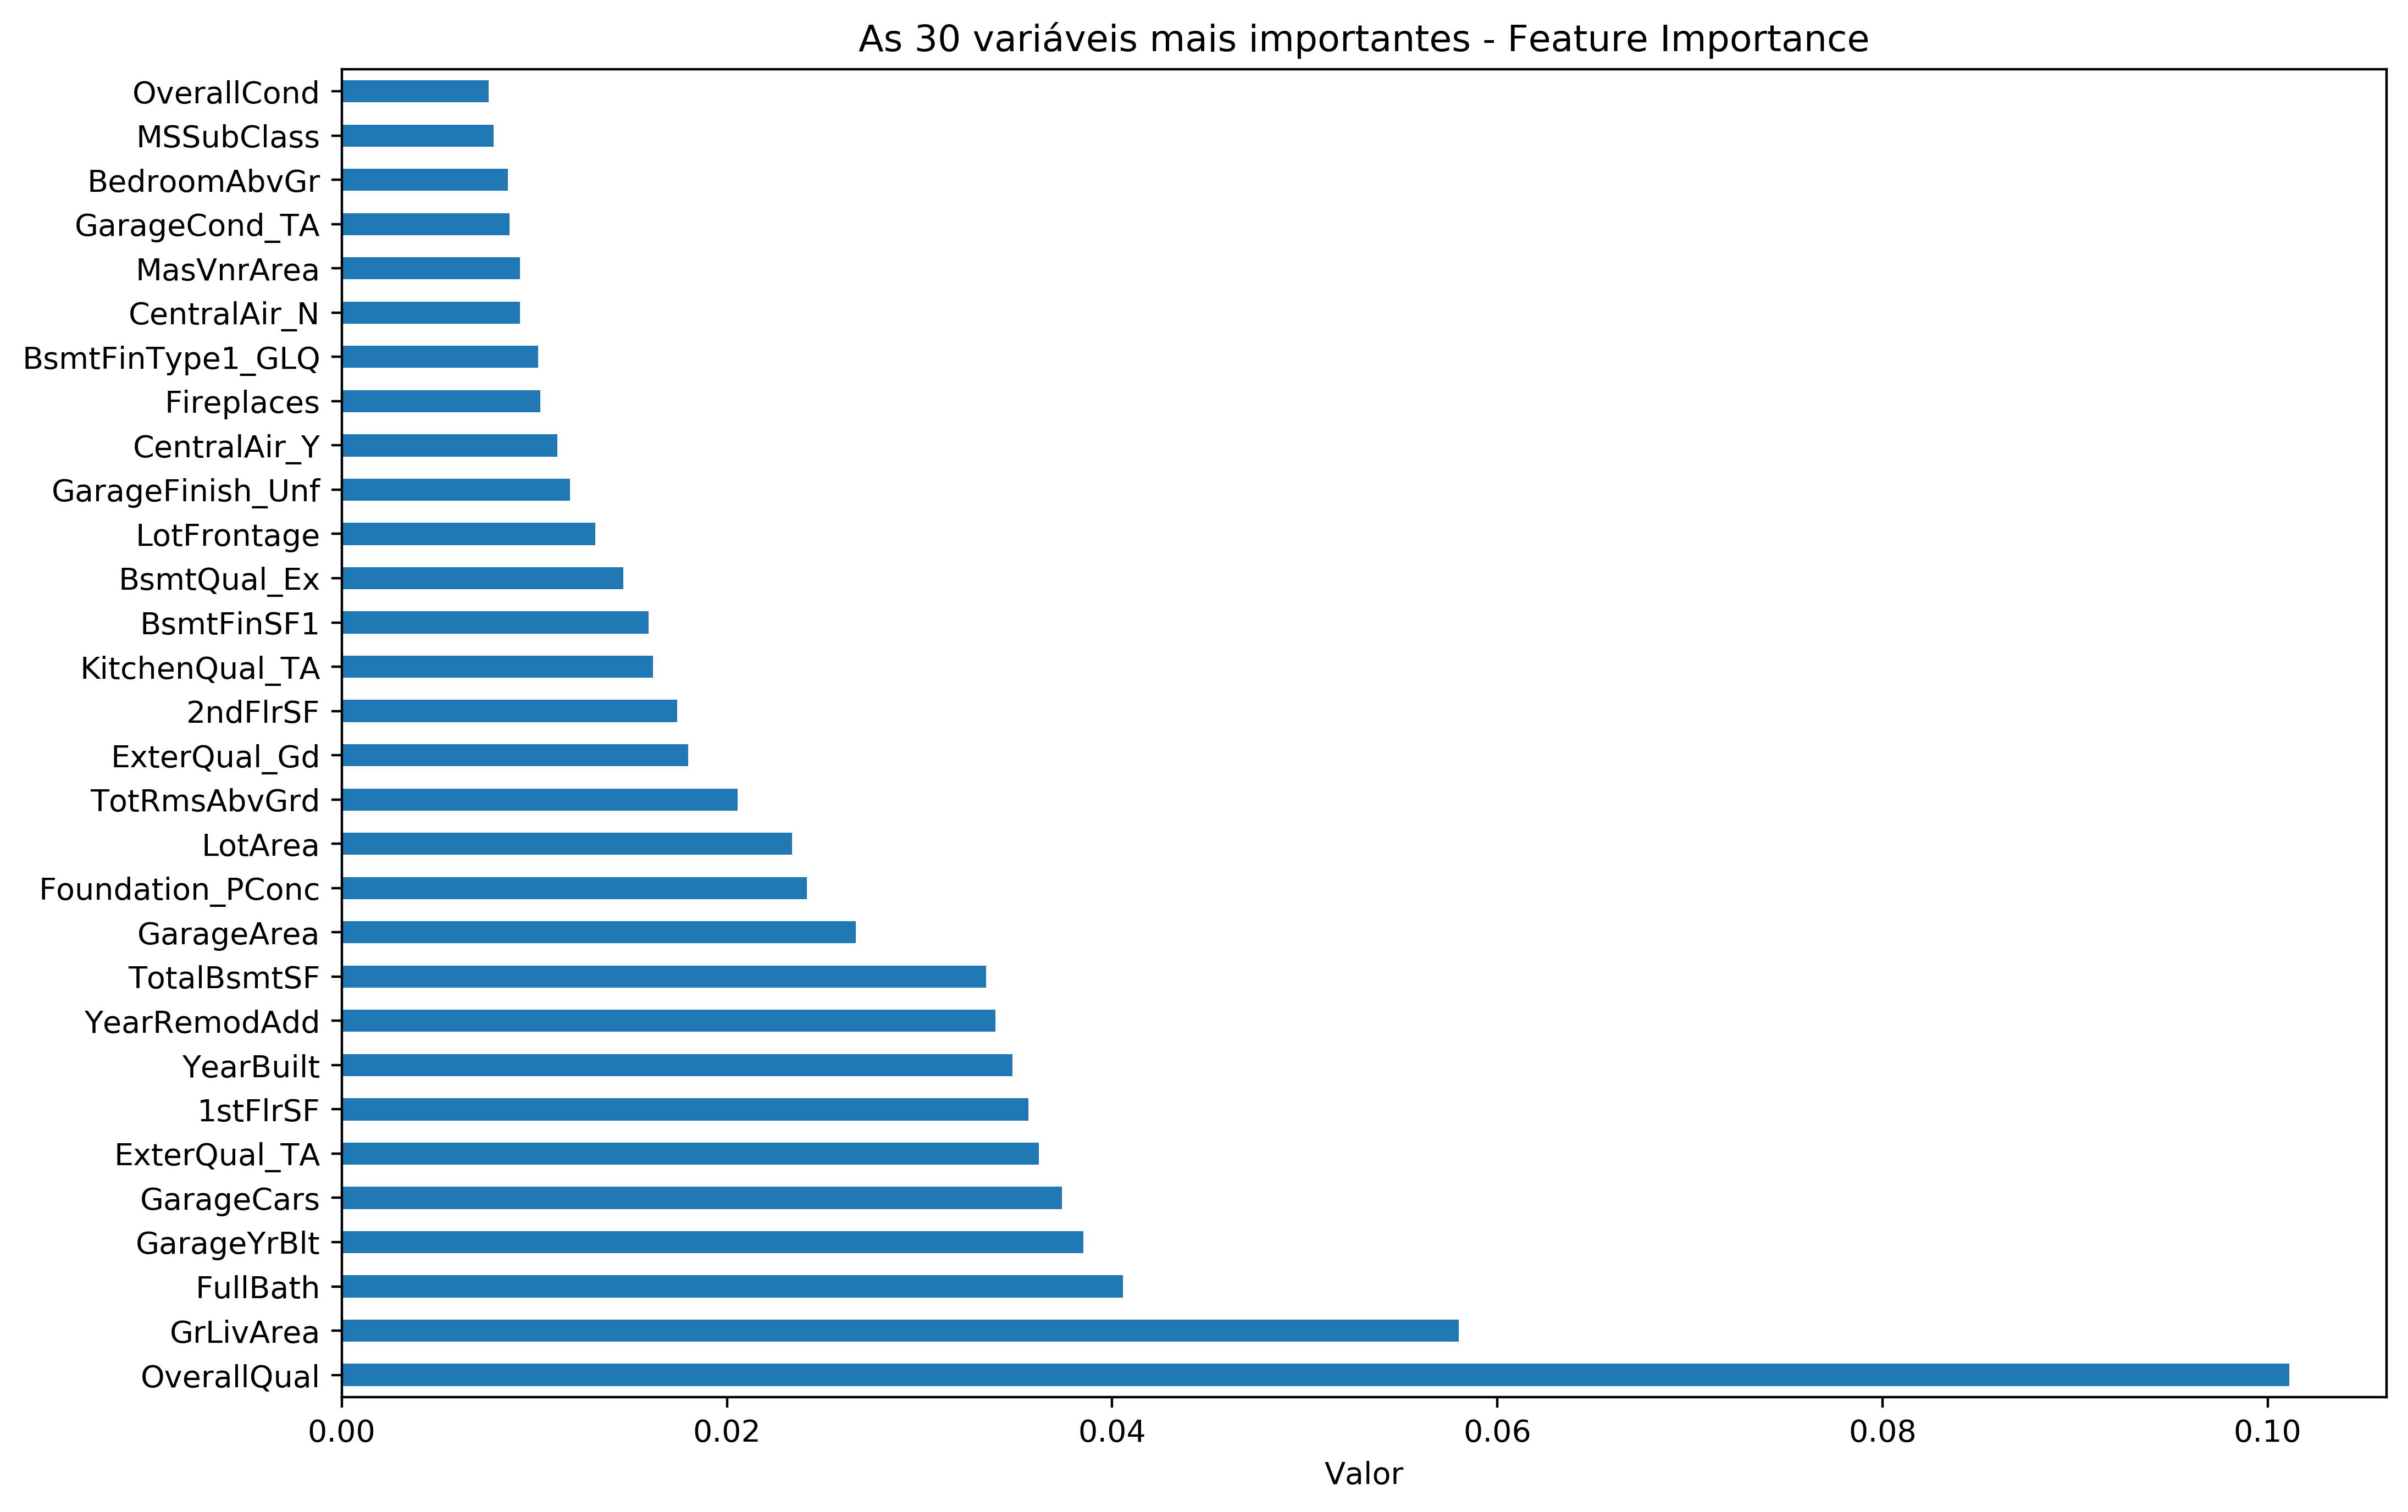

In [ ]:
plt.figure(figsize=(12,8))
rfr_melhor_coef.plot(kind = 'barh')
plt.xlabel('Valor')
plt.title('As 30 variáveis mais importantes - Feature Importance')

#### E agora nós possuímos as variáveis mais importantes que podemos aplicar em qualquer outro modelo!
### Escolhas as suas, pois esta é uma decisão do cientista de dados

## Não acabou - turbinando tudo!

Neste momento é muito importante que você leia (ou releia) sobre os parametros do Random Forest Regression na documentação do sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random#sklearn.ensemble.RandomForestRegressor

Parametros:
(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]

In [ ]:
# ApLicação do GridSearchCV para combinação de vários hiperparametros do RandomForestRegression
# Essa combinação levará algum tempo, mas rodará bem!


grid = [{'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140],
        'max_features': [2,4,6,8,10,12,14,16]}]

# Função para testar tamanho da amostra e n_component do PCA no algoritmo de Regressão Linear

rs_rfr = []
r2s_rfr = []
scoreev_rfr = []

# separar treinos e testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 590)

# Uso com gridsearchcv para variar combinações de hiperparametros do RandomForestRegression
rfr = RandomForestRegressor()
grid_rfr = GridSearchCV(rfr, 
                        grid, 
                        scoring = 'neg_mean_squared_error', 
                        cv = 5)

# Treinar o modelo
model_rfr = grid_rfr.fit(X_train, y_train)

# Criar o modelo de predição
pred_rfr = grid_rfr.predict(X_test)

# Avaliar o modelo com r2_score
r2_rfr = r2_score(y_true = y_test, y_pred = pred_rfr)

# Avaliar o modelo com explained_variance_score
score_rfr = evs(y_true = y_test, y_pred = pred_rfr)    


r2s_rfr.append(r2_rfr)
scoreev_rfr.append(score_rfr)

In [ ]:
# Apresentar os melhores parametros (max_features e n_estimators )
model_rfr.best_params_

{'max_features': 16, 'n_estimators': 120}

In [ ]:
# Calcular a validação cruzada
# O processamento é lento, mesmo na minha máquica com 16Gb de memória e GPU radeon 550 que processa 7GB/s
cv_rfr = -cross_val_score(model_rfr, 
                          X_train, 
                          y_train, 
                          scoring = 'neg_mean_squared_error', 
                          cv = 5)
rmse_rfr = np.sqrt(cv_rfr)

In [ ]:
# Erros encontrados pelo estimador
print('Erros encontrado na Validação Cruzada', rmse_rfr)
print('')
print('Média dos erros encontrado no Validação Cruzada', rmse_rfr.mean())

Erros encontrado na Validação Cruzada [0.06447572 0.06943533 0.06554226 0.06416978 0.07201729]

Média dos erros encontrado no Validação Cruzada 0.06712807648653134


In [ ]:
# Converte valores normalizados (log10) para valores originais e depois os converte em Series do Pandas
novos_valores = [10**i for i in y_test]
n_values_rfr_gr = pd.Series(novos_valores)

valores_previstos = [10**i for i in pred_rfr]
val_pred_rfr_gr = pd.Series(valores_previstos)

In [ ]:
# Avaliação do modelo em relação aos dados novos
dif = n_values_rfr_gr - val_pred_rfr_gr
avalia_rfr_gr = pd.DataFrame(columns = ['Dados_Novos', 'Dados_Previstos', 'Erro'], data = (list(zip(n_values_rfr_gr, val_pred_rfr_gr, dif))))
print(avalia.head())
print('')
print('O erro médio entre os dados novos e os dados previsto é de $', avalia_rfr_gr['Erro'].mean())

   Dados_Novos  Dados_Previstos          Erro
0     110000.0    109033.580029    966.419971
1     184000.0    192514.814903  -8514.814903
2     141000.0    139078.879506   1921.120494
3     187000.0    197551.230172 -10551.230172
4     163990.0    177316.997826 -13326.997826

O erro médio entre os dados novos e os dados previsto é de $ 10224.27454755998


In [ ]:
# O erro médio  e o desvio padrão foram reduzidos para, talvez, valores aceitáveis, 
# mas precisamos continuar aplicando outros modelos para fazer comparações.
avalia_rfr_gr.describe()

Dados_Novos  Dados_Previstos           Erro
count     365.000000       365.000000     365.000000
mean   183852.849315    173628.574768   10224.274548
std     86574.031700     58332.492936   44754.652874
min     67000.000000     72194.997480  -48400.833964
25%    130500.000000    129214.747074   -8924.309525
50%    165000.000000    157401.626595    2286.702300
75%    211000.000000    204494.211519   13009.457241
max    755000.000000    381609.609385  408625.390951

In [ ]:
# Valores extremamente divergentes
val_extr_rfr = avalia_rfr_gr.sort_values(ascending = False, by = 'Erro').head(60)

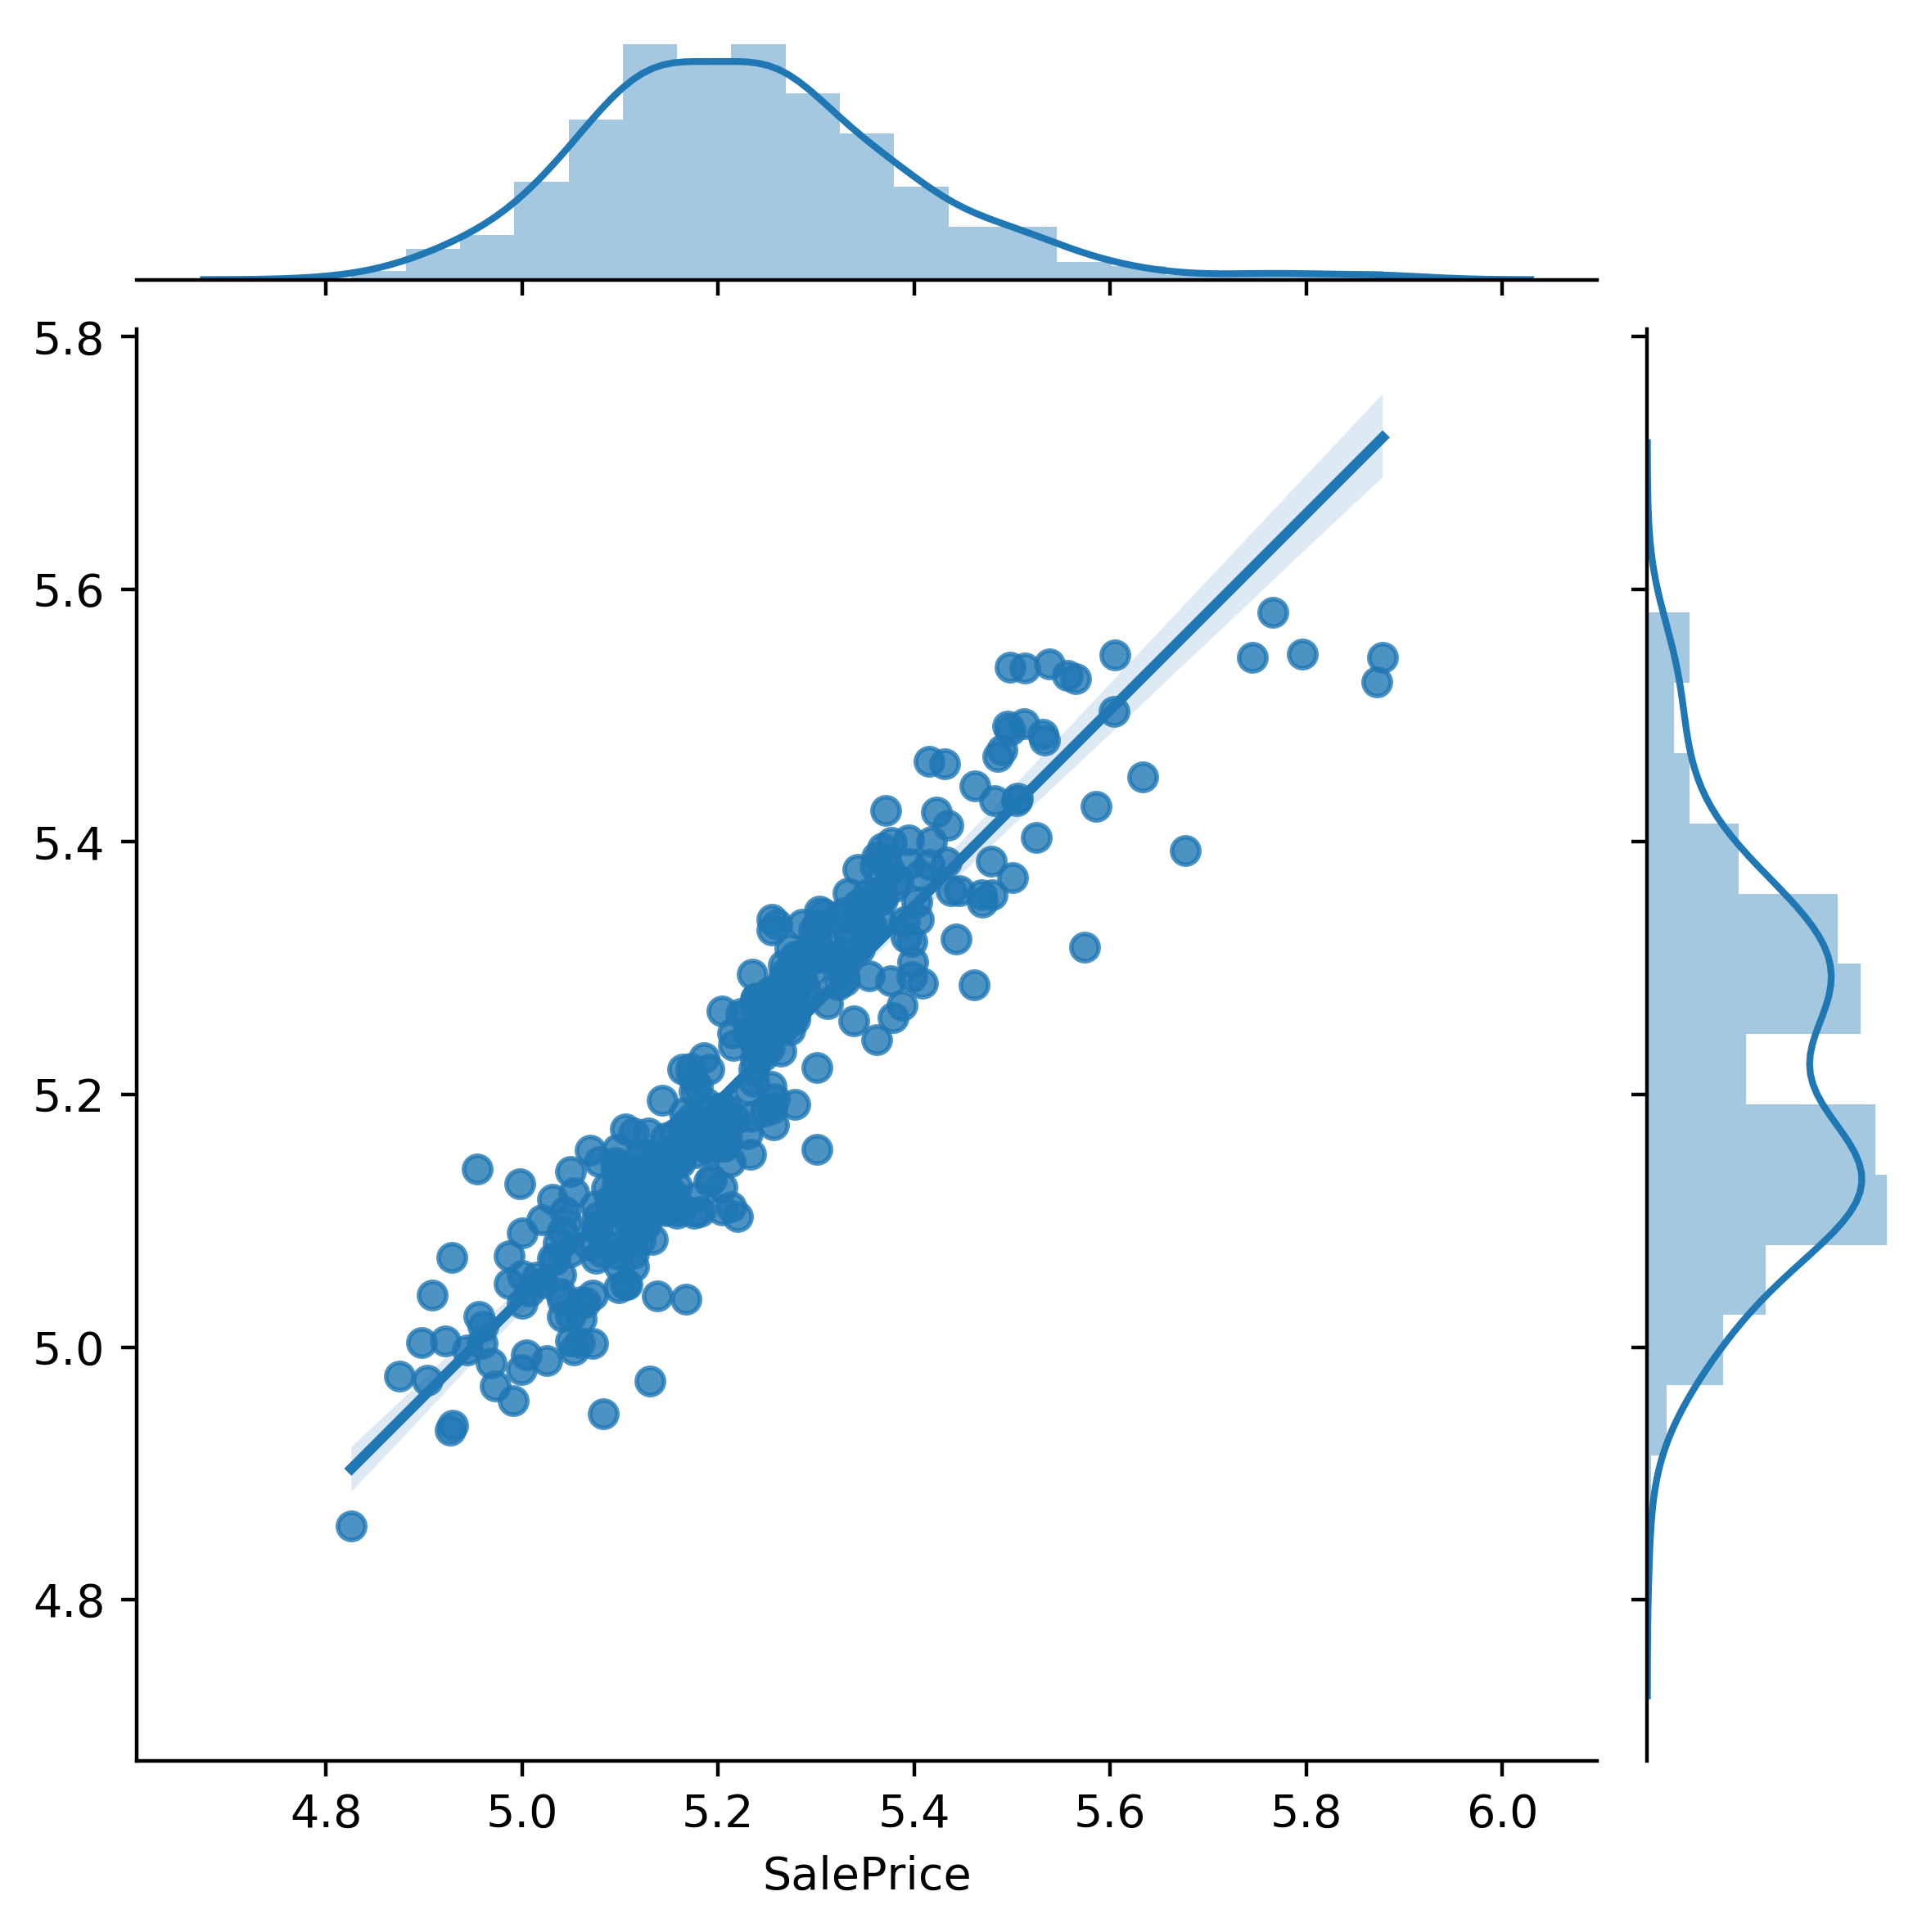

In [ ]:
# Ao plotar os 60 valores com maiores erros é possivel ver que ainda há forte correlação positiva com poucos outliers.
# Já temos um modelo aceitável e que pode ser turbinado com ajustes dos parametros

sb.jointplot(data = val_extr_rfr, x = y_test, y = pred_rfr, kind = 'reg')

In [ ]:
# Avaliação dos scores de acurácia
scores_rfr = pd.DataFrame(columns = ['r2_score', 'evs'], data = (list(zip(r2s_rfr, scoreev_rfr))))

In [ ]:
# Melhor score
scores_rfr.max()

r2_score    0.850352
evs         0.856202
dtype: float64

<Figure size 4800x3200 with 0 Axes>

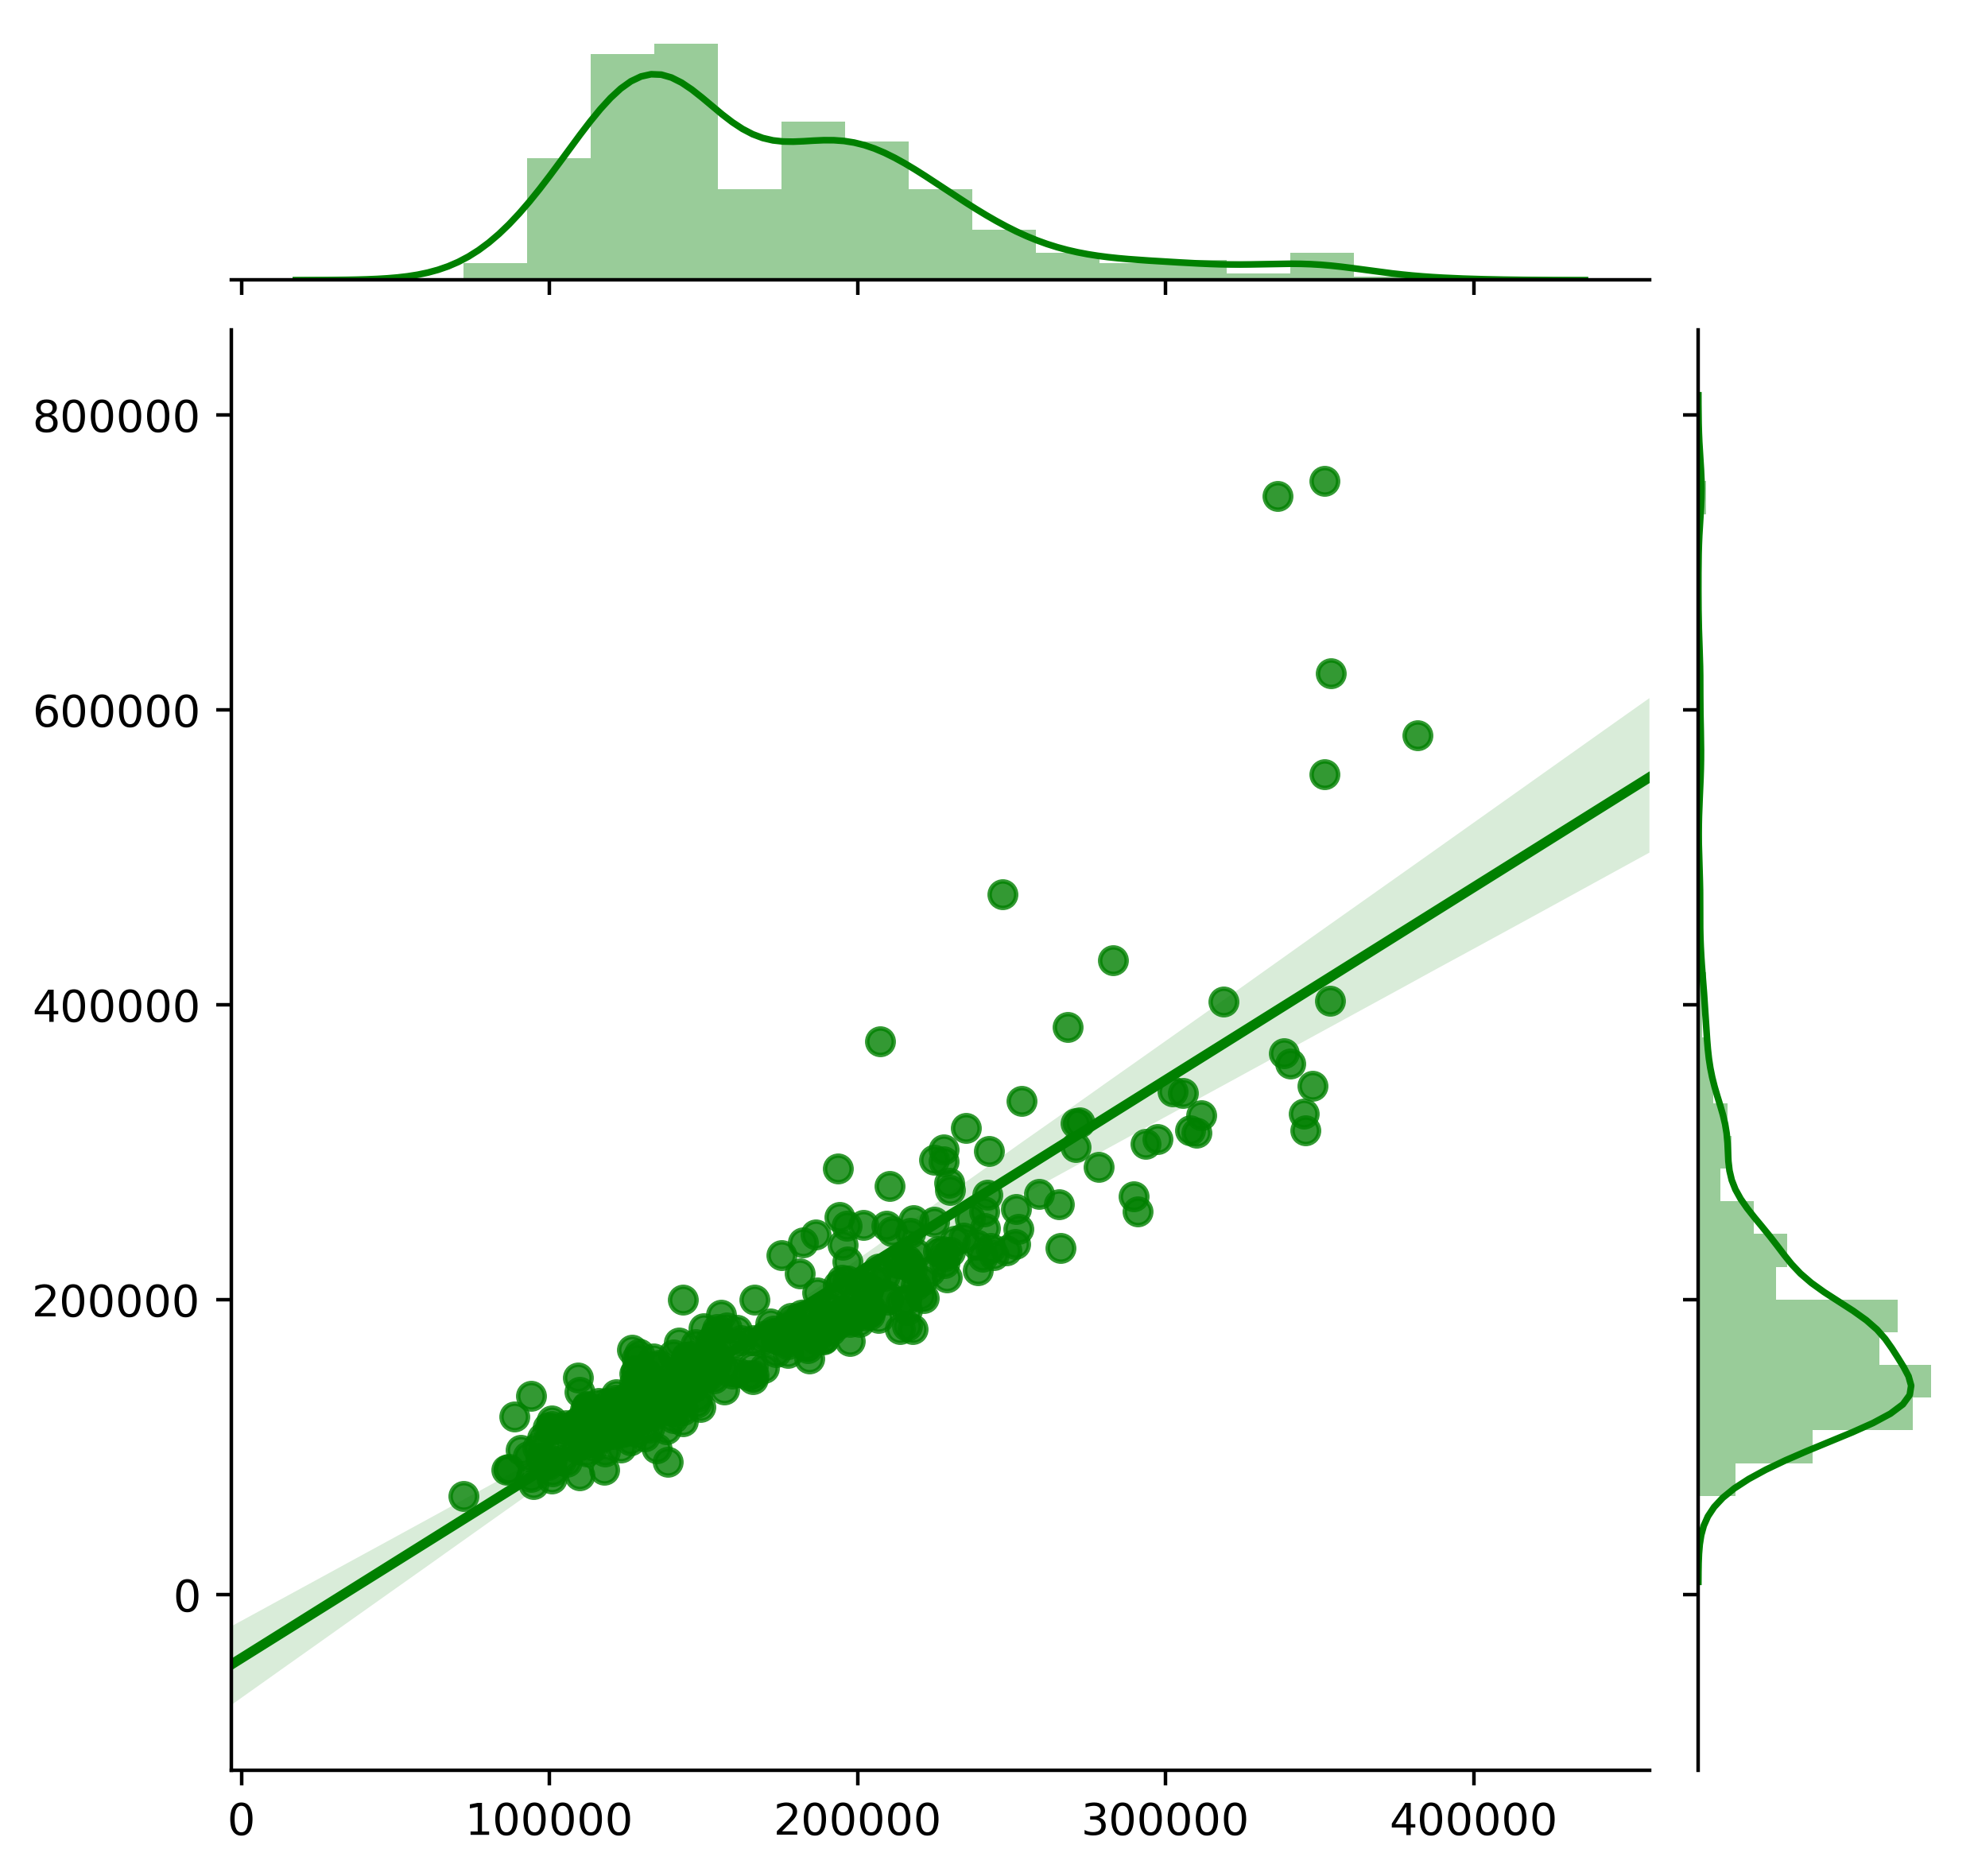

In [ ]:
# Gráfico de regressão e análise da normalidade de cada conjunto de dados
plt.figure(figsize = (12,8))
sb.jointplot(x = val_pred_rfr_gr, y = n_values_rfr_gr, kind = 'reg', 
            truncate = False,color = 'g')


In [ ]:
best_rfr_est = grid_rfr.best_estimator_.feature_importances_

In [ ]:
rfr_coef = pd.Series(best_rfr_est, index = X.columns)

In [ ]:
rfr_coef_order = rfr_coef.sort_values(ascending = False).head(30)

Text(0.5, 1.0, 'As 30 variáveis mais importantes - Feature Importance')

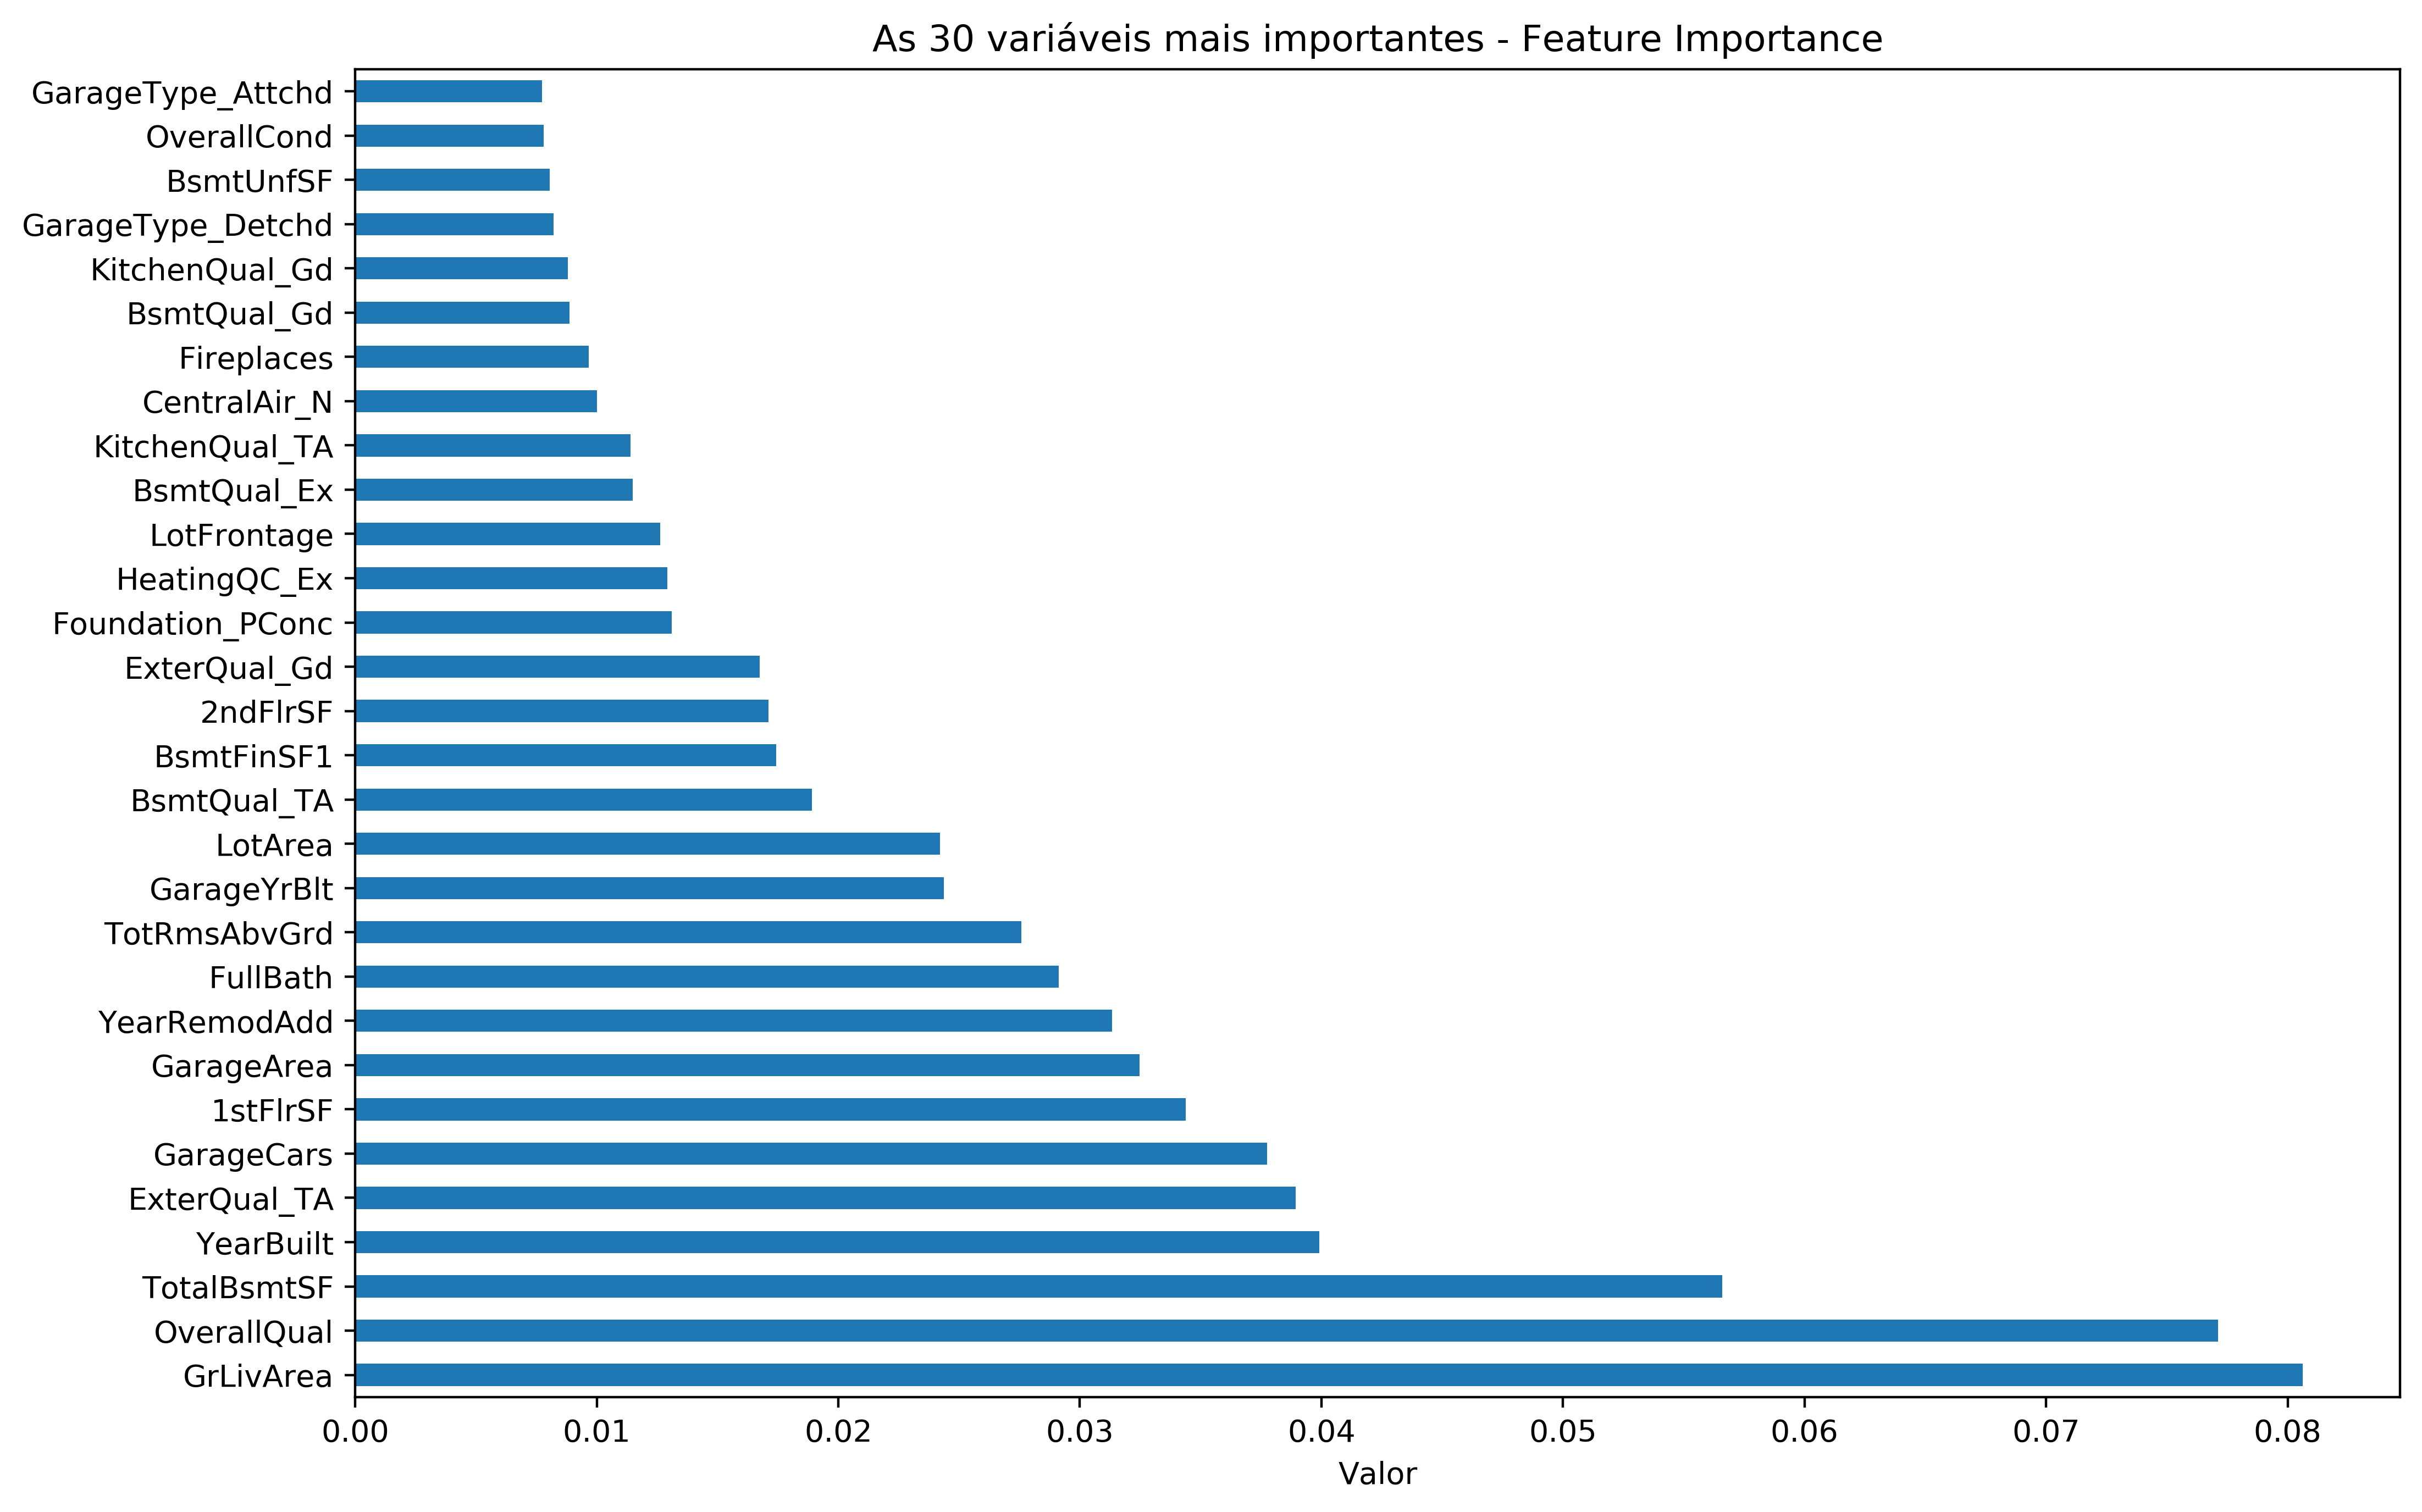

In [ ]:
plt.figure(figsize=(12,8))
rfr_coef_order.plot(kind = 'barh')
plt.xlabel('Valor')
plt.title('As 30 variáveis mais importantes - Feature Importance')

### Mesmo turbinando com GridSearchCV, este modelo não ficou tão bom quanto só usando o RandomForestRegression

### Com excessão do Linear Regression, os outros modelos são prósperos para ajustes de melhoria, principalmente com aplicação de redução de dimensionalidade e ajustes de parametros.

### Então fica a dica para você experimentar.

### Fique livre para usar o fluxo de codificação deste projetos e fazer seus próprio ajustes como fonte de estudo!